In [6]:
# os.environ['REPO_DIR']='/home/alexn/brainDev/src/'
# os.environ['ROOT_DIR']='/media/alexn/BstemAtlasDataBackup/demo_preprocess/'
# os.environ['DATA_ROOTDIR']='/media/alexn/BstemAtlasDataBackup/demo_preprocess/'
# os.environ['THUMBNAIL_DATA_ROOTDIR']='/media/alexn/BstemAtlasDataBackup/demo_preprocess/'

import os
import sys
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline

stack = 'UCSD001'

In [3]:
# Creates input_spec.ini file
def create_input_spec_ini( name, image_name_list, stack, prep_id, version, resol  ):
    f = open(name, "w")
    
    f.write('[DEFAULT]\n')
    f.write('image_name_list = '+image_name_list[0]+'\n')
    for i in range ( 1 , len(image_name_list) ):
        f.write('    '+image_name_list[i]+'\n')
    f.write('stack = '+stack+'\n')
    f.write('prep_id = '+prep_id+'\n')
    f.write('version = '+version+'\n')
    f.write('resol = '+resol+'\n')
    
def create_input_spec_ini_all( name, stack, prep_id, version, resol  ):
    f = open(name, "w")
    
    f.write('[DEFAULT]\n')
    f.write('image_name_list = all\n')
    f.write('stack = '+stack+'\n')
    f.write('prep_id = '+prep_id+'\n')
    f.write('version = '+version+'\n')
    f.write('resol = '+resol+'\n')
    
def get_fn_list_from_sorted_filenames( stack='UCSD001' ):
    '''
        get_fn_list_from_sorted_filenames( stack ) returns a list of all the valid
        filenames for the current stack.
    '''
    stack = 'UCSD001'
    fp = os.environ['DATA_ROOTDIR']+'CSHL_data_processed/'+stack+'/'
    fn = stack+'_sorted_filenames.txt'
    
    file0 = open( fp+fn, 'r')
    section_names = []

    for line in file0: 
        if 'Placeholder' in line:
            #print line
            continue
        else:
            space_index = line.index(" ")
            section_name = line[ 0 : space_index ]
            section_number = line[ space_index+1 : ]
            section_names.append( section_name )
    return section_names

In [120]:
fp_base = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed\
/UCSD001/UCSD001'
fp_suffix = '_elastix_output'
fp = fp_base + fp_suffix + '/'
files_exist = ! ls $fp

files_sorted = get_fn_list_from_sorted_filenames( stack )

for i in range(0, len(files_exist)):
    files_exist[i] = files_exist[i][0:30]
    
print len(files_exist)
print len(files_sorted)
print len( list(set(files_exist) - set(files_sorted)) ),'Files in one and not the other'

files_to_process = list(set(files_exist) - set(files_sorted))

for file_curr in files_to_process:
    file_to_remove = fp + file_curr + fp_suffix + '.tif'
    if os.path.isfile( file_to_remove ):
        #! rm $file_to_remove
        print file_to_remove
        continue
        
    folder_to_remove = fp + file_curr + fp_suffix + '/'
    print folder_to_remove
    if os.path.isdir( folder_to_remove ):
        #! rm $file_to_remove
        print folder_to_remove

472
458
15 Files in one and not the other
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide080_2018_09_05-S4_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide090_2018_09_05-S2_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide090_2018_09_05-S1_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide062_2018_09_04-S4_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide003_2018_09_03-S1_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide077_2018_09_04-S3_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD

In [1]:
fp = '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/'
fn = 'MD662_sorted_filenames.txt'
    
file0 = open( fp+fn, 'r')
section_names_MD662 = []

for line in file0: 
    if 'Placeholder' in line:
        #print line
        continue
    else:
        space_index = line.index(" ")
        section_name = line[ 0 : space_index ]
        section_number = line[ space_index+1 : ]
        section_names_MD662.append( section_name )
print section_names_MD662

['MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001', 'MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002', 'MD662&661-F1-2017.06.02-17.07.55_MD662_3_0003', 'MD662&661-F2-2017.06.02-17.21.53_MD662_1_0004', 'MD662&661-F2-2017.06.02-17.21.53_MD662_2_0005', 'MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006', 'MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007', 'MD662&661-F3-2017.06.02-17.43.06_MD662_2_0008', 'MD662&661-F3-2017.06.02-17.43.06_MD662_3_0009', 'MD662&661-F4-2017.06.02-18.04.01_MD662_1_0010', 'MD662&661-F4-2017.06.02-18.04.01_MD662_2_0011', 'MD662&661-F4-2017.06.02-18.04.01_MD662_3_0012', 'MD662&661-F5-2017.06.02-18.25.27_MD662_1_0013', 'MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014', 'MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015', 'MD662&661-F7-2017.06.02-18.46.54_MD662_1_0019', 'MD662&661-F7-2017.06.02-18.46.54_MD662_2_0020', 'MD662&661-F7-2017.06.02-18.46.54_MD662_3_0021', 'MD662&661-F8-2017.06.02-19.08.17_MD662_1_0022', 'MD662&661-F8-2017.06.02-19.08.17_MD662_2_0023', 'MD662&661-F8-2017.

This tutorial walks you through the demo suite.

# Preprocess

# Steps 1-2
### 1) Preprocess Setup
### 2) Global Intensity Normalization


First we download the JP2 raw images

In [62]:
stack = 'UCSD001'
#path = os.environ['DATA_ROOTDIR']+'CSHL_data_processed/'+stack+'/brains_info/'
path = os.path.join(os.environ['DATA_ROOTDIR'],'brains_info/')
! mkdir $path 
name = path+stack+'.ini'

f = open(name, "w")
f.write('[DEFAULT]\n')
f.write('planar_resolution_um = 0.46\n')
f.write('section_thickness_um = 20\n')
f.close()

mkdir: cannot create directory ‘/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/brains_info/’: File exists


In [14]:
# ! download_demo_data_preprocessing.py

download_to = os.environ['DATA_ROOTDIR']

! python download_demo_data_preprocessing.py --demo_data_dir $download_to

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: 'DEMO998'
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
wget -N -P "/media/alexn/BstemAt

Create `DEMO998_input_spec.json`. This specifies where to find each version/resolution of the raw image files.

In [53]:
import json
# Prepare filepaths to putinto the STACK_input_spec.json file
data_dirs = os.path.join( DATA_ROOTDIR, 'jp2_files', 'DEMO998' )
filepath_to_imageName_mapping = os.path.join( DATA_ROOTDIR, 'jp2_files', 'DEMO998', '(.*)?_lossless.jp2' )
imageName_to_filepath_mapping = os.path.join( DATA_ROOTDIR, 'jp2_files', 'DEMO998', '%s_lossless.jp2' )


json_data = ([{"version": None, \
                "resolution": "raw",\
                "data_dirs": data_dirs,\
                "filepath_to_imageName_mapping": filepath_to_imageName_mapping,\
                "imageName_to_filepath_mapping": imageName_to_filepath_mapping }])

# This will likely be changed in the near future so that it is saved in the ROOT_DIR
with open('DEMO998_input_spec.json', 'w') as outfile:
    json.dump(json_data, outfile)
    
print 'DEMO998_input_spec overwritten'


# Example supplied by Yuncong
# Cannot handle variables for some reason, I chose to do the above

# %%writefile DEMO998_input_spec.json
# [
#    {"version": null, 
# "resolution": "raw", 
#     "data_dirs": "/home/yuncong/MouseBrainAtlas/demo/demo_data/jp2_files/DEMO998/", 
#     "filepath_to_imageName_mapping": "/home/yuncong/MouseBrainAtlas/demo/demo_data/jp2_files/DEMO998/(.*)?_lossless.jp2", 
#     "imageName_to_filepath_mapping": "/home/yuncong/MouseBrainAtlas/demo/demo_data/jp2_files/DEMO998/%s_lossless.jp2"
#    }
# ]

DEMO998_input_spec overwritten


Convert all JPEG2000 files to TIF files (16-bit).

In [54]:
! python jp2_to_tiff.py DEMO998 DEMO998_input_spec.json

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: 'DEMO998'
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Found 3 images.

(None, u'raw') 

DEMO998 is a fluorescently stained stack. The texture information is mainly in the Neurotrace-blue stain which is scanned as the blue channel.

We use the `extract_channel.py` script to extract the blue channel of the images. 
- first create a `input_spec.ini` to describe the input where the prep_id/version/resolution are set to `(None,None,raw)`.
- give the resulting __version__ a name "Ntb".

### TO CONTINUE
Make sure you have `STACK_raw/` saved, MUST be named this.

In [105]:
# OG
create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, stack='UCSD001', \
           prep_id='None', version='None', resol='raw')

In [106]:
! python extract_channel.py input_spec.ini 2 Ntb

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{}
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 cropbox: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_padded_to_brainstem.ini does not exist.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 image_shape: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_padded_to_brainstem.ini does not exist.

RUNNING: 
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw/UCSD001_slide014_

Since raw images (roughly 30,000 by 30,000 pixels) are cumbersome to examine.
We also generate smaller thumbnails by scaling 32 times down. 1/32=0.03125.
- Create `input_spec.ini` as (None,Ntb,raw).
- Call the new __resolution__ "thumbnail".

In [9]:
create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, \
                stack='UCSD001', prep_id='None', version='Ntb', resol='raw')

In [10]:
! python rescale.py input_spec.ini thumbnail -f 0.03125

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini
****************************************************************
Failed to cache DEMO998 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 filenames_to_sections: 
No anchor.txt is found. Seems we a

Rescale: 2.45 seconds.
UCSD001_slide004_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide004_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide004_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 2.52 seconds.
UCSD001_slide004_2018_09_03-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide004_2018_09_03-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide004_2018_09_03-S4_thumbnail_Ntb.tif
uint16
Rescale: 2.82 seconds.
UCSD001_slide005_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide005_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide005_2018_09_03-S1_thumbnail_Ntb.

Rescale: 6.81 seconds.
UCSD001_slide011_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide011_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S2_thumbnail_Ntb.tif
uint16
Rescale: 7.15 seconds.
UCSD001_slide011_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide011_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 6.75 seconds.
UCSD001_slide011_2018_09_03-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide011_2018_09_03-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S4_thumbnail_Ntb.

Rescale: 9.75 seconds.
UCSD001_slide017_2018_09_03-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide017_2018_09_03-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide017_2018_09_03-S4_thumbnail_Ntb.tif
uint16
Rescale: 9.65 seconds.
UCSD001_slide018_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide018_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide018_2018_09_03-S1_thumbnail_Ntb.tif
uint16
Rescale: 7.77 seconds.
UCSD001_slide018_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide018_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide018_2018_09_03-S2_thumbnail_Ntb.

Rescale: 11.00 seconds.
UCSD001_slide024_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide024_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide024_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 10.84 seconds.
UCSD001_slide025_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide025_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide025_2018_09_03-S1_thumbnail_Ntb.tif
uint16
Rescale: 9.15 seconds.
UCSD001_slide025_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide025_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide025_2018_09_03-S2_thumbnail_Nt

Rescale: 11.41 seconds.
UCSD001_slide031_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide031_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide031_2018_09_03-S1_thumbnail_Ntb.tif
uint16
Rescale: 12.09 seconds.
UCSD001_slide031_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide031_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide031_2018_09_03-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.08 seconds.
UCSD001_slide031_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide031_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide031_2018_09_03-S3_thumbnail_N

Rescale: 12.14 seconds.
UCSD001_slide037_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide037_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide037_2018_09_03-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.91 seconds.
UCSD001_slide037_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide037_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide037_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 12.22 seconds.
UCSD001_slide038_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide038_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S1_thumbnail_N

Rescale: 11.07 seconds.
UCSD001_slide044_2018_09_04-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide044_2018_09_04-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.51 seconds.
UCSD001_slide044_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide044_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 13.92 seconds.
UCSD001_slide044_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide044_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S4_thumbnail_N

Rescale: 11.99 seconds.
UCSD001_slide050_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide050_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide050_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 14.87 seconds.
UCSD001_slide050_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide050_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide050_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 14.55 seconds.
UCSD001_slide051_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide051_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide051_2018_09_04-S1_thumbnail_N

Rescale: 17.70 seconds.
UCSD001_slide056_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide056_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide056_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 16.79 seconds.
UCSD001_slide057_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide057_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide057_2018_09_04-S1_thumbnail_Ntb.tif
uint16
Rescale: 16.92 seconds.
UCSD001_slide057_2018_09_04-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide057_2018_09_04-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide057_2018_09_04-S2_thumbnail_N

Rescale: 15.35 seconds.
UCSD001_slide063_2018_09_04-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide063_2018_09_04-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide063_2018_09_04-S2_thumbnail_Ntb.tif
uint16
Rescale: 19.40 seconds.
UCSD001_slide063_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide063_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide063_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 19.16 seconds.
UCSD001_slide063_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide063_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide063_2018_09_04-S4_thumbnail_N

Rescale: 17.56 seconds.
UCSD001_slide069_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide069_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide069_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 17.72 seconds.
UCSD001_slide069_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide069_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide069_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 16.77 seconds.
UCSD001_slide070_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide070_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S1_thumbnail_N

Rescale: 16.78 seconds.
UCSD001_slide075_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide075_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 16.92 seconds.
UCSD001_slide075_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide075_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 16.66 seconds.
UCSD001_slide076_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide076_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide076_2018_09_04-S1_thumbnail_N

Rescale: 14.77 seconds.
UCSD001_slide081_2018_09_05-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide081_2018_09_05-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide081_2018_09_05-S4_thumbnail_Ntb.tif
uint16
Rescale: 15.10 seconds.
UCSD001_slide082_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide082_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide082_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 14.02 seconds.
UCSD001_slide082_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide082_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide082_2018_09_05-S2_thumbnail_N

Rescale: 13.27 seconds.
UCSD001_slide088_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide088_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide088_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 13.87 seconds.
UCSD001_slide088_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide088_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide088_2018_09_05-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.72 seconds.
UCSD001_slide088_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide088_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide088_2018_09_05-S3_thumbnail_N

Rescale: 12.10 seconds.
UCSD001_slide094_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide094_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide094_2018_09_05-S3_thumbnail_Ntb.tif
uint16
Rescale: 11.60 seconds.
UCSD001_slide094_2018_09_05-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide094_2018_09_05-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide094_2018_09_05-S4_thumbnail_Ntb.tif
uint16
Rescale: 12.91 seconds.
UCSD001_slide095_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide095_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide095_2018_09_05-S1_thumbnail_N

Rescale: 10.36 seconds.
UCSD001_slide101_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide101_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide101_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 10.85 seconds.
UCSD001_slide101_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide101_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide101_2018_09_05-S2_thumbnail_Ntb.tif
uint16
Rescale: 11.66 seconds.
UCSD001_slide101_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide101_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide101_2018_09_05-S3_thumbnail_N

Rescale: 10.23 seconds.
UCSD001_slide108_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide108_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide108_2018_09_05-S3_thumbnail_Ntb.tif
uint16
Rescale: 8.90 seconds.
UCSD001_slide109_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide109_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 8.40 seconds.
UCSD001_slide109_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide109_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S2_thumbnail_Ntb

Rescale: 5.23 seconds.
UCSD001_slide115_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide115_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide115_2018_09_05-S3_thumbnail_Ntb.tif
uint16
Rescale: 4.93 seconds.
UCSD001_slide116_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide116_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide116_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 5.15 seconds.
UCSD001_slide116_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide116_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide116_2018_09_05-S2_thumbnail_Ntb.

Rescale: 3.04 seconds.
UCSD001_slide122_2018_09_05-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide122_2018_09_05-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide122_2018_09_05-S4_thumbnail_Ntb.tif
uint16
Rescale: 2.68 seconds.
UCSD001_slide123_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide123_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide123_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 2.46 seconds.
UCSD001_slide123_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide123_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide123_2018_09_05-S2_thumbnail_Ntb.

Let's see an example thumbnail image.

img fp: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide028_2018_09_03-S1_thumbnail_Ntb.tif

img data type: uint16


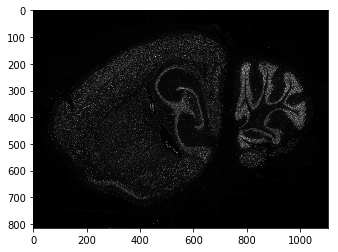

In [11]:
# Visualizing an example Ntb thumbnail image
img_fp = DataManager.get_image_filepath_v2(stack='UCSD001', resol='thumbnail', \
                            prep_id=None, version='Ntb', fn=image_name_list[100])
print 'img fp: '+img_fp+'\n'

img = imread(img_fp)
print 'img data type:',img.dtype

plt.imshow(img, cmap=plt.cm.gray);

The image is very dim because most pixel intensities are concentrated at the bottom part of the 0-2^15 range.
To enhance the contrast, we stretch the histogram so that the entire available intensity range is utilized.
- Create input_spec.ini as (None,Ntb,thumbnail). 
- call the resulting version "NtbNormalized". Note that this is just a global linear histogram stretching - not to be confused with the local adaptive intensity correction that we will do later.

In [12]:
# OG
create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, \
        stack='UCSD001', prep_id='None', version='Ntb', resol='thumbnail')

In [13]:
! python normalize_intensity.py input_spec.ini NtbNormalized

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini
****************************************************************
Failed to cache DEMO998 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 filenames_to_sections: 
No anchor.txt is found. Seems we a

return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide004_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide004_2018_09_03-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide005_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide005_2018_09_03-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.03 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide005_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide010_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide010_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide010_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide010_2018_09_03-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide016_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide016_2018_09_03-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide016_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide016_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide016_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide021_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide021_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide021_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide021_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide021_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide027_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide027_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide027_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide027_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide027_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide032_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide032_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide032_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide032_2018_09_03-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide033_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide038_2018_09_03-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide038_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide043_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide043_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide044_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.14 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide049_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide049_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide049_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide049_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide049_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide054_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide054_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide054_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide054_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide054_2018_09_04-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide059_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide059_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide060_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide060_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide060_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide065_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide065_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide065_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide065_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide065_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.19 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide070_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide070_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.21 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.64 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide075_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.21 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide075_2018_09_04-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide076_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide080_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide080_2018_09_05-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide081_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide081_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide081_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide086_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide086_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide086_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide086_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide086_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide091_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide091_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide091_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide091_2018_09_05-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide091_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide097_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide097_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide097_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide097_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide097_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide103_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide103_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide103_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide103_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide103_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide109_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide109_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide114_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide114_2018_09_05-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide115_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide115_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide115_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide120_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide120_2018_09_05-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide120_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide120_2018_09_05-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide121_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -de

Let's see a resulting image

uint8


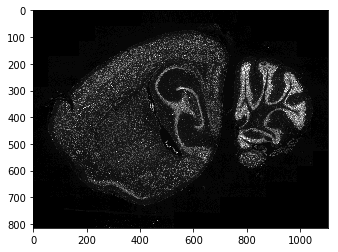

In [14]:
# Visualizing an example NORMALIZED Ntb thumbnail image

img_fp = DataManager.get_image_filepath_v2(stack='UCSD001', resol='thumbnail', \
                        prep_id=None, version='NtbNormalized', fn=image_name_list[100])

img = imread(img_fp)
print img.dtype

plt.imshow(img, cmap=plt.cm.gray);

Now the tissues are much easier to see. Note that the normalized images are now 8-bit.

In [ ]:
# Looking at slices by eye:

file_suffix = '_thumbnail_NtbNormalized.tif'

slices_blurry = ['UCSD001_slide003_2018_09_03-S1','UCSD001_slide071_2018_09_04-S2',
                'UCSD001_slide072_2018_09_04-S1','UCSD001_slide077_2018_09_04-S3',
                'UCSD001_slide080_2018_09_05-S4','UCSD001_slide081_2018_09_05-S1',
                'UCSD001_slide082_2018_09_05-S4','UCSD001_slide090_2018_09_05-S1',
                'UCSD001_slide090_2018_09_05-S2','UCSD001_slide103_2018_09_05-S4',
                'UCSD001_slide111_2018_09_05-S1','UCSD001_slide113_2018_09_05-S1']

slices_background_artifacts = ['UCSD001_slide004_2018_09_03-S1',\
                'UCSD001_slide050_2018_09_04-S2','UCSD001_slide125_2018_09_05-S1']

slices_awful = ['UCSD001_slide062_2018_09_04-S4','UCSD001_slide093_2018_09_05-S3']

slices_missing_chunk = []

# Step 3
### 3) Intra-Stack Alignment
Skipping a GUI step the should be at the very beginning of step 3: (It doesn't exist though...)

`python preprocess_gui.py`

In [ ]:
# Example from :/home/yuncong/MouseBrainAtlas/demo/demo_data/operation_configs/from_none_to_aligned.ini
# %%writefile from_none_to_aligned.ini
# [DEFAULT]
# type=warp

# base_prep_id=None
# dest_prep_id=aligned

# # For align
# elastix_parameter_fp=/home/yuncong/MouseBrainAtlas/src/preprocess/parameters/Parameters_Rigid_MutualInfo_noNumberOfSpatialSamples_4000Iters.txt
# elastix_output_dir=demo_data/CSHL_data_processed/DEMO998/DEMO998_elastix_output
# custom_output_dir=demo_data/CSHL_data_processed/DEMO998/DEMO998_custom_output

# # For compose
# anchor_image_name=MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
# transforms_csv=demo_data/CSHL_data_processed/DEMO998/DEMO998_transforms_to_anchor.csv
# #transforms_csv=demo_data/CSHL_data_processed/DEMO998/DEMO998_transformsTo_MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250.csv
# resolution=thumbnail

In [127]:
os.environ['DATA_ROOTDIR']
stack = 'UCSD001'

In [159]:
DATA_ROOTDIR = os.environ['DATA_ROOTDIR'] # THUMBNAIL_DATA_DIR
stack='UCSD001'

# Creating 'from_none_to_aligned.ini'
# First designate an anchor to use
anchor_fn = 'UCSD001_slide061_2018_09_04-S2'
none_to_aligned_fp = os.path.join(DATA_ROOTDIR, 'CSHL_data_processed', \
                stack, 'operation_configs', 'from_none_to_aligned.ini')
anchor_text_fp = os.path.join(DATA_ROOTDIR, 'CSHL_data_processed', \
                stack, stack+'_anchor.txt')

from_none_to_aligned_content = '[DEFAULT]\n\
type=warp\n\
\n\
base_prep_id=None\n\
dest_prep_id=aligned\n\
\n\
# For align\n\
elastix_parameter_fp='+REPO_DIR+'/preprocess/parameters/Parameters_Rigid_MutualInfo_\
noNumberOfSpatialSamples_4000Iters.txt\n\
elastix_output_dir='+DATA_ROOTDIR+'CSHL_data_processed\
/'+stack+'/'+stack+'_elastix_output\n\
custom_output_dir='+DATA_ROOTDIR+'CSHL_data_processed\
/'+stack+'/'+stack+'_custom_output\n\
\n\
# For compose\n\
anchor_image_name='+anchor_fn+'\n\
transforms_csv='+DATA_ROOTDIR+'CSHL_data_processed/'+stack+'\
/'+stack+'_transforms_to_anchor.csv\n\
#transforms_csv='+DATA_ROOTDIR+'CSHL_data_processed/'+stack+'\
/'+stack+'_transformsTo_'+anchor_fn+'.csv\n\
resolution=thumbnail'

if not os.path.exists(os.path.dirname(none_to_aligned_fp)):
    os.makedirs(os.path.dirname(none_to_aligned_fp))

f = open( none_to_aligned_fp , "w")
f.write( from_none_to_aligned_content ) 
f.close()

f = open( anchor_text_fp , "w")
f.write( anchor_fn ) 
f.close()

#create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, \
#        stack='UCSD001', prep_id='None', version='NtbNormalized', resol='thumbnail')

# OG
create_input_spec_ini_all( name='input_spec.ini', \
        stack='UCSD001', prep_id='None', version='NtbNormalized', resol='thumbnail')

In [136]:
! python align_compose.py input_spec.ini --op from_none_to_aligned

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
python align_v3.py input_spec.ini --op from_none_to_aligned
ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No vtk
No mcubes
Failed to cache UCSD001 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_sectionLimits.ini does not exist.
Seems you are using operation INIs to provide cropbox.
Failed to cache UCSD001 valid_sections/filenames: UCSD001
Seems you are using operation INIs to provide cropbox.
{'image_name_list': 'all', 'resol': 'thumbnail', 'version': 'NtbNormalized', 'prep_id': 'None', 'stack': 'UCSD001'}
rm -f /media/alexn/BstemAtlasDataBackup/ucsd_brain/mousebrainatlas_tmp/stderr_*; rm -f /media/alexn/BstemAtlasDat

Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide027_2018_09_03-S2_to_UCSD001_slide028_2018_09_03-S1/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide028_2018_09_03-S2_to_UCSD001_slide027_2018_09_03-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide027_2018_09_03-S3_to_UCSD001_slide028_2018_09_03-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide028_2018_09_03-S3_to_UCSD001_slide027_2018_09_03-S3/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elasti

Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide065_2018_09_04-S1_to_UCSD001_slide064_2018_09_04-S4/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide066_2018_09_04-S1_to_UCSD001_slide065_2018_09_04-S1/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide065_2018_09_04-S2_to_UCSD001_slide066_2018_09_04-S1/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide066_2018_09_04-S2_to_UCSD001_slide065_2018_09_04-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elasti

Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide104_2018_09_05-S2_to_UCSD001_slide103_2018_09_05-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide103_2018_09_05-S3_to_UCSD001_slide104_2018_09_05-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide104_2018_09_05-S3_to_UCSD001_slide103_2018_09_05-S3/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide104_2018_09_05-S4_to_UCSD001_slide104_2018_09_05-S3/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elasti

2 UCSD001_slide001_2018_09_03-S2 [[ 9.88572958e-01 -1.50743180e-01 -5.48980497e+02]
 [ 1.50743180e-01  9.88572958e-01 -3.71905861e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
3 UCSD001_slide002_2018_09_03-S2 [[ 9.96961334e-01 -7.78980020e-02 -5.63171273e+02]
 [ 7.78980020e-02  9.96961334e-01 -3.28622694e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
4 UCSD001_slide001_2018_09_03-S3 [[ 9.81660983e-01 -1.90635031e-01 -5.22351984e+02]
 [ 1.90635031e-01  9.81660983e-01 -4.63348904e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
5 UCSD001_slide002_2018_09_03-S3 [[ 9.88674485e-01 -1.50075859e-01 -5.19602469e+02]
 [ 1.50075859e-01  9.88674485e-01 -4.04327737e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
6 UCSD001_slide004_2018_09_03-S1 [[ 9.88676286e-01 -1.50063995e-01 -4.75126754e+02]
 [ 1.50063995e-01  9.88676286e-01 -3.90809229e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
7 UCSD001_slide003_2018_09_03-S2 [[ 9.81119296e-01 -1.93403534e-0

57 UCSD001_slide016_2018_09_03-S4 [[ 9.98391512e-01 -5.66955824e-02 -4.11779264e+02]
 [ 5.66955824e-02  9.98391512e-01 -1.49334779e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
58 UCSD001_slide017_2018_09_03-S1 [[ 9.74584629e-01 -2.24019646e-01 -2.67494298e+02]
 [ 2.24019646e-01  9.74584629e-01 -2.89447639e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
59 UCSD001_slide018_2018_09_03-S1 [[ 9.93768707e-01 -1.11461904e-01 -3.66324288e+02]
 [ 1.11461904e-01  9.93768707e-01 -1.99529730e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
60 UCSD001_slide017_2018_09_03-S2 [[ 9.89763961e-01 -1.42714055e-01 -3.00421252e+02]
 [ 1.42714055e-01  9.89763961e-01 -2.32054298e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
61 UCSD001_slide018_2018_09_03-S2 [[ 9.94417688e-01 -1.05515221e-01 -3.20158899e+02]
 [ 1.05515221e-01  9.94417688e-01 -1.59740049e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
62 UCSD001_slide017_2018_09_03-S3 [[ 9.97362803e-01 -7.25771

103 UCSD001_slide029_2018_09_03-S1 [[ 9.96436892e-01 -8.43416842e-02 -2.28545666e+02]
 [ 8.43416842e-02  9.96436892e-01 -1.09904343e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
104 UCSD001_slide030_2018_09_03-S1 [[ 9.91334961e-01 -1.31358272e-01 -1.77056536e+02]
 [ 1.31358272e-01  9.91334961e-01 -1.55681799e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
105 UCSD001_slide029_2018_09_03-S2 [[ 9.93620148e-01 -1.12778549e-01 -2.22748092e+02]
 [ 1.12778549e-01  9.93620148e-01 -1.47990784e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
106 UCSD001_slide030_2018_09_03-S2 [[ 9.92469673e-01 -1.22490606e-01 -1.89140716e+02]
 [ 1.22490606e-01  9.92469673e-01 -1.54818869e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
107 UCSD001_slide029_2018_09_03-S3 [[ 9.99359392e-01 -3.57883559e-02 -2.81230839e+02]
 [ 3.57883559e-02  9.99359392e-01 -6.13393875e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
108 UCSD001_slide030_2018_09_03-S3 [[ 9.94913812e-01 -1

177 UCSD001_slide048_2018_09_04-S4 [[ 9.80505994e-01  1.96489173e-01 -2.54129033e+02]
 [-1.96489173e-01  9.80505994e-01  2.07685849e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
178 UCSD001_slide049_2018_09_04-S1 [[ 9.99982042e-01 -5.99296413e-03 -2.08340614e+02]
 [ 5.99296413e-03  9.99982042e-01 -3.37737933e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
179 UCSD001_slide050_2018_09_04-S1 [[ 9.98496664e-01 -5.48125163e-02 -1.51288553e+02]
 [ 5.48125163e-02  9.98496664e-01 -4.32925071e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
180 UCSD001_slide049_2018_09_04-S2 [[ 9.99997421e-01 -2.27099805e-03 -2.15428592e+02]
 [ 2.27099805e-03  9.99997421e-01  1.58911629e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
181 UCSD001_slide050_2018_09_04-S2 [[ 9.97058081e-01 -7.66497456e-02 -1.62632455e+02]
 [ 7.66497456e-02  9.97058081e-01 -1.17074377e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
182 UCSD001_slide049_2018_09_04-S3 [[ 9.99998067e-01  1

270 UCSD001_slide073_2018_09_04-S1 [[ 9.99190883e-01 -4.02191492e-02 -1.02490415e+02]
 [ 4.02191492e-02  9.99190883e-01 -8.32545737e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
271 UCSD001_slide074_2018_09_04-S1 [[ 9.92337669e-01 -1.23555455e-01 -5.96280671e+01]
 [ 1.23555455e-01  9.92337669e-01 -1.29746368e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
272 UCSD001_slide073_2018_09_04-S2 [[ 9.98162625e-01 -6.05918627e-02 -8.09764680e+01]
 [ 6.05918627e-02  9.98162625e-01 -8.53243324e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
273 UCSD001_slide074_2018_09_04-S2 [[ 9.95641017e-01 -9.32682450e-02 -2.15589754e+01]
 [ 9.32682450e-02  9.95641017e-01 -1.46176217e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
274 UCSD001_slide073_2018_09_04-S3 [[ 9.99000496e-01  4.46991017e-02 -1.70548010e+02]
 [-4.46991017e-02  9.99000496e-01  3.19508253e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
275 UCSD001_slide074_2018_09_04-S3 [[ 9.99749018e-01 -2

396 UCSD001_slide107_2018_09_05-S1 [[ 9.92952879e-01 -1.18509829e-01 -3.20296892e+02]
 [ 1.18509829e-01  9.92952879e-01 -2.43102524e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
397 UCSD001_slide108_2018_09_05-S2 [[ 9.98071173e-01 -6.20800553e-02 -3.44319839e+02]
 [ 6.20800553e-02  9.98071173e-01 -1.77024136e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
398 UCSD001_slide107_2018_09_05-S2 [[ 9.93536647e-01 -1.13511810e-01 -3.18819422e+02]
 [ 1.13511810e-01  9.93536647e-01 -2.68656310e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
399 UCSD001_slide108_2018_09_05-S3 [[ 9.94813296e-01 -1.01717774e-01 -3.11299341e+02]
 [ 1.01717774e-01  9.94813296e-01 -1.71055746e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
400 UCSD001_slide109_2018_09_05-S1 [[ 9.92033114e-01 -1.25977381e-01 -2.72812764e+02]
 [ 1.25977381e-01  9.92033114e-01 -2.23454306e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
401 UCSD001_slide109_2018_09_05-S2 [[ 9.92040041e-01 -1

return code: 0


In [160]:
! python warp_crop.py --input_spec input_spec.ini --op_id from_none_to_padded

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD585 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_sorted_filenames.txt
Failed to cache MD585 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_sorted_filenames.txt
Failed to cache MD585 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD585 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

In [155]:
# python src/gui/preprocess_tool_v3.py UCSD001 --tb_version NtbNormalized
! python ../src/gui/preprocess_tool_v3.py UCSD001 --tb_version NtbNormalized

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD585 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_sorted_filenames.txt
Failed to cache MD585 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_sorted_filenames.txt
Failed to cache MD585 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD585 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

prep1_thumbnail_NtbNormalized.tf files have been generated for all of the files.


# STEP 4
### 4) Create Masks

"Create Masks" step requires running the following GUI twice:

`python src/gui/mask_editing_tool_v4.py DEMO998 NtbNormalized`

Now we move on to the mask generation step. It starts with running the mask_editing_tool_v4.py GUI for drawing the initial snake contours.

In [ ]:
! python ../src/gui/mask_editing_tool_v4.py UCSD001 NtbNormalized

In [260]:
# TESTING
# If anything prints out, then there is a problem with sorted_filenames.txt
f = open('/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/\
UCSD001_prep1_thumbnail_initSnakeContours.pkl', "r")
    
file_contents = f.read().replace('\n','')
all_fns = get_fn_list_from_sorted_filenames( 'UCSD001' )

for fn in all_fns:
    if fn in file_contents:
        continue
    else:
        print fn

UCSD001_slide067_2018_09_04-S3


In [14]:
# %%writefile input_spec.ini
# [DEFAULT]
# image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
#     MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
#     MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
# stack = DEMO998
# prep_id = alignedPadded
# version = NtbNormalized
# resol = thumbnail

# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='alignedPadded', version='NtbNormalized', resol='thumbnail')

In [4]:
files_all = get_fn_list_from_sorted_filenames('UCSD001')
files_exist = ! ls /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_autoSubmasks

files_to_process = list(set(files_all) - set(files_exist))
print len(files_to_process)

files_to_process = ['UCSD001_slide067_2018_09_04-S3','UCSD001_slide033_2018_09_03-S3']

create_input_spec_ini( name='input_spec.ini', image_name_list=files_to_process, stack='UCSD001', \
            prep_id='alignedPadded', version='NtbNormalized', resol='thumbnail')

10


In [ ]:
# HERE HERE HERE
# TRYING TO RUN THE NEXT CELL. MAKE SURE `UCSD001/prep1_thumbnail_autoSubmasks/` HAS 458 ELEMENTS!
 # masking.py LINE 88 IF NOT

In [ ]:
fp = os.path.join(os.environ['DATA_ROOTDIR'],'CSHL_data_processed',stack,\
                  stack+'_prep1_thumbnail_initSnakeContours.pkl')

! python masking.py input_spec.ini $fp

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD662/MD662_sorted_filenames.txt
Failed to cache MD662 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD662 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

Morphsnake iter 12 Component sizes: [698707]
Morphsnake iter 8 Component sizes: [976558]
Morphsnake iter 7 Component sizes: [1201519]
Morphsnake iter 13 Component sizes: [673600]
Morphsnake iter 10 Component sizes: [811963]
Morphsnake iter 8 Component sizes: [1115985]
Morphsnake iter 13 Component sizes: [696656]
Morphsnake iter 8 Component sizes: [1193488]
Morphsnake iter 8 Component sizes: [1137316]
Component area is too small - nullified.
Morphsnake iter 14 Component sizes: [670708, 1]
Component area is too small - nullified.
Morphsnake iter 9 Component sizes: [973122, 4]
Morphsnake iter 8 Component sizes: [1197437]
Morphsnake iter 11 Component sizes: [808945]
Morphsnake iter 14 Component sizes: [694510]
Component area is too small - nullified.
Morphsnake iter 9 Component sizes: [1112431, 1]
Morphsnake iter 15 Component sizes: [667847]
Morphsnake iter 9 Component sizes: [1133753]
Morphsnake iter 9 Component sizes: [1189496]
Morphsnake iter 15 Component sizes: [692473]
Morphsnake iter

Morphsnake iter 33 Component sizes: [655361]
Morphsnake iter 22 Component sizes: [928292]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 21 Component sizes: [1069806, 3, 1]
Morphsnake iter 20 Component sizes: [1149268]
Morphsnake iter 21 Component sizes: [1090945]
Morphsnake iter 35 Component sizes: [613580]
Morphsnake iter 34 Component sizes: [653260]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 27 Component sizes: [761918, 2, 1]
Component area is too small - nullified.
Morphsnake iter 21 Component sizes: [1141299, 1]
Component area is too small - nullified.
Morphsnake iter 23 Component sizes: [924961, 1]
Morphsnake iter 36 Component sizes: [611025]
Component area is too small - nullified.
Morphsnake iter 22 Component sizes: [1066197, 5]
Morphsnake iter 35 Component sizes: [651332]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 28 C

Component area is too small - nullified.
Morphsnake iter 33 Component sizes: [1049414, 28]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 42 Component sizes: [720627, 1, 2]
Morphsnake iter 52 Component sizes: [618183]
Morphsnake iter 35 Component sizes: [885147]
Morphsnake iter 55 Component sizes: [567284]
Morphsnake iter 32 Component sizes: [1102430]
Component area is too small - nullified.
Morphsnake iter 34 Component sizes: [1023806, 21]
Morphsnake iter 53 Component sizes: [616447]
Morphsnake iter 33 Component sizes: [1093681]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 43 Component sizes: [718108, 1, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 34 Component sizes: [1046023, 5, 3]
Morphsnake iter 56 Component sizes: [565155]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is t

Morphsnake iter 45 Component sizes: [852031]
Component area is too small - nullified.
Morphsnake iter 43 Component sizes: [993189, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 42 Component sizes: [1058275, 63, 3]
Morphsnake iter 43 Component sizes: [1016771]
Morphsnake iter 67 Component sizes: [592451]
Component area is too small - nullified.
Morphsnake iter 71 Component sizes: [537651, 4]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 55 Component sizes: [688191, 3, 3, 1]
Morphsnake iter 42 Component sizes: [1064177]
Morphsnake iter 68 Component sizes: [590904]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 72 Component sizes: [535797, 1, 1]
Morphsnake iter 46 Component sizes: [848732]
Morphsnake iter 44 Component sizes: [989834]
Component area is too small - nullified.
Component area is t

Morphsnake iter 88 Component sizes: [509825]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 68 Component sizes: [658815, 79, 1, 1, 2]
Component area is too small - nullified.
Morphsnake iter 54 Component sizes: [959263, 23]
Morphsnake iter 84 Component sizes: [571307]
Component area is too small - nullified.
Morphsnake iter 89 Component sizes: [508466, 1]
Component area is too small - nullified.
Morphsnake iter 52 Component sizes: [1026715]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 54 Component sizes: [981284, 1, 1, 12]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 57 Component sizes: [813244, 2, 30]
Morphsnake iter 53 Component sizes: [1017036]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too s

Morphsnake iter 61 Component sizes: [958690]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 101 Component sizes: [487761, 115, 1, 1]
Morphsnake iter 60 Component sizes: [991958]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 96 Component sizes: [560320]
Morphsnake iter 78 Component sizes: [637118, 1, 3, 5]
Morphsnake iter 59 Component sizes: [1001409]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 65 Component sizes: [788431, 1, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 62 Component sizes: [934776, 1, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 102 Component sizes: [486010, 2, 1]
Component area is too small - nullified.
Morphsnake iter 62 Co

Morphsnake iter 66 Component sizes: [977925]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 69 Component sizes: [913673, 3, 6, 13]
Morphsnake iter 69 Component sizes: [933216]
Morphsnake iter 108 Component sizes: [550763]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 73 Component sizes: [765461, 7, 2, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 114 Component sizes: [467985, 1, 4, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 88 Component sizes: [617183, 2, 1, 9]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 68 Component sizes: [964639, 5, 67]
Morphsnake iter 109 

Morphsnake iter 120 Component sizes: [541871]
Morphsnake iter 81 Component sizes: [742845]
Morphsnake iter 77 Component sizes: [908704]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 77 Component sizes: [890138, 13, 36]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 127 Component sizes: [450429, 1, 1, 2]
Morphsnake iter 74 Component sizes: [952629]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 98 Component sizes: [598416, 1, 1, 1]
Morphsnake iter 121 Component sizes: [541400]
Component area is too small - nullified.
Morphsnake iter 76 Component sizes: [938489, 2]
Component area is too small - nullified.
Morphsnake iter 82 Component sizes: [739846, 5]
Component area is too small - nullified.
Morphsnake iter 78 Component sizes: [905474, 181]
Component area

Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 107 Component sizes: [576978, 3, 4, 42, 2]
Morphsnake iter 83 Component sizes: [916366]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 139 Component sizes: [435490, 2, 3]
Component area is too small - nullified.
Morphsnake iter 81 Component sizes: [931021, 1]
Morphsnake iter 133 Component sizes: [533675]
Morphsnake iter 85 Component sizes: [886399]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 85 Component sizes: [867586, 1, 3, 68]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nulli

Morphsnake iter 147 Component sizes: [525480]
Morphsnake iter 99 Component sizes: [691054]
Component area is too small - nullified.
Morphsnake iter 154 Component sizes: [419579, 2]
Component area is too small - nullified.
Morphsnake iter 94 Component sizes: [863019, 1]
Morphsnake iter 92 Component sizes: [889435]
Component area is too small - nullified.
Morphsnake iter 119 Component sizes: [539548, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 94 Component sizes: [844045, 8, 1]
Morphsnake iter 148 Component sizes: [524656]
Morphsnake iter 90 Component sizes: [903653]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 155 Component sizes: [418898, 2, 1]
Component area is too small - nullified.
Morphsnake iter 100 Component sizes: [688398, 3]
Morphsnake iter 149 Component sizes: [524358]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is t

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 103 Component sizes: [823344, 12, 1]
Morphsnake iter 162 Component sizes: [517074]
Component area is too small - nullified.
Morphsnake iter 103 Component sizes: [840275, 20]
Component area is too small - nullified.
Morphsnake iter 169 Component sizes: [405764, 18]
Morphsnake iter 109 Component sizes: [665596]
Morphsnake iter 101 Component sizes: [865158]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 99 Component sizes: [877951, 2, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 131 Component sizes: [509046, 9, 37]
Morphsnake iter 163 Component sizes: [516820]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 170 Component sizes: [404566, 1, 1, 3, 3]
Morphsnak

Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 184 Component sizes: [392576, 6, 6, 2, 5]
Morphsnake iter 108 Component sizes: [853164]
Component area is too small - nullified.
Morphsnake iter 110 Component sizes: [842898, 2]
Morphsnake iter 177 Component sizes: [509851]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 119 Component sizes: [643052, 2, 28]
Morphsnake iter 113 Component sizes: [802384]
Component area is too small - nullified.
Morphsnake iter 185 Component sizes: [392221, 1]
Component area is too small - nullified.
Morphsnake iter 113 Component sizes: [814004, 2803, 53]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 143 Component sizes: [484117, 1, 1]
Morphsnake iter 178 Component sizes: [509108]
Morphsnake iter 109 Component sizes: [850923]
Morphsnake iter 111 Component sizes: [84068

Component area is too small - nullified.
Morphsnake iter 201 Component sizes: [381759, 1]
Morphsnake iter 123 Component sizes: [783531]
Morphsnake iter 118 Component sizes: [829992]
Morphsnake iter 123 Component sizes: [791907, 2745]
Component area is too small - nullified.
Morphsnake iter 202 Component sizes: [380980, 4]
Morphsnake iter 194 Component sizes: [504592]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 156 Component sizes: [461517, 2, 6]
Morphsnake iter 121 Component sizes: [817860]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 130 Component sizes: [620029, 6, 1]
Component area is too small - nullified.
Morphsnake iter 124 Component sizes: [781296, 84]
Component area is too small - nullified.
Morphsnake iter 203 Component sizes: [380832, 4]
Morphsnake iter 124 Component sizes: [789593, 2677]
Component area is too small - nullified.
Morphsnake iter 119 Component sizes: [8275

Morphsnake iter 169 Component sizes: [443939]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 219 Component sizes: [374099, 2, 1, 1]
Component area is too small - nullified.
Morphsnake iter 134 Component sizes: [763329, 2]
Morphsnake iter 141 Component sizes: [3062, 596539]
Morphsnake iter 134 Component sizes: [769467, 2646]
Morphsnake iter 211 Component sizes: [503085]
Component area is too small - nullified.
Morphsnake iter 220 Component sizes: [373348, 2]
Component area is too small - nullified.
Morphsnake iter 170 Component sizes: [442472, 8]
Morphsnake iter 129 Component sizes: [805336]
Morphsnake iter 132 Component sizes: [795380]
Morphsnake iter 212 Component sizes: [502728]
Morphsnake iter 135 Component sizes: [762037]
Component area is too small - nullified.
Morphsnake iter 142 Component sizes: [3040, 594703, 6]
Morphsnake iter 135 Component sizes: [767839, 2709]
Morphsnake iter 221 Comp

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 236 Component sizes: [366566, 1, 3, 1, 3]
Morphsnake iter 227 Component sizes: [502488]
Morphsnake iter 152 Component sizes: [2962, 578738]
Morphsnake iter 145 Component sizes: [743603, 2367]
Morphsnake iter 183 Component sizes: [427417]
Component area is too small - nullified.
Morphsnake iter 237 Component sizes: [366544, 1]
Morphsnake iter 142 Component sizes: [777041]
Morphsnake iter 228 Component sizes: [502182]
Morphsnake iter 145 Component sizes: [749352, 2709]
Component area is too small - nullified.
Morphsnake iter 139 Component sizes: [784946, 9]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 153 Component sizes: [2879, 1, 576811, 3]
Component area is too small - nullified.
Morphsnake iter 238 Component sizes: [365817, 1]
Morphsnake iter 184 Component sizes: [426106]
Morphsnake iter 229 Component sizes: [502485]
Component area is 

Component area is too small - nullified.
Morphsnake iter 146 Component sizes: [771451, 8]
Component area is too small - nullified.
Morphsnake iter 193 Component sizes: [416941, 28]
Morphsnake iter 153 Component sizes: [732313, 2132]
Morphsnake iter 5 Component sizes: [1141244]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 161 Component sizes: [2346, 1, 564653, 6]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 250 Component sizes: [355573, 1, 2, 1, 1, 1, 1]
Morphsnake iter 150 Component sizes: [763408]
Morphsnake iter 153 Component sizes: [737249, 2709]
Component area is too small - nullified.
Morphsnake iter 194 Component sizes: [415663, 11]
Component area is too small - nullified.
Component area is too small - nullified.
M

Component area is too small - nullified.
Morphsnake iter 162 Component sizes: [725261, 2646, 10]
Morphsnake iter 171 Component sizes: [551255]
Component area is too small - nullified.
Morphsnake iter 159 Component sizes: [749189, 1]
Component area is too small - nullified.
Morphsnake iter 156 Component sizes: [754117, 74]
Component area is too small - nullified.
Morphsnake iter 266 Component sizes: [346333, 1]
Component area is too small - nullified.
Morphsnake iter 206 Component sizes: [403791, 12]
Morphsnake iter 163 Component sizes: [719866, 2035]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 15 Component sizes: [1104950, 6, 1]
Morphsnake iter 163 Component sizes: [724445, 2709]
Component area is too small - nullified.
Morphsnake iter 267 Component sizes: [346171, 13]
Component area is too small - nullified.
Morphsnake iter 172 Component sizes: [549708, 10]
Morphsnake iter 160 Component sizes: [747410]
Morphsnake iter 207 Component

Morphsnake iter 168 Component sizes: [736214]
Morphsnake iter 171 Component sizes: [731203]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 286 Component sizes: [337582, 15, 2, 1]
Morphsnake iter 175 Component sizes: [706941]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 27 Component sizes: [1063184, 14, 1]
Morphsnake iter 222 Component sizes: [390387]
Morphsnake iter 175 Component sizes: [712491, 2709]
Component area is too small - nullified.
Morphsnake iter 185 Component sizes: [533103, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 287 Component sizes: [337441, 27, 4]
Component area is too small - nullified.
Morphsnake iter 172 Component sizes: [729531, 5]
Morphsnake iter 169 Component sizes: [735158]
Morphsnake iter 223 Component sizes: [389941]
Component area is too small - nullified.
Mo

Component area is too small - nullified.
Morphsnake iter 236 Component sizes: [380277, 5, 3]
Component area is too small - nullified.
Morphsnake iter 38 Component sizes: [1025922, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 305 Component sizes: [330560, 3, 5]
Morphsnake iter 197 Component sizes: [518232]
Morphsnake iter 183 Component sizes: [714797]
Morphsnake iter 237 Component sizes: [379901]
Component area is too small - nullified.
Morphsnake iter 187 Component sizes: [697261, 16]
Morphsnake iter 180 Component sizes: [720921]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 187 Component sizes: [701280, 14, 2550, 22]
Component area is too small - nullified.
Morphsnake iter 306 Component sizes: [327560, 2418, 5]
Component area is too small - nullified.
Morphsnake iter 39 Component sizes: [1022547, 59]
Component area is too small - nullified.
Morphsnake iter 198 Component sizes: [

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 198 Component sizes: [690328]
Morphsnake iter 323 Component sizes: [324117, 1, 3, 2163]
Morphsnake iter 209 Component sizes: [504471]
Morphsnake iter 251 Component sizes: [371207]
Morphsnake iter 194 Component sizes: [700183]
Component area is too small - nullified.
Morphsnake iter 50 Component sizes: [985746, 1]
Morphsnake iter 198 Component sizes: [692565]
Component area is too small - nullified.
Morphsnake iter 324 Component sizes: [323689, 2, 2132]
Morphsnake iter 191 Component sizes: [707802]
Morphsnake iter 252 Component sizes: [370323]
Morphsnake iter 199 Component sizes: [690361]
Morphsnake iter 210 Component sizes: [503077]
Component area is too small - nullified.
Morphsnake iter 325 Component sizes: [323873, 3, 2150]
Morphsnake iter 195 Component sizes: [699130]
Morphsnake iter 51 Component sizes: [982613]
Morphsnake iter 199 Component sizes: [692353]
Morphsnake iter 253 Componen

Component area is too small - nullified.
Morphsnake iter 63 Component sizes: [944083, 128]
Morphsnake iter 203 Component sizes: [693301]
Morphsnake iter 345 Component sizes: [322755, 2068]
Morphsnake iter 211 Component sizes: [683701]
Morphsnake iter 207 Component sizes: [684346]
Morphsnake iter 212 Component sizes: [684101]
Morphsnake iter 224 Component sizes: [484666, 2138]
Morphsnake iter 269 Component sizes: [361945]
Morphsnake iter 346 Component sizes: [322422, 2045]
Component area is too small - nullified.
Morphsnake iter 64 Component sizes: [940779, 6]
Morphsnake iter 204 Component sizes: [691771]
Component area is too small - nullified.
Morphsnake iter 212 Component sizes: [682720, 41]
Morphsnake iter 347 Component sizes: [322733, 2065]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 270 Component sizes: [361222, 1, 1]
Morphsnake iter 208 Component sizes: [682924]
Morphsnake iter 225 Component sizes: [483844, 2165]
Morphsnake it

Morphsnake iter 236 Component sizes: [471119, 2138]
Morphsnake iter 223 Component sizes: [677325]
Component area is too small - nullified.
Morphsnake iter 75 Component sizes: [906939, 1]
Morphsnake iter 4 Component sizes: [707821]
Component area is too small - nullified.
Morphsnake iter 284 Component sizes: [356004, 15]
Morphsnake iter 224 Component sizes: [679883]
Morphsnake iter 215 Component sizes: [678917]
Morphsnake iter 219 Component sizes: [670860]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 237 Component sizes: [468504, 1, 9, 3, 6, 2070, 16]
Morphsnake iter 5 Component sizes: [704902]
Morphsnake iter 224 Component sizes: [676529]
Morphsnake iter 285 Component sizes: [355990]
Component area is too small - nullified.
Morphsnake iter 76 Component sizes: [903812, 13]
Morphsnake iter 225 Component sizes: [680

Component area is too small - nullified.
Morphsnake iter 236 Component sizes: [676946, 1]
Component area is too small - nullified.
Morphsnake iter 87 Component sizes: [871419, 6]
Morphsnake iter 231 Component sizes: [658684]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 300 Component sizes: [351564, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 24 Component sizes: [4, 650159, 1, 3]
Component area is too small - nullified.
Morphsnake iter 227 Component sizes: [663742, 2]
Morphsnake iter 236 Component sizes: [671917]
Component area is too small - nullified.
Morphsnake iter 250 Component sizes: [445672, 33]
Morphsnake iter 237 Component sizes: [677377]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 25 Component sizes: [647410, 1, 4]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 88 C

Morphsnake iter 316 Component sizes: [348764]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 100 Component sizes: [835202, 232, 1, 1142]
Component area is too small - nullified.
Morphsnake iter 44 Component sizes: [598388, 6]
Morphsnake iter 249 Component sizes: [669410]
Component area is too small - nullified.
Morphsnake iter 244 Component sizes: [646173, 85]
Component area is too small - nullified.
Morphsnake iter 250 Component sizes: [674974, 2]
Morphsnake iter 45 Component sizes: [596124]
Morphsnake iter 317 Component sizes: [348951]
Morphsnake iter 264 Component sizes: [426492, 3015]
Morphsnake iter 240 Component sizes: [649339]
Component area is too small - nullified.
Morphsnake iter 101 Component sizes: [833038, 3]
Component area is too small - nullified.
Morphsnake iter 46 Component sizes: [593748, 6]
Morphsnake iter 318 Component sizes: [348486]
Morphsnake iter 250 Component sizes: [668

Morphsnake iter 261 Component sizes: [667905]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 64 Component sizes: [555984, 3, 2]
Morphsnake iter 256 Component sizes: [636960]
Morphsnake iter 277 Component sizes: [414276, 3000]
Morphsnake iter 113 Component sizes: [804280]
Morphsnake iter 333 Component sizes: [346990]
Component area is too small - nullified.
Morphsnake iter 252 Component sizes: [637763, 23]
Component area is too small - nullified.
Morphsnake iter 263 Component sizes: [674389]
Component area is too small - nullified.
Morphsnake iter 65 Component sizes: [554289, 1, 1]
Morphsnake iter 262 Component sizes: [667381]
Morphsnake iter 278 Component sizes: [413177, 2982]
Morphsnake iter 257 Component sizes: [636576]
Morphsnake iter 334 Component sizes: [346542]
Component area is too small - nullified.
Morphsnake iter 66 Component sizes: [552370, 6]
Component area is too small - nullified.
Morphsnake iter 114 Component sizes: [801

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 263 Component sizes: [628319, 1, 1]
Component area is too small - nullified.
Morphsnake iter 83 Component sizes: [525673, 1]
Component area is too small - nullified.
Morphsnake iter 125 Component sizes: [780529, 2]
Morphsnake iter 348 Component sizes: [344939]
Morphsnake iter 268 Component sizes: [628433]
Component area is too small - nullified.
Morphsnake iter 290 Component sizes: [402954, 2982, 16]
Morphsnake iter 275 Component sizes: [673457]
Morphsnake iter 274 Component sizes: [666538]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 84 Component sizes: [524020, 2, 2, 5, 3]
Component area is too small - nullified.
Morphsnake iter 264 Component sizes: [627181, 1]
Morphsnake iter 349 Component sizes: [345166]
Morphsnake iter 126 Component sizes: [778466]
Com

Morphsnake iter 286 Component sizes: [672035]
Morphsnake iter 362 Component sizes: [343343]
Morphsnake iter 136 Component sizes: [760867]
Morphsnake iter 279 Component sizes: [622528]
Component area is too small - nullified.
Morphsnake iter 101 Component sizes: [501263, 1]
Morphsnake iter 302 Component sizes: [392165, 2773]
Morphsnake iter 285 Component sizes: [666317]
Morphsnake iter 275 Component sizes: [619742]
Morphsnake iter 363 Component sizes: [343569]
Morphsnake iter 287 Component sizes: [672612]
Morphsnake iter 102 Component sizes: [499823]
Morphsnake iter 137 Component sizes: [759495]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 280 Component sizes: [621424, 230]
Component area is too small - nullified.
Morphsnake iter 303 Component sizes: [391594, 3, 2723, 1, 16]
Morphsnake iter 286 Component sizes: [665803]
Morphsnake iter 364 Component sizes: [343113]
Component area is too small -

Morphsnake iter 291 Component sizes: [616408]
Component area is too small - nullified.
Morphsnake iter 297 Component sizes: [665634, 1]
Morphsnake iter 378 Component sizes: [274258, 67198]
Morphsnake iter 315 Component sizes: [381471, 2386]
Morphsnake iter 299 Component sizes: [672169]
Morphsnake iter 287 Component sizes: [611591]
Component area is too small - nullified.
Morphsnake iter 121 Component sizes: [477895, 6]
Morphsnake iter 149 Component sizes: [740710]
Morphsnake iter 379 Component sizes: [274493, 67234]
Morphsnake iter 292 Component sizes: [615609]
Morphsnake iter 298 Component sizes: [665117]
Component area is too small - nullified.
Morphsnake iter 316 Component sizes: [380633, 2372, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 122 Component sizes: [476536, 1, 1, 2]
Morphsnake iter 300 Component sizes: [671514]
Morphsnake iter 288 Component sizes: [610559]
Component area is to

Morphsnake iter 329 Component sizes: [373156, 11, 664, 2382]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 141 Component sizes: [453606, 1, 1, 5, 2, 3, 2, 1, 12, 1]
Morphsnake iter 310 Component sizes: [664455]
Component area is too small - nullified.
Morphsnake iter 304 Component sizes: [610932, 1]
Morphsnake iter 395 Component sizes: [274425, 66665]
Morphsnake iter 162 Component sizes: [724672]
Morphsnake iter 313 Component sizes: [671795]
Component area is too small - nullified.
Morphsnake iter 300 Component sizes: [603450, 4]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Co

Component area is too small - nullified.
Morphsnake iter 171 Component sizes: [716819, 86]
Morphsnake iter 339 Component sizes: [369708, 2382]
Component area is too small - nullified.
Morphsnake iter 313 Component sizes: [608878, 3]
Morphsnake iter 322 Component sizes: [671048]
Morphsnake iter 309 Component sizes: [599119]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 407 Component sizes: [274425, 66546]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 156 Component sizes: [431889, 1, 3, 3, 4, 9, 9, 2]
Morphsnake iter 320 Component sizes: [664041]
Morphsnake iter 340 Component sizes: [369188, 2370]
Morphsnake iter 172 Component sizes: [715639]
Morphsnake iter 314 Component sizes: [608289]
Morphsnake iter 323 Component sizes: [671667]
Component area is too small - nu

Component area is too small - nullified.
Morphsnake iter 171 Component sizes: [415284, 2, 2, 1]
Morphsnake iter 350 Component sizes: [366829, 2370]
Morphsnake iter 2 Component sizes: [845344]
Morphsnake iter 330 Component sizes: [663791]
Component area is too small - nullified.
Morphsnake iter 319 Component sizes: [593066, 1921]
Component area is too small - nullified.
Morphsnake iter 182 Component sizes: [708041, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 172 Component sizes: [414055, 1, 1]
Morphsnake iter 333 Component sizes: [671548]
Morphsnake iter 351 Component sizes: [366935, 2382]
Morphsnake iter 324 Component sizes: [606395]
Morphsnake iter 3 Component sizes: [842321]
Component area is too small - nullified.
Morphsnake iter 173 Component sizes: [413302, 1]
Morphsnake iter 320 Component sizes: [592319]
Morphsnake iter 331 Component sizes: [664256]
Morphsnake iter 183 Component sizes: [707759]
Morphsnake iter 334 Component

Component area is too small - nullified.
Morphsnake iter 16 Component sizes: [804138, 1]
Morphsnake iter 344 Component sizes: [670832]
Morphsnake iter 193 Component sizes: [701024]
Morphsnake iter 330 Component sizes: [588943]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 190 Component sizes: [396476, 1, 9]
Morphsnake iter 335 Component sizes: [605484]
Morphsnake iter 342 Component sizes: [663668]
Morphsnake iter 363 Component sizes: [365451, 2382]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 17 Component sizes: [801346, 29, 1, 2]
Component area is too small - nullified.
Morphsnake iter 191 Component sizes: [395819, 65]
Morphsnake iter 345 Component sizes: [671467]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 194 Component sizes: [699257, 5, 716]
Morphsnake iter 331 Component sizes: [589079

Component area is too small - nullified.
Morphsnake iter 206 Component sizes: [691290, 22]
Morphsnake iter 32 Component sizes: [755164]
Component area is too small - nullified.
Morphsnake iter 211 Component sizes: [380387, 3]
Component area is too small - nullified.
Morphsnake iter 343 Component sizes: [585690, 25]
Morphsnake iter 358 Component sizes: [670767]
Morphsnake iter 377 Component sizes: [363893, 2382]
Morphsnake iter 355 Component sizes: [664094]
Morphsnake iter 348 Component sizes: [604424]
Morphsnake iter 33 Component sizes: [752090]
Morphsnake iter 207 Component sizes: [691265]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 212 Component sizes: [379359, 4, 1, 2, 2, 2, 2]
Morphsnake iter 359 Component sizes: [671409]
Morphsnake iter 344 Component sizes: [585042]


Morphsnake iter 371 Component sizes: [671371]
Morphsnake iter 220 Component sizes: [686040]
Morphsnake iter 361 Component sizes: [604606]
Morphsnake iter 356 Component sizes: [582811]
Component area is too small - nullified.
Morphsnake iter 233 Component sizes: [367398, 1]
Morphsnake iter 392 Component sizes: [362048, 2370]
Component area is too small - nullified.
Morphsnake iter 50 Component sizes: [700890, 1]
Morphsnake iter 369 Component sizes: [664052]
Morphsnake iter 234 Component sizes: [366639]
Morphsnake iter 372 Component sizes: [670724]
Morphsnake iter 221 Component sizes: [686173]
Morphsnake iter 362 Component sizes: [604178]
Morphsnake iter 357 Component sizes: [583126]
Morphsnake iter 51 Component sizes: [697992]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 235 Component sizes: [366590, 1, 1, 3]
Morphsnake iter 393 Component sizes: [362210, 2382]
Morphsnake iter 370 Component size

Morphsnake iter 9 Component sizes: [1112697]
Morphsnake iter 371 Component sizes: [581686]
Morphsnake iter 408 Component sizes: [279820, 80609, 2370]
Morphsnake iter 384 Component sizes: [663526]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 258 Component sizes: [358433, 1, 1]
Morphsnake iter 236 Component sizes: [682121]
Morphsnake iter 377 Component sizes: [604412]
Morphsnake iter 69 Component sizes: [648507]
Morphsnake iter 10 Component sizes: [1109035]
Morphsnake iter 409 Component sizes: [279960, 80701, 2382]
Morphsnake iter 259 Component sizes: [358523]
Morphsnake iter 372 Component sizes: [581179]
Morphsnake iter 385 Component sizes: [664012]
Morphsnake iter 237 Component sizes: [682404]
Morphsnake iter 70 Component sizes: [645881]
Morphsnake iter 378 Component sizes: [603987]
Morphsnake iter 260 Component sizes: [357880]
Component area is too small - nullified.
Morphsnake iter 11 Component sizes: [1105340, 5]
Morphsnake iter 4

Morphsnake iter 281 Component sizes: [352715]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 11 Component sizes: [1108288, 3, 2, 5]
Morphsnake iter 391 Component sizes: [604225]
Component area is too small - nullified.
Morphsnake iter 24 Component sizes: [1058263, 14]
Morphsnake iter 424 Component sizes: [279752, 80308, 2370]
Component area is too small - nullified.
Morphsnake iter 87 Component sizes: [603784, 14]
Morphsnake iter 282 Component sizes: [352101]
Morphsnake iter 251 Component sizes: [679817]
Morphsnake iter 386 Component sizes: [580731]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 12 Component sizes: [1104609, 4, 3]
Component area is too small - nullified.
Morphsnake iter 283 Component sizes: [351091, 1184]
Morphsnake iter 392 Component sizes: [603799]
Component area is too small - nullified.
Component area is too small - nullifie

Morphsnake iter 397 Component sizes: [581002]
Morphsnake iter 100 Component sizes: [572439]
Component area is too small - nullified.
Morphsnake iter 296 Component sizes: [348040, 3]
Morphsnake iter 7 Component sizes: [731890]
Morphsnake iter 263 Component sizes: [679285]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 36 Component sizes: [1017483, 1, 3, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 22 Component sizes: [1067862, 6, 6, 9, 28]
Morphsnake iter 402 Component sizes: [603591]
Morphsnake iter 297 Component sizes: [348231]
Morphsnake iter 398 Component sizes: [580511]
Component area is too small - nullified.
Morphsnake iter 101 Component sizes: [570206, 3]
Morphsnake iter 8 Component sizes: [728859]
Morphsnake iter 264 Component sizes: [678780]
Morphsnak

Morphsnake iter 112 Component sizes: [545559]
Morphsnake iter 411 Component sizes: [603915]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 31 Component sizes: [1035487, 1]
Component area is too small - nullified.
Morphsnake iter 46 Component sizes: [985648, 3, 2, 23, 1]
Morphsnake iter 20 Component sizes: [692830]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 312 Component sizes: [318339, 2, 2, 4, 9]
Morphsnake iter 408 Component sizes: [580350]
Morphsnake iter 274 Component sizes: [678436]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 113 Component sizes: [542574, 1, 936]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is t

Morphsnake iter 420 Component sizes: [603376]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 56 Component sizes: [957564, 7, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 40 Component sizes: [1003392, 4, 71]
Morphsnake iter 32 Component sizes: [657496]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 124 Component sizes: [520138, 1, 27]
Morphsnake iter 418 Component sizes: [580243]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 327 Component sizes: [288786, 5, 6, 4]
Morphsnake iter 284 Component sizes: [678101]
Morphsnake iter 421 Component sizes: [603808]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 57 Component sizes: [954714, 1, 12]
Morphsnake iter 33 Component sizes: [654580]
Component a

Morphsnake iter 44 Component sizes: [622849]
Morphsnake iter 6 Component sizes: [1163605]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 342 Component sizes: [267111, 4, 25, 9]
Morphsnake iter 136 Component sizes: [497498]
Morphsnake iter 294 Component sizes: [677669]
Morphsnake iter 428 Component sizes: [580193]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 50 Component sizes: [968690, 21, 2]
Morphsnake iter 45 Component sizes: [619993]
Component area is too small - nullified.
Morphsnake iter 67 Component sizes: [928885, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 343 Component sizes: [266170, 2, 9]
Morphsnake iter 7 Component sizes: [1159754]
Component area is too small - nullified.
Morphsnake iter 137 Component sizes: [495851, 1]
Morphsnake iter 295 Component sizes: [678092]
Morphsnake

Morphsnake iter 438 Component sizes: [580171]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 77 Component sizes: [903446, 20, 1, 19, 19]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 60 Component sizes: [935414, 2, 5, 1]
Morphsnake iter 305 Component sizes: [677674]
Component area is too small - nullified.
Morphsnake iter 359 Component sizes: [255170, 2]
Morphsnake iter 58 Component sizes: [583301]
Morphsnake iter 149 Component sizes: [475010]
Snake finished at iteration 439.
Snake: 233.80 seconds
Component area is too small - nullified.
Morphsnake iter 17 Component sizes: [1121864, 2]
Final masks added.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 78 Component sizes: [90

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 69 Component sizes: [905831, 5, 6]
Component area is too small - nullified.
Morphsnake iter 160 Component sizes: [458881, 1]
Morphsnake iter 70 Component sizes: [550180]
Morphsnake iter 315 Component sizes: [677395]
Component area is too small - nullified.
Morphsnake iter 374 Component sizes: [247442, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 87 Component sizes: [877595, 3, 13, 1, 13]
Morphsnake iter 26 Component sizes: [1088787]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 10 Component sizes: [938351, 3, 6]
Morphsnake iter 161 Component sizes: [457658]
Morphsnake iter 71 Component sizes: [547453]
Morphsnake iter 375 Component sizes: [247280]
Component area is too small - nullified.
Component area i

Morphsnake iter 82 Component sizes: [517798]
Morphsnake iter 325 Component sizes: [677240]
Morphsnake iter 389 Component sizes: [242356]
Morphsnake iter 21 Component sizes: [900374]
Component area is too small - nullified.
Morphsnake iter 35 Component sizes: [1056642, 16]
Component area is too small - nullified.
Morphsnake iter 172 Component sizes: [443601, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 97 Component sizes: [851867, 19, 3, 5, 1, 4, 1, 31]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 79 Component sizes: 

Morphsnake iter 184 Component sizes: [429717]
Morphsnake iter 405 Component sizes: [236006]
Morphsnake iter 33 Component sizes: [859688]
Morphsnake iter 336 Component sizes: [676655]
Morphsnake iter 45 Component sizes: [1022838]
Morphsnake iter 406 Component sizes: [235455]
Morphsnake iter 96 Component sizes: [481073]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 108 Component sizes: [825822, 3, 1, 1, 19]
Component area is too small - nullified.
Morphsnake iter 89 Component sizes: [845287, 5]
Morphsnake iter 185 Component sizes: [428850]
Component area is too small - nullified.
Morphsnake iter 34 Component sizes: [856318, 4]
Morphsnake iter 337 Component sizes: [677122]
Component area is too small - nullified.
Morphsnake iter 407 Component sizes: [235410, 3]
Morphsnake iter 97 Component sizes: [478504]
Morphsnake iter 46 Component sizes: [1019663]
Compon

Morphsnake iter 423 Component sizes: [227269, 3548]
Morphsnake iter 110 Component sizes: [445621]
Morphsnake iter 198 Component sizes: [416687]
Morphsnake iter 348 Component sizes: [676580]
Morphsnake iter 424 Component sizes: [226752, 3527]
Morphsnake iter 47 Component sizes: [813257]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 100 Component sizes: [817745, 7, 1, 1]
Morphsnake iter 111 Component sizes: [443155]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 120 Component sizes: [801097, 2, 1, 10]
Morphsnake iter 56 Component sizes: [987874, 1]
Component area is too small - nullified.
Morphsnake iter 199 Component sizes: [416049, 6]
Morphsnake iter 349 Component sizes: [677055]
Morphsnake iter 425 Component sizes: [226718, 3548]
Morphsnake iter 48 Component size

Morphsnake iter 441 Component sizes: [220830, 3498]
Morphsnake iter 9 Component sizes: [787813]
Morphsnake iter 125 Component sizes: [409386]
Morphsnake iter 212 Component sizes: [405781]
Component area is too small - nullified.
Morphsnake iter 60 Component sizes: [772242, 1]
Morphsnake iter 442 Component sizes: [220358, 3475]
Morphsnake iter 10 Component sizes: [784604]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 111 Component sizes: [793683, 1, 36, 1, 7]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 132 Component sizes: [778918, 1, 3]
Morphsnake iter 126 Component sizes: [407036]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 67 Component sizes: [951380, 3, 7]
Component area is too small - nullified.
Morphsnake iter 213 Component sizes: [405213, 2]


Component area is too small - nullified.
Morphsnake iter 122 Component sizes: [772910, 2]
Morphsnake iter 460 Component sizes: [212441, 3065, 3475]
Morphsnake iter 141 Component sizes: [373592]
Morphsnake iter 27 Component sizes: [730904]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 78 Component sizes: [917927, 1, 1, 1]
Morphsnake iter 227 Component sizes: [395151]
Morphsnake iter 461 Component sizes: [212391, 3079, 3498]
Component area is too small - nullified.
Morphsnake iter 144 Component sizes: [756166, 1]
Morphsnake iter 74 Component sizes: [733664]
Morphsnake iter 142 Component sizes: [371462]
Morphsnake iter 123 Component sizes: [770896]
Morphsnake iter 28 Component sizes: [727796]
Morphsnake iter 228 Component sizes: [394295]
Morphsnake iter 462 Component sizes: [211918, 3061, 3475]
Morphsnake iter 79 Component sizes: [914945]
Morphsnake iter 143 Component sizes: [369382]
Morphsnake it

Component area is too small - nullified.
Morphsnake iter 90 Component sizes: [887211, 1]
Component area is too small - nullified.
Morphsnake iter 242 Component sizes: [385168, 2]
Morphsnake iter 480 Component sizes: [191502, 3061, 3475, 15922]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 156 Component sizes: [737365, 26, 3, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 135 Component sizes: [751570, 4, 5]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 159 Component sizes: [337953, 1, 1]
Morphsnake iter 46 Component sizes: [672804]
Morphsnake iter 88 Component sizes: [700573]
Morphsnake iter 481 Component sizes: [191450, 3079, 3498, 15991]
Morphsnake iter 243 Component sizes: [384770]
Morphsnake iter 91 Component sizes: [884699]
Morphsnake iter 160 Component sizes: [336100]
Component area is

Component area is too small - nullified.
Morphsnake iter 499 Component sizes: [188926, 3079, 3498, 3, 15991]
Morphsnake iter 101 Component sizes: [673067]
Morphsnake iter 257 Component sizes: [377420]
Morphsnake iter 63 Component sizes: [622531]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 168 Component sizes: [721222, 1, 1, 8]
Morphsnake iter 147 Component sizes: [735351]
Component area is too small - nullified.
Morphsnake iter 176 Component sizes: [308310, 3]
Component area is too small - nullified.
Morphsnake iter 102 Component sizes: [861182, 3]
Morphsnake iter 500 Component sizes: [188680, 3061, 3475, 15922]
Morphsnake iter 64 Component sizes: [619625]
Morphsnake iter 258 Component sizes: [376755]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 102 Component sizes: [671191, 1, 5, 1]
Component area i

Morphsnake iter 189 Component sizes: [281537]
Morphsnake iter 112 Component sizes: [652575]
Morphsnake iter 515 Component sizes: [187676, 3040, 3441, 15920]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 178 Component sizes: [699660, 1, 8388, 1]
Morphsnake iter 78 Component sizes: [579527]
Morphsnake iter 157 Component sizes: [723837]
Morphsnake iter 190 Component sizes: [279720]
Component area is too small - nullified.
Morphsnake iter 270 Component sizes: [371576, 91]
Morphsnake iter 516 Component sizes: [187490, 3013, 3411, 15853]
Component area is too small - nullified.
Morphsnake iter 113 Component sizes: [650699, 1]
Morphsnake iter 112 Component sizes: [841880]
Morphsnake iter 79 Component sizes: [576705]
Morphsnake iter 191 Component sizes: [277840]
Morphsnake iter 517 Component sizes: [187640, 3040, 3437, 15920]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullif

Morphsnake iter 202 Component sizes: [258861]
Morphsnake iter 91 Component sizes: [543279]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 166 Component sizes: [715367, 1, 1]
Morphsnake iter 187 Component sizes: [689858, 8298]
Morphsnake iter 281 Component sizes: [367046]
Component area is too small - nullified.
Morphsnake iter 123 Component sizes: [634439, 1]
Morphsnake iter 1 Component sizes: [725056]
Morphsnake iter 203 Component sizes: [257180]
Morphsnake iter 121 Component sizes: [825919]
Morphsnake iter 92 Component sizes: [540529]
Morphsnake iter 2 Component sizes: [722117]
Morphsnake iter 167 Component sizes: [714175]
Morphsnake iter 282 Component sizes: [366491]
Morphsnake iter 188 Component sizes: [689418, 8381]
Morphsnake iter 124 Component sizes: [633075]
Morphsnake iter 204 Component sizes: [255641]
Morphsnake iter 93 Component sizes: [537785]
Morphsnake iter 122 Component sizes: [824568]
Morphsnake iter 3 Component sizes: 

Morphsnake iter 296 Component sizes: [362658]
Morphsnake iter 109 Component sizes: [494642]
Component area is too small - nullified.
Morphsnake iter 136 Component sizes: [615678, 18]
Morphsnake iter 220 Component sizes: [231850]
Morphsnake iter 199 Component sizes: [679909, 8298]
Component area is too small - nullified.
Morphsnake iter 179 Component sizes: [704802]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 20 Component sizes: [670235, 83, 3, 1]
Morphsnake iter 110 Component sizes: [491995]
Morphsnake iter 297 Component sizes: [362647]
Component area is too small - nullified.
Morphsnake iter 133 Component sizes: [807465, 2]
Morphsnake iter 221 Component sizes: [230388]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 137 Component sizes: [614177, 5, 1]
Morphsnake iter 111 Component sizes: [489355]
Morphsnake iter 200 Component sizes: [679727, 8381]
Component area is too small - nulli

Component area is too small - nullified.
Morphsnake iter 189 Component sizes: [698828, 4]
Morphsnake iter 125 Component sizes: [452957]
Morphsnake iter 235 Component sizes: [212516]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 143 Component sizes: [794341, 10, 3]
Morphsnake iter 148 Component sizes: [601011]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 36 Component sizes: [626304, 1, 3, 3]
Morphsnake iter 310 Component sizes: [359213]
Component area is too small - nullified.
Morphsnake iter 210 Component sizes: [673453, 8381, 1]
Morphsnake iter 126 Component sizes: [450404]
Morphsnake iter 236 Component sizes: [211495]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 190 Component sizes: [698730, 1, 6]
Component area is too small - nullified.
Component area is too small - nullified.
Component 

Component area is too small - nullified.
Morphsnake iter 159 Component sizes: [589815, 4]
Morphsnake iter 140 Component sizes: [415432]
Component area is too small - nullified.
Morphsnake iter 219 Component sizes: [668156, 8298, 3]
Morphsnake iter 249 Component sizes: [197312]
Morphsnake iter 322 Component sizes: [355740]
Morphsnake iter 153 Component sizes: [781312]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 51 Component sizes: [588456, 1, 1]
Morphsnake iter 141 Component sizes: [413027]
Morphsnake iter 250 Component sizes: [196422]
Component area is too small - nullified.
Morphsnake iter 200 Component sizes: [692117, 2130, 2]
Morphsnake iter 160 Component sizes: [589070]
Component area is too small - nullified.
Morphsnake iter 323 Component sizes: [355745, 6]
Morphsnake iter 220 Component sizes: [668291, 8381]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified

Component area is too small - nullified.
Morphsnake iter 171 Component sizes: [578552, 24]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 67 Component sizes: [551222, 1, 7, 1, 1]
Component area is too small - nullified.
Morphsnake iter 230 Component sizes: [664729, 8381, 5]
Morphsnake iter 157 Component sizes: [376905]
Component area is too small - nullified.
Morphsnake iter 164 Component sizes: [768201, 3]
Morphsnake iter 265 Component sizes: [181422]
Component area is too small - nullified.
Morphsnake iter 336 Component sizes: [353135, 3]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 68 Component sizes: [548579, 312, 1, 1]
Morphsnake iter 211 Component sizes: [687736, 2111]
Morphsnake iter 172 Component sizes: [577906]
Morphsnake iter 158 Component sizes: [37477

Morphsnake iter 240 Component sizes: [661769, 8381]
Morphsnake iter 172 Component sizes: [345540]
Component area is too small - nullified.
Morphsnake iter 279 Component sizes: [169999, 33]
Morphsnake iter 183 Component sizes: [567882]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 83 Component sizes: [517098, 1, 2, 3, 2]
Component area is too small - nullified.
Morphsnake iter 221 Component sizes: [684023, 2111, 804]
Morphsnake iter 173 Component sizes: [343505]
Morphsnake iter 174 Component sizes: [756923]
Component area is too small - nullified.
Morphsnake iter 280 Component sizes: [169132, 1]
Morphsnake iter 349 Component sizes: [351686]
Component area is too small - nullified.
Morphsnake iter 241 Component sizes: [660918, 8298, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.

Component area is too small - nullified.
Morphsnake iter 230 Component sizes: [682616, 2130, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 97 Component sizes: [488504, 1, 20, 3, 1, 1]
Morphsnake iter 187 Component sizes: [316006]
Morphsnake iter 293 Component sizes: [159513]
Morphsnake iter 250 Component sizes: [659527, 8381]
Morphsnake iter 183 Component sizes: [746371]
Morphsnake iter 194 Component sizes: [558892]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 361 Component sizes: [350234]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 98 Component sizes: [486468, 1, 2, 2, 4, 2]
Component area is too small - nullified.
Morphsnake iter 231 Component sizes: [681902, 2111

Morphsnake iter 306 Component sizes: [151285]
Morphsnake iter 259 Component sizes: [657857, 8298]
Morphsnake iter 372 Component sizes: [348694]
Morphsnake iter 201 Component sizes: [290158]
Morphsnake iter 240 Component sizes: [680595, 2130]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 112 Component sizes: [1, 456311, 1, 2, 2, 2, 1]
Morphsnake iter 205 Component sizes: [549994]
Morphsnake iter 202 Component sizes: [288412]
Morphsnake iter 307 Component sizes: [150564]
Morphsnake iter 373 Component sizes: [279302, 69511]
Morphsnake iter 260 Component sizes: [658344, 8381]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 193 Component sizes: [734657, 3, 1, 1]
Component area is too small

Morphsnake iter 216 Component sizes: [266120]
Component area is too small - nullified.
Morphsnake iter 269 Component sizes: [656863, 1, 8298]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 126 Component sizes: [421866, 1, 11]
Component area is too small - nullified.
Morphsnake iter 202 Component sizes: [726328, 7]
Component area is too small - nullified.
Morphsnake iter 216 Component sizes: [540415, 4]
Morphsnake iter 250 Component sizes: [679428, 2130]
Morphsnake iter 385 Component sizes: [279118, 69086]
Morphsnake iter 321 Component sizes: [143319]
Morphsnake iter 217 Component sizes: [264669]
Morphsnake iter 127 Component sizes: [419540]
Component area is too small - nullified.
Morphsnake iter 217 Component sizes: [539337, 1]
Morphsnake iter 270 Component sizes: [657392, 8381]
Component area is too small - nullified.
Morphsnake iter 203 Component sizes: [724952, 1]
Component area is too small - nullified.
Morphsnake iter 386 Compone

Morphsnake iter 228 Component sizes: [530875]
Morphsnake iter 398 Component sizes: [278894, 68636]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 143 Component sizes: [383575, 21, 5]
Morphsnake iter 280 Component sizes: [656548, 8381]
Morphsnake iter 233 Component sizes: [245027]
Component area is too small - nullified.
Morphsnake iter 336 Component sizes: [136412, 1]
Morphsnake iter 261 Component sizes: [678179, 2111]
Component area is too small - nullified.
Morphsnake iter 213 Component sizes: [715200, 979]
Component area is too small - nullified.
Morphsnake iter 229 Component sizes: [529838, 4]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 144 Component sizes: [381485, 4, 1]
Morphsnake iter 399 Component sizes: [279029, 68720]
Component area is too small - nullified.
Morphsnake iter 234 Component sizes: [244007, 1]
Component area is too small - nullified.
Morphsnake iter 337 Compon

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 223 Component sizes: [706391, 1, 1]
Morphsnake iter 411 Component sizes: [279029, 68516]
Morphsnake iter 351 Component sizes: [131316]
Component area is too small - nullified.
Morphsnake iter 241 Component sizes: [520877, 23]
Component area is too small - nullified.
Morphsnake iter 291 Component sizes: [655386, 8298, 3]
Morphsnake iter 250 Component sizes: [228700]
Morphsnake iter 161 Component sizes: [350065]
Morphsnake iter 272 Component sizes: [678129, 2130]
Morphsnake iter 352 Component sizes: [131347]
Morphsnake iter 412 Component sizes: [278894, 68397]
Component area is too small - nullified.
Morphsnake iter 242 Component sizes: [520452, 9]
Component area is too small - nullified.
Morphsnake iter 224 Component sizes: [706127, 110]
Morphsnake iter 162 Component sizes: [348412]
Morphsnake iter 251 Component sizes: [227776]
Morphsnake iter 292 Component sizes: [655967, 8381]
Morphsnake 

Morphsnake iter 285 Component sizes: [676884, 2111]
Morphsnake iter 270 Component sizes: [213216]
Morphsnake iter 182 Component sizes: [322846]
Morphsnake iter 371 Component sizes: [129311]
Morphsnake iter 257 Component sizes: [510564]
Morphsnake iter 305 Component sizes: [654968, 8298]
Component area is too small - nullified.
Morphsnake iter 237 Component sizes: [694462, 1, 3747]
Morphsnake iter 1 Component sizes: [856207]
Morphsnake iter 271 Component sizes: [212429]
Morphsnake iter 286 Component sizes: [677382, 2130]
Morphsnake iter 183 Component sizes: [321908]
Morphsnake iter 372 Component sizes: [129405]
Component area is too small - nullified.
Morphsnake iter 258 Component sizes: [510336, 6]
Morphsnake iter 272 Component sizes: [211820]
Morphsnake iter 2 Component sizes: [853091]
Morphsnake iter 306 Component sizes: [655558, 8381]
Morphsnake iter 184 Component sizes: [320650]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 238 Co

Component area is too small - nullified.
Morphsnake iter 204 Component sizes: [301092, 2]
Morphsnake iter 299 Component sizes: [676204, 2111]
Component area is too small - nullified.
Morphsnake iter 250 Component sizes: [690327, 19, 3307]
Morphsnake iter 319 Component sizes: [654686, 8298]
Morphsnake iter 292 Component sizes: [198886]
Morphsnake iter 273 Component sizes: [502885]
Component area is too small - nullified.
Morphsnake iter 391 Component sizes: [127511, 63]
Component area is too small - nullified.
Morphsnake iter 205 Component sizes: [300423, 4]
Morphsnake iter 18 Component sizes: [805575]
Morphsnake iter 300 Component sizes: [676738, 2130]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 251 Component sizes: [689482, 56, 1, 3260]
Morphsnake iter 293 Component sizes: [198198]
Morphsnake iter 206 Component sizes: [299344]
Morphsnake iter 320 Component sizes: [655296, 8381]
Morphsnake iter 392 Component sizes: [127590]
Morphsna

Morphsnake iter 409 Component sizes: [125756]
Morphsnake iter 332 Component sizes: [655177, 8381]
Component area is too small - nullified.
Morphsnake iter 33 Component sizes: [765750, 1]
Morphsnake iter 263 Component sizes: [686044, 3248]
Morphsnake iter 312 Component sizes: [187670]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 226 Component sizes: [281877, 119, 58]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 288 Component sizes: [496978, 3, 1]
Morphsnake iter 313 Component sizes: [675946, 2111]
Morphsnake iter 410 Component sizes: [125851]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 34 Component sizes: [763263, 44, 1]
Morphsnake iter 333 Component sizes: [654550, 8298]
Morphsnake iter 313 Component sizes: [187042]
Morphsnake iter 227 Component sizes: [281272]
Morphsnake iter 264 Component sizes: [686243, 3289]
Component area i

Morphsnake iter 246 Component sizes: [265388]
Morphsnake iter 345 Component sizes: [654442, 8298]
Morphsnake iter 276 Component sizes: [683135, 3289]
Morphsnake iter 428 Component sizes: [119253, 4919]
Morphsnake iter 49 Component sizes: [722702]
Morphsnake iter 326 Component sizes: [676399, 2130]
Morphsnake iter 332 Component sizes: [177912]
Morphsnake iter 247 Component sizes: [264880]
Component area is too small - nullified.
Morphsnake iter 303 Component sizes: [491792, 1]
Morphsnake iter 346 Component sizes: [655060, 8381]
Morphsnake iter 429 Component sizes: [119093, 4829]
Morphsnake iter 248 Component sizes: [263956]
Morphsnake iter 50 Component sizes: [719744]
Morphsnake iter 277 Component sizes: [682392, 3248]
Morphsnake iter 333 Component sizes: [177360]
Morphsnake iter 327 Component sizes: [675823, 2111]
Component area is too small - nullified.
Morphsnake iter 304 Component sizes: [491858, 1]
Morphsnake iter 430 Component sizes: [119215, 4844]
Morphsnake iter 249 Component si

Morphsnake iter 4 Component sizes: [803945]
Component area is too small - nullified.
Morphsnake iter 317 Component sizes: [488653, 1]
Morphsnake iter 289 Component sizes: [679970, 3248]
Component area is too small - nullified.
Morphsnake iter 65 Component sizes: [679246, 3]
Morphsnake iter 268 Component sizes: [249728]
Morphsnake iter 352 Component sizes: [169231]
Morphsnake iter 5 Component sizes: [800708]
Morphsnake iter 339 Component sizes: [675756, 2111]
Morphsnake iter 359 Component sizes: [654346, 8298]
Morphsnake iter 318 Component sizes: [488809]
Component area is too small - nullified.
Morphsnake iter 269 Component sizes: [249403, 5]
Morphsnake iter 290 Component sizes: [680379, 3289]
Morphsnake iter 353 Component sizes: [168736]
Morphsnake iter 66 Component sizes: [676769]
Morphsnake iter 6 Component sizes: [797474]
Component area is too small - nullified.
Morphsnake iter 270 Component sizes: [248664, 1]
Morphsnake iter 340 Component sizes: [676322, 2130]
Morphsnake iter 354 

Morphsnake iter 23 Component sizes: [743393]
Morphsnake iter 371 Component sizes: [654311, 8298]
Morphsnake iter 371 Component sizes: [162200]
Morphsnake iter 7 Component sizes: [718666]
Morphsnake iter 80 Component sizes: [641749]
Morphsnake iter 288 Component sizes: [234950, 5681]
Component area is too small - nullified.
Morphsnake iter 332 Component sizes: [486643, 12]
Morphsnake iter 302 Component sizes: [679221, 3289]
Morphsnake iter 24 Component sizes: [740260]
Morphsnake iter 372 Component sizes: [162015]
Morphsnake iter 8 Component sizes: [715726]
Component area is too small - nullified.
Morphsnake iter 289 Component sizes: [234773, 5710, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 81 Component sizes: [639215, 3, 4]
Morphsnake iter 372 Component sizes: [654938, 8381]
Morphsnake iter 25 Component sizes: [737136]
Morphsnake iter 373 Component sizes: [161585]
Morphsnake iter 9 Component sizes: [712779]
Morphsnake iter 333 Co

Component area is too small - nullified.
Morphsnake iter 94 Component sizes: [607652, 139]
Morphsnake iter 313 Component sizes: [678324, 3248]
Morphsnake iter 345 Component sizes: [485446]
Component area is too small - nullified.
Morphsnake iter 25 Component sizes: [7, 666572]
Morphsnake iter 389 Component sizes: [157780]
Morphsnake iter 307 Component sizes: [228099, 5638]
Morphsnake iter 41 Component sizes: [687892]
Morphsnake iter 4 Component sizes: [1133566]
Component area is too small - nullified.
Morphsnake iter 95 Component sizes: [605249, 2]
Morphsnake iter 26 Component sizes: [663794]
Morphsnake iter 346 Component sizes: [485769]
Morphsnake iter 390 Component sizes: [157872]
Morphsnake iter 308 Component sizes: [227618, 5610]
Morphsnake iter 314 Component sizes: [678838, 3289]
Morphsnake iter 42 Component sizes: [684861]
Morphsnake iter 5 Component sizes: [1130072]
Morphsnake iter 27 Component sizes: [660986]
Morphsnake iter 309 Component sizes: [227544, 5631]
Component area is

Morphsnake iter 326 Component sizes: [222999, 5606]
Morphsnake iter 109 Component sizes: [575129]
Morphsnake iter 359 Component sizes: [485164]
Component area is too small - nullified.
Morphsnake iter 16 Component sizes: [1093759, 1]
Morphsnake iter 408 Component sizes: [157481]
Morphsnake iter 59 Component sizes: [634217]
Morphsnake iter 44 Component sizes: [617786]
Morphsnake iter 327 Component sizes: [222970, 5629]
Morphsnake iter 5 Component sizes: [1164613]
Morphsnake iter 110 Component sizes: [573234]
Morphsnake iter 409 Component sizes: [157320]
Morphsnake iter 60 Component sizes: [631285]
Component area is too small - nullified.
Morphsnake iter 45 Component sizes: [615114, 2]
Morphsnake iter 328 Component sizes: [222530, 5606]
Morphsnake iter 360 Component sizes: [485509]
Morphsnake iter 17 Component sizes: [1090621]
Morphsnake iter 410 Component sizes: [157456]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nulli

Morphsnake iter 62 Component sizes: [577289]
Found 1 levelsets.

Contour 0
Morphsnake iter 346 Component sizes: [218445, 5606]
Morphsnake iter 124 Component sizes: [544931]
Morphsnake iter 0 Component sizes: [816963]
Morphsnake iter 77 Component sizes: [582455]
Component area is too small - nullified.
Morphsnake iter 373 Component sizes: [484894, 14]
Component area is too small - nullified.
Morphsnake iter 28 Component sizes: [1057736, 10]
Component area is too small - nullified.
Morphsnake iter 63 Component sizes: [575193, 5]
Morphsnake iter 17 Component sizes: [1118598]
Morphsnake iter 347 Component sizes: [199189, 5629, 19233]
Morphsnake iter 1 Component sizes: [813700]
Morphsnake iter 78 Component sizes: [579645]
Component area is too small - nullified.
Morphsnake iter 125 Component sizes: [542916, 2]
Morphsnake iter 64 Component sizes: [573317]
Morphsnake iter 374 Component sizes: [485231]
Component area is too small - nullified.
Morphsnake iter 348 Component sizes: [198945, 5606,

Morphsnake iter 27 Component sizes: [1081206]
Morphsnake iter 363 Component sizes: [198847, 5629, 17901]
Morphsnake iter 93 Component sizes: [537949]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 79 Component sizes: [545888, 1, 1]
Morphsnake iter 6 Component sizes: [937124]
Morphsnake iter 17 Component sizes: [762295]
Morphsnake iter 364 Component sizes: [198667, 5606, 17824]
Morphsnake iter 94 Component sizes: [535218]
Morphsnake iter 138 Component sizes: [520330]
Morphsnake iter 80 Component sizes: [544327]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 39 Component sizes: [1026094, 2, 1, 1, 1]
Morphsnake iter 28 Component sizes: [1077561]
Morphsnake iter 18 Component sizes: [759131]
Morphsnake iter 365 Component sizes: [198847, 5629, 17817]
Morphsnake iter 95 Component sizes: [532497]
Morphsnake iter 

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 48 Component sizes: [1002682, 27, 1]
Morphsnake iter 0 Component sizes: [735466]
Morphsnake iter 37 Component sizes: [1045135]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 108 Component sizes: [497753, 5, 2]
Morphsnake iter 31 Component sizes: [718501]
Morphsnake iter 17 Component sizes: [899349]
Morphsnake iter 150 Component sizes: [502199]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 95 Component sizes: [520455, 1, 8]
Morphsnake iter 1 Component sizes: [732502]
Morphsnake iter 109 Component sizes: [495129]
Morphsnake iter 32 Component sizes: [715416]
Morphsnake iter 49 Component sizes: [1000028]
Component area is too small - nullified.
Morphsnake iter 18 Component sizes: [895942, 2]
Morphsnake iter 38 Component sizes: [1041673]
Component area is too small - nullified.
Morphsnake iter

Component area is too small - nullified.
Morphsnake iter 112 Component sizes: [496660, 2, 1]
Component area is too small - nullified.
Morphsnake iter 125 Component sizes: [454378, 2]
Component area is too small - nullified.
Morphsnake iter 30 Component sizes: [855501, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 18 Component sizes: [684140, 2, 1]
Morphsnake iter 48 Component sizes: [666801]
Morphsnake iter 164 Component sizes: [482338]
Morphsnake iter 60 Component sizes: [975272]
Component area is too small - nullified.
Morphsnake iter 113 Component sizes: [495177, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 126 Component sizes: [451883, 2, 1]
Component area is too small - nullified.
Morphsnake iter 19 Component sizes: [681434, 8]
Morphsnake iter 49 Component sizes: [1004367]
Morphsnake iter 49 Component sizes: [663810]
Morphsnake iter 31 Component sizes: [852149]
Component 

Component area is too small - nullified.
Morphsnake iter 35 Component sizes: [638694, 2]
Component area is too small - nullified.
Morphsnake iter 142 Component sizes: [413784, 2]
Morphsnake iter 130 Component sizes: [476193]
Morphsnake iter 43 Component sizes: [812557]
Morphsnake iter 65 Component sizes: [616732]
Morphsnake iter 71 Component sizes: [954736]
Component area is too small - nullified.
Morphsnake iter 36 Component sizes: [636073, 19]
Morphsnake iter 143 Component sizes: [411523]
Morphsnake iter 178 Component sizes: [464723]
Component area is too small - nullified.
Morphsnake iter 60 Component sizes: [968550, 5]
Component area is too small - nullified.
Morphsnake iter 131 Component sizes: [474989, 2]
Morphsnake iter 66 Component sizes: [613845]
Morphsnake iter 37 Component sizes: [633646]
Component area is too small - nullified.
Morphsnake iter 44 Component sizes: [809318, 1]
Component area is too small - nullified.
Morphsnake iter 144 Component sizes: [409190, 2]
Component 

Component area is too small - nullified.
Morphsnake iter 146 Component sizes: [462452, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 81 Component sizes: [940437, 7, 3, 1, 3]
Morphsnake iter 55 Component sizes: [774423]
Component area is too small - nullified.
Morphsnake iter 70 Component sizes: [937204, 7]
Morphsnake iter 80 Component sizes: [574002]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 52 Component sizes: [598030, 1, 1]
Morphsnake iter 159 Component sizes: [375731]
Morphsnake iter 191 Component sizes: [447434]
Component area is too small - nullified.
Morphsnake iter 147 Component sizes: [461460, 6]
Morphsnake iter 53 Component sizes: [595972]
Component area is too small - nullified.
Morphsnake iter 81 Component sizes: [571198, 1]
Component area is too small - nullified.
Morphsnake iter 56 C

Component area is too small - nullified.
Morphsnake iter 202 Component sizes: [434393, 5]
Morphsnake iter 161 Component sizes: [451657]
Morphsnake iter 94 Component sizes: [535644]
Morphsnake iter 173 Component sizes: [346019]
Morphsnake iter 66 Component sizes: [741266]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 67 Component sizes: [564817, 1, 3, 1]
Morphsnake iter 162 Component sizes: [451268]
Morphsnake iter 80 Component sizes: [909557]
Morphsnake iter 203 Component sizes: [432981]
Morphsnake iter 95 Component sizes: [532909]
Morphsnake iter 174 Component sizes: [343900]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 91 Component sizes: [924268, 5, 2, 1, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is to

Morphsnake iter 187 Component sizes: [317635]
Morphsnake iter 108 Component sizes: [497906]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 81 Component sizes: [536155, 1, 1, 7]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 176 Component sizes: [441689, 1, 373]
Morphsnake iter 214 Component sizes: [417292, 3910]
Morphsnake iter 77 Component sizes: [711310]
Morphsnake iter 89 Component sizes: [889324]
Morphsnake iter 188 Component sizes: [315656]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 100 Component sizes: [911369, 3, 1, 1, 14]
Morphsnake iter 109 Component sizes: [495248]
Morphsnake iter 82 Component sizes: [534184]
Morphsnake iter 177 Component sizes: [438433]
Component area is too small - nullified.
Morphs

Component area is too small - nullified.
Morphsnake iter 224 Component sizes: [408103, 3643, 1]
Component area is too small - nullified.
Morphsnake iter 97 Component sizes: [873016, 1]
Morphsnake iter 121 Component sizes: [463844]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 189 Component sizes: [410025, 1, 2]
Component area is too small - nullified.
Morphsnake iter 94 Component sizes: [513005, 14, 2, 2, 1, 2, 8, 2, 21]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 108 Component sizes: [897731, 1, 54]
Morphsnake iter 201 Component sizes: [291753]
Morphsnake iter 87 Component sizes: [687197]
Morphsnake

Morphsnake iter 235 Component sizes: [398453, 3531]
Component area is too small - nullified.
Morphsnake iter 106 Component sizes: [855737, 36]
Morphsnake iter 97 Component sizes: [665494]
Morphsnake iter 135 Component sizes: [428249]
Morphsnake iter 215 Component sizes: [261966]
Component area is too small - nullified.
Morphsnake iter 203 Component sizes: [382031, 16]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 108 Component sizes: [490380, 1, 5]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 117 Component sizes: [884709, 1, 13, 1]
Morphsnake iter 236 Component sizes: [397956, 3554]
Morphsnake iter 136 Component sizes: [425758]
Morphsnake iter 216 Component sizes: [259922]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 107 Component sizes: [853469, 2, 

Morphsnake iter 107 Component sizes: [646091]
Component area is too small - nullified.
Morphsnake iter 228 Component sizes: [236060]
Component area is too small - nullified.
Morphsnake iter 216 Component sizes: [57, 359560, 39]
Morphsnake iter 148 Component sizes: [396410]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 121 Component sizes: [470794, 2, 14, 10, 1]
Component area is too small - nullified.
Morphsnake iter 115 Component sizes: [838412, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 126 Component sizes: [873529, 16, 4, 1]
Morphsnake iter 247 Component sizes: [389133, 3493]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 217 Component sizes: [357873, 1, 1]
Morphsnake iter 229 Component sizes: [234141]
C

Morphsnake iter 119 Component sizes: [625421]
Morphsnake iter 244 Component sizes: [206622]
Component area is too small - nullified.
Morphsnake iter 259 Component sizes: [377716, 1, 3987, 3487]
Morphsnake iter 137 Component sizes: [449677]
Component area is too small - nullified.
Morphsnake iter 232 Component sizes: [336140, 1]
Morphsnake iter 164 Component sizes: [360777]
Component area is too small - nullified.
Morphsnake iter 136 Component sizes: [861323, 16]
Component area is too small - nullified.
Morphsnake iter 245 Component sizes: [204866, 4]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 138 Component sizes: [448318, 1, 1, 1, 11, 1]
Component area is too small - nullified.
Morphsnake iter 233 Component sizes: [334610, 39]
Morphsnake iter 165 Component sizes: [358652]
Morphsnake iter 126 Component sizes: [8

Morphsnake iter 130 Component sizes: [609244]
Morphsnake iter 259 Component sizes: [181748]
Morphsnake iter 271 Component sizes: [371709, 3987, 3487]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 135 Component sizes: [804806, 27, 1]
Morphsnake iter 179 Component sizes: [330081]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 152 Component sizes: [433595, 4, 4, 1]
Component area is too small - nullified.
Morphsnake iter 247 Component sizes: [318204, 18]
Component area is too small - nullified.
Morphsnake iter 260 Component sizes: [180237, 1]
Component area is too small - nullified.
Morphsnake iter 146 Component sizes: [849595, 1]
Component area is too small - nullified.
Morphsnake iter 131 Component sizes: [608147, 1]
Morphsnake iter 180 Component sizes: [328132]
Component area is too small - nullified.
Component area is too small - nullified.
Mo

Morphsnake iter 194 Component sizes: [301241]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 283 Component sizes: [366098, 3224, 152, 2255, 4]
Morphsnake iter 275 Component sizes: [160468]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 167 Component sizes: [413105, 2, 8]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 262 Component sizes: [296665, 211, 2, 3666]
Morphsnake iter 145 Component sizes: [790049]
Morphsnake iter 142 Component sizes: [594767]
Morphsnake iter 195 Component sizes: [299350]
Morphsnake iter 276 Component sizes: [159258]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 168 Component sizes: [410592, 14, 21, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 156 Component sizes: [

Morphsnake iter 274 Component sizes: [284650, 3664]
Morphsnake iter 151 Component sizes: [585817]
Morphsnake iter 293 Component sizes: [362863, 3081, 2237]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 153 Component sizes: [778075, 2, 2]
Morphsnake iter 207 Component sizes: [277768]
Morphsnake iter 288 Component sizes: [146317]
Component area is too small - nullified.
Morphsnake iter 180 Component sizes: [383047, 1]
Morphsnake iter 275 Component sizes: [283629, 3642]
Morphsnake iter 164 Component sizes: [831122]
Morphsnake iter 152 Component sizes: [584623]
Morphsnake iter 294 Component sizes: [362860, 3096, 2271]
Morphsnake iter 289 Component sizes: [145386]
Morphsnake iter 208 Component sizes: [276067]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 181 Component sizes: [380913, 7, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is 

Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 193 Component sizes: [355032, 10, 5, 1, 48, 11]
Morphsnake iter 288 Component sizes: [269373, 3586, 4634]
Morphsnake iter 304 Component sizes: [360407, 3062, 2271]
Morphsnake iter 302 Component sizes: [133421]
Component area is too small - nullified.
Morphsnake iter 162 Component sizes: [766410, 2]
Morphsnake iter 221 Component sizes: [255143]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 194 Component sizes: [352911, 1, 1]
Component area is too small - nullified.
Morphsnake iter 162 Component sizes: [575000, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 289 Component sizes: [268660, 1, 3, 3569, 4511]
Component area is too small - nullified.
Component area is too 

Morphsnake iter 235 Component sizes: [237587]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 208 Component sizes: [326237, 1, 1, 60, 4, 2]
Morphsnake iter 303 Component sizes: [261616, 3569, 4442]
Component area is too small - nullified.
Morphsnake iter 182 Component sizes: [816806, 1]
Morphsnake iter 316 Component sizes: [358241, 3062, 2271]
Morphsnake iter 317 Component sizes: [121915]
Morphsnake iter 236 Component sizes: [236600]
Morphsnake iter 173 Component sizes: [565384]
Component area is too small - nullified.
Morphsnake iter 209 Component sizes: [324787, 6]
Component area is too small - nullified.
Morphsnake iter 172 Component sizes: [753709, 8]
Morphsnake iter 304 Component sizes: [261361, 3586, 4555]
Morphsnake iter 317 Component sizes: [357820, 3043, 2237]
Morphsnake iter 318 Component sizes: [121234]
M

Component area is too small - nullified.
Morphsnake iter 318 Component sizes: [255621, 1, 3586, 4538]
Component area is too small - nullified.
Morphsnake iter 328 Component sizes: [356736, 1, 3062, 2271]
Morphsnake iter 184 Component sizes: [555827]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 224 Component sizes: [305279, 2, 2]
Component area is too small - nullified.
Morphsnake iter 251 Component sizes: [221620]
Component area is too small - nullified.
Morphsnake iter 332 Component sizes: [112766]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 192 Component sizes: [806062, 1, 160, 1, 4, 1]
Morphsnake iter 319 Component sizes: [255074, 3569, 4417]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 225 Component sizes: [304035, 1, 1, 351]
Component area is 

Morphsnake iter 333 Component sizes: [250992, 3569, 4417]
Morphsnake iter 265 Component sizes: [210010]
Morphsnake iter 346 Component sizes: [105755]
Morphsnake iter 195 Component sizes: [546998]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 239 Component sizes: [291429, 2, 1, 3]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 201 Component sizes: [796718, 81, 3, 1, 2]
Morphsnake iter 191 Component sizes: [731766]
Morphsnake iter 340 Component sizes: [355521, 3062, 2271]
Morphsnake iter 334 Component sizes: [250973, 3586, 4538]
Morphsnake iter 266 Component sizes: [209401]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 240 Component sizes: [290449, 1, 10]
Morphsnake iter 347 Component sizes: [105373]
Component area

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 211 Component sizes: [790522, 4, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 255 Component sizes: [280721, 1, 7]
Morphsnake iter 201 Component sizes: [721437]
Morphsnake iter 207 Component sizes: [537383]
Morphsnake iter 281 Component sizes: [198258]
Component area is too small - nullified.
Morphsnake iter 362 Component sizes: [98804, 17]
Morphsnake iter 350 Component sizes: [247020, 3586, 4538]
Component area is too small - nullified.
Morphsnake iter 256 Component sizes: [279999, 1]
Morphsnake iter 353 Component sizes: [353962, 3043, 2237]
Morphsnake iter 282 Component sizes: [197682]
Morphsnake iter 212 Component sizes: [790666]
Morphsnake iter 363 Component sizes: [98492]
Morphsnake iter 208 Component sizes: [536382]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 202 Component siz

Morphsnake iter 379 Component sizes: [92080]
Morphsnake iter 366 Component sizes: [352976, 3062, 2271]
Morphsnake iter 220 Component sizes: [527715]
Morphsnake iter 273 Component sizes: [269746]
Morphsnake iter 367 Component sizes: [242411, 3569, 4417]
Morphsnake iter 299 Component sizes: [186821]
Component area is too small - nullified.
Morphsnake iter 380 Component sizes: [91670, 3]
Morphsnake iter 213 Component sizes: [711644]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 223 Component sizes: [785826, 19, 3]
Morphsnake iter 367 Component sizes: [352568, 3043, 2237]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 221 Component sizes: [527285]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 274 Component sizes: [268587, 1, 402, 8, 1]
Morphsnake iter 368 Component sizes: [242377, 3586, 4538]
Morphsnake iter 300 Component sizes: [186348]

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 224 Component sizes: [705833, 6, 10]
Morphsnake iter 234 Component sizes: [783058]
Morphsnake iter 385 Component sizes: [203072, 13397, 21192, 3569, 4417]
Morphsnake iter 398 Component sizes: [88841]
Morphsnake iter 234 Component sizes: [517638]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 292 Component sizes: [261239, 14, 9]
Component area is too small - nullified.
Morphsnake iter 318 Component sizes: [176389, 2]
Morphsnake iter 381 Component sizes: [282045, 69168, 3043, 2237]
Morphsnake iter 386 Component sizes: [203209, 13421, 21055, 3586, 4538]
Morphsnake iter 399 Component sizes: [88866]
Morphsnake iter 225 Component sizes: [704872]
Component area is too small - nullified.
Morphsnake iter 235 Component sizes: [782066, 72]
Component area is too small - nullified.
Morphsnake iter 293 Component sizes: [261105, 21]
Morphsnake iter 319 C

Morphsnake iter 394 Component sizes: [282230, 68754, 3062, 2271]
Morphsnake iter 416 Component sizes: [88442]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 310 Component sizes: [255694, 3, 1]
Morphsnake iter 247 Component sizes: [509122]
Morphsnake iter 336 Component sizes: [167795]
Morphsnake iter 236 Component sizes: [700478]
Morphsnake iter 403 Component sizes: [202893, 13301, 18764, 3569, 4417]
Morphsnake iter 246 Component sizes: [779786]
Morphsnake iter 395 Component sizes: [282013, 68614, 3043, 2237]
Morphsnake iter 417 Component sizes: [88495]
Component area is too small - nullified.
Morphsnake iter 311 Component sizes: [255659, 6]
Morphsnake iter 337 Component sizes: [167228]
Morphsnake iter 404 Component sizes: [203066, 13336, 18744, 3586, 4538]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 248 Component sizes: [508225, 3, 19, 2]
Mor

Component area is too small - nullified.
Morphsnake iter 329 Component sizes: [251337, 100]
Morphsnake iter 409 Component sizes: [282013, 68056, 3043, 2237]
Morphsnake iter 248 Component sizes: [696342]
Morphsnake iter 435 Component sizes: [88295]
Morphsnake iter 261 Component sizes: [501676]
Morphsnake iter 258 Component sizes: [777343]
Component area is too small - nullified.
Morphsnake iter 355 Component sizes: [159443, 182]
Snake finished at iteration 422.
Snake: 139.82 seconds
Final masks added.
Final masks added.
Final masks added.
Final masks added.
Final masks added.
Component area is too small - nullified.
Morphsnake iter 330 Component sizes: [250855, 6]
ENABLE_UPLOAD_S3 is False. Skip uploading to S3.
/home/alexn/brainDev/mousebrainatlas_virtualenv/local/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_autoSubmasks/UCSD001_slide012_2018_09_03-S4/UCSD001_slide012_201

Morphsnake iter 268 Component sizes: [776143]
Morphsnake iter 8 Component sizes: [1241793]
Morphsnake iter 5 Component sizes: [800709]
Morphsnake iter 346 Component sizes: [246892]
Morphsnake iter 371 Component sizes: [153683]
Morphsnake iter 273 Component sizes: [497214]
Morphsnake iter 422 Component sizes: [282230, 68017, 3062, 2271]
Morphsnake iter 259 Component sizes: [692606]
Morphsnake iter 6 Component sizes: [797478]
Component area is too small - nullified.
Morphsnake iter 347 Component sizes: [246959, 4]
Morphsnake iter 269 Component sizes: [775375]
Morphsnake iter 372 Component sizes: [153502]
Morphsnake iter 9 Component sizes: [1238293]
Morphsnake iter 274 Component sizes: [496568]
Morphsnake iter 423 Component sizes: [282013, 67896, 3043, 2237]
Morphsnake iter 7 Component sizes: [794251]
Morphsnake iter 348 Component sizes: [246517]
Morphsnake iter 373 Component sizes: [153050]
Morphsnake iter 260 Component sizes: [692847]
Morphsnake iter 270 Component sizes: [775931]
Morphs

Morphsnake iter 365 Component sizes: [243536]
Morphsnake iter 23 Component sizes: [743391]
Morphsnake iter 390 Component sizes: [149716]
Morphsnake iter 287 Component sizes: [493297]
Morphsnake iter 1 Component sizes: [766704]
Morphsnake iter 366 Component sizes: [243059]
Morphsnake iter 271 Component sizes: [689504]
Morphsnake iter 24 Component sizes: [740261]
Morphsnake iter 281 Component sizes: [774052]
Morphsnake iter 391 Component sizes: [149543]
Morphsnake iter 20 Component sizes: [1202485]
Morphsnake iter 288 Component sizes: [492724]
Morphsnake iter 2 Component sizes: [763550]
Morphsnake iter 367 Component sizes: [243132]
Morphsnake iter 25 Component sizes: [737134]
Morphsnake iter 392 Component sizes: [149667]
Morphsnake iter 272 Component sizes: [689790]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 282 Component sizes: [774597, 2, 1]
Morphsnake iter 3 Component sizes: [760406]
Morphsnake iter 368 Component sizes: [242651]
M

Morphsnake iter 285 Component sizes: [687050]
Component area is too small - nullified.
Morphsnake iter 295 Component sizes: [772261, 1]
Morphsnake iter 23 Component sizes: [699501]
Morphsnake iter 413 Component sizes: [149260]
Morphsnake iter 45 Component sizes: [675812]
Component area is too small - nullified.
Morphsnake iter 389 Component sizes: [199149, 39427, 1]
Morphsnake iter 304 Component sizes: [489553]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 33 Component sizes: [1164410, 21, 1, 5]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 24 Component sizes: [696552, 3, 1]
Morphsnake iter 286 Component sizes: [687486]
Morphsnake iter 414 Component sizes: [149408]
Morphsnake iter 46 Component sizes: [672804]
Morphsnake iter 390 Component sizes: [198895, 39198]
Component area is too small - nullified.
Morphsnake iter 296 Component sizes: [7728

Morphsnake iter 317 Component sizes: [488229]
Component area is too small - nullified.
Morphsnake iter 297 Component sizes: [686075, 1]
Morphsnake iter 41 Component sizes: [648644]
Morphsnake iter 307 Component sizes: [770456]
Morphsnake iter 63 Component sizes: [622531]
Morphsnake iter 432 Component sizes: [149296]
Morphsnake iter 408 Component sizes: [198492, 36919]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 44 Component sizes: [1134587, 4, 23]
Morphsnake iter 42 Component sizes: [645943]
Morphsnake iter 318 Component sizes: [487778]
Morphsnake iter 298 Component sizes: [686556]
Morphsnake iter 433 Component sizes: [149131]
Morphsnake iter 64 Component sizes: [619625]
Morphsnake iter 308 Component sizes: [771012]
Component area is too small - nullified.
Morphsnake iter 409 Component sizes: [198675, 36888, 3]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 43 Component sizes: [6433

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 59 Component sizes: [603625, 96, 1]
Morphsnake iter 309 Component sizes: [685547]
Component area is too small - nullified.
Morphsnake iter 319 Component sizes: [768976, 24]
Morphsnake iter 81 Component sizes: [571076]
Morphsnake iter 427 Component sizes: [198574, 35470]
Morphsnake iter 451 Component sizes: [148938]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 60 Component sizes: [601247, 1, 21, 1]
Morphsnake iter 331 Component sizes: [487468]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 55 Component sizes: [1107378, 1, 4]
Morphsnake iter 310 Component sizes: [686076]
Morphsnake iter 320 Component sizes: [769556]
Morphsnake iter 428 Component sizes: [198380, 35341]
Morphsnake iter 82 Component sizes: [568271]
Morphsnake iter 452 Component sizes: 

Morphsnake iter 343 Component sizes: [486953]
Found 1 levelsets.

Contour 0
Morphsnake iter 444 Component sizes: [198289, 34606]
Morphsnake iter 330 Component sizes: [768158]
Morphsnake iter 97 Component sizes: [526862]
Morphsnake iter 0 Component sizes: [816963]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 77 Component sizes: [564803, 1, 2]
Component area is too small - nullified.
Morphsnake iter 65 Component sizes: [1084905, 2]
Morphsnake iter 445 Component sizes: [198477, 34654]
Morphsnake iter 98 Component sizes: [524147]
Morphsnake iter 344 Component sizes: [486582]
Morphsnake iter 1 Component sizes: [813697]
Morphsnake iter 321 Component sizes: [685325]
Component area is too small - nullified.
Morphsnake iter 331 Component sizes: [767347, 14]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 78 Component sizes: [562749, 1, 1]
Morphsnake iter 446 Component sizes: [198282, 34539]
Mo

Morphsnake iter 18 Component sizes: [759225]
Morphsnake iter 464 Component sizes: [198238, 34158]
Morphsnake iter 116 Component sizes: [476254]
Morphsnake iter 5 Component sizes: [1171735]
Component area is too small - nullified.
Morphsnake iter 96 Component sizes: [519102, 1]
Morphsnake iter 358 Component sizes: [486403]
Morphsnake iter 19 Component sizes: [756083]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 76 Component sizes: [1061611, 1, 2]
Morphsnake iter 343 Component sizes: [766208]
Component area is too small - nullified.
Morphsnake iter 465 Component sizes: [198423, 34208, 2]
Morphsnake iter 117 Component sizes: [473643]
Morphsnake iter 97 Component sizes: [516430]
Morphsnake iter 20 Component sizes: [752936]
Morphsnake iter 359 Component sizes: [486757]
Morphsnake iter 466 Component sizes: [198233, 34110]
Component area is too small - nullified.
Morphsnake iter 6 Component sizes: [1168058, 1]
Morphsnake iter 118 Component 

Morphsnake iter 135 Component sizes: [427854]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 17 Component sizes: [1128759, 18, 3]
Morphsnake iter 116 Component sizes: [468331]
Morphsnake iter 7 Component sizes: [919290]
Morphsnake iter 38 Component sizes: [697391]
Morphsnake iter 485 Component sizes: [198381, 34096]
Morphsnake iter 136 Component sizes: [425374]
Morphsnake iter 117 Component sizes: [466033]
Morphsnake iter 356 Component sizes: [766121]
Morphsnake iter 88 Component sizes: [1038352]
Component area is too small - nullified.
Morphsnake iter 18 Component sizes: [1125225, 1]
Morphsnake iter 39 Component sizes: [694365]
Morphsnake iter 8 Component sizes: [915869]
Morphsnake iter 486 Component sizes: [198191, 34008]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 137 Component sizes: [10, 422888, 3]
Morphsnake iter 118 Component sizes: [463679]
Morphsnake iter 487 Component size

Morphsnake iter 503 Component sizes: [198279, 33995]
Component area is too small - nullified.
Morphsnake iter 367 Component sizes: [764849, 3]
Morphsnake iter 55 Component sizes: [646559]
Component area is too small - nullified.
Morphsnake iter 153 Component sizes: [1, 384140]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 98 Component sizes: [1020889, 1, 1]
Morphsnake iter 135 Component sizes: [424626]
Morphsnake iter 504 Component sizes: [198089, 33911]
Component area is too small - nullified.
Morphsnake iter 29 Component sizes: [1088126, 54]
Morphsnake iter 21 Component sizes: [871591]
Morphsnake iter 56 Component sizes: [643637]
Morphsnake iter 154 Component sizes: [381792]
Morphsnake iter 368 Component sizes: [765531]
Component area is too small - nullified.
Morphsnake iter 136 Component sizes: [422531, 3]
Morphsnake iter 505 Component sizes: [198273, 33990]
Component area is too small - nullified.
Morphsnake iter 99 Component siz

Morphsnake iter 171 Component sizes: [343077]
Morphsnake iter 34 Component sizes: [828195]
Morphsnake iter 522 Component sizes: [198020, 33844]
Morphsnake iter 153 Component sizes: [391679]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 109 Component sizes: [1004027, 1, 2]
Morphsnake iter 73 Component sizes: [594863]
Morphsnake iter 172 Component sizes: [340943]
Morphsnake iter 523 Component sizes: [198206, 33927]
Morphsnake iter 380 Component sizes: [764919]
Morphsnake iter 154 Component sizes: [390009]
Morphsnake iter 35 Component sizes: [824915]
Morphsnake iter 74 Component sizes: [592046]
Component area is too small - nullified.
Morphsnake iter 41 Component sizes: [1051103, 3]
Component area is too small - nullified.
Morphsnake iter 173 Component sizes: [338767, 3]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 110 Component sizes: [1003018, 4, 8]
Morphsnake iter 524 Component size

Morphsnake iter 541 Component sizes: [198142, 33927]
Morphsnake iter 190 Component sizes: [304375]
Component area is too small - nullified.
Morphsnake iter 48 Component sizes: [783023, 4]
Morphsnake iter 172 Component sizes: [365440]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 120 Component sizes: [989504, 1, 4]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 52 Component sizes: [1020665, 3, 36]
Morphsnake iter 92 Component sizes: [542515]
Morphsnake iter 392 Component sizes: [764356]
Morphsnake iter 542 Component sizes: [197944, 33844]
Morphsnake iter 191 Component sizes: [302419]
Morphsnake iter 173 Component sizes: [364440]
Component area is too small - nullified.
Morphsnake iter 49 Component sizes: [779850, 2]
Component area is too small - nullified.
Morphsnake iter 93 Component sizes: [539834, 1]
Morphsnake iter 543 Component sizes: [198133, 33927]
Component area is too small - 

Component area is too small - nullified.
Morphsnake iter 109 Component sizes: [497445, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 131 Component sizes: [975627, 1, 1]
Morphsnake iter 191 Component sizes: [346114]
Component area is too small - nullified.
Morphsnake iter 62 Component sizes: [739481, 200]
Morphsnake iter 404 Component sizes: [763992]
Morphsnake iter 561 Component sizes: [198076, 33927]
Component area is too small - nullified.
Morphsnake iter 209 Component sizes: [269173, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 64 Component sizes: [990070, 1, 3, 1, 3, 6]
Component area is too small - nullified.
Morphsnake iter 110 Component sizes: [494803, 1]
Morphsnake iter 192 Component sizes: [345062]
Morphsnake iter 63 Component sizes: [736474]
Morp

Morphsnake iter 577 Component sizes: [197997, 33927]
Morphsnake iter 74 Component sizes: [704659]
Component area is too small - nullified.
Morphsnake iter 224 Component sizes: [243560, 1]
Morphsnake iter 125 Component sizes: [456386]
Morphsnake iter 208 Component sizes: [331486]
Morphsnake iter 578 Component sizes: [197798, 33844]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 74 Component sizes: [966814, 1, 2, 2, 1, 4, 9]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 225 Component sizes: [241849, 6, 1]
Morphsnake iter 415 Component sizes: [763119]
Component area is too small - nullified.
Morphsnake iter 126 Component sizes: [1, 453875]
Component area is too small - nullified.
Component area is too small - nullified.
Morphs

Morphsnake iter 241 Component sizes: [211822]
Component area is too small - nullified.
Morphsnake iter 84 Component sizes: [946406, 17]
Morphsnake iter 87 Component sizes: [670587]
Morphsnake iter 142 Component sizes: [415198]
Morphsnake iter 225 Component sizes: [318165]
Morphsnake iter 595 Component sizes: [197936, 33927]
Morphsnake iter 242 Component sizes: [210264]
Morphsnake iter 426 Component sizes: [763827]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 151 Component sizes: [945262, 2, 6583, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 85 Component sizes: [944966, 1, 1, 1]
Morphsnake iter 88 Component sizes: [668260]
Morphsnake iter 143 Component sizes: [412900]
Morphsnake iter 226 Component sizes: [317283]
Morphsnake iter 596 Component sizes: [197739, 33844]
Morphsnake iter 243 Component sizes: [208604]
Morphsnake iter 427 Component

Morphsnake iter 158 Component sizes: [380015]
Morphsnake iter 7 Component sizes: [1117831]
Morphsnake iter 242 Component sizes: [306250]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 100 Component sizes: [641151, 2]
Component area is too small - nullified.
Morphsnake iter 95 Component sizes: [927863, 1, 2]
Morphsnake iter 259 Component sizes: [184993]
Morphsnake iter 159 Component sizes: [378014]
Morphsnake iter 7 Component sizes: [1201678]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 161 Component sizes: [935822, 15, 6241, 11, 82]
Morphsnake iter 243 Component sizes: [305757]
Component area is too small - nullified.
Morphsnake iter 8 Component sizes: [1114150, 3]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 260 Component sizes: [183696, 1, 1]
Morphsnake iter 101 Component sizes: [638893]
C

Morphsnake iter 257 Component sizes: [297119]
Morphsnake iter 173 Component sizes: [350448]
Morphsnake iter 16 Component sizes: [1167997]
Morphsnake iter 274 Component sizes: [166178]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 111 Component sizes: [617793, 1, 2, 2]
Morphsnake iter 17 Component sizes: [1081457]
Morphsnake iter 258 Component sizes: [296376]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 174 Component sizes: [348473, 1, 2, 4]
Morphsnake iter 170 Component sizes: [929705, 6148]
Morphsnake iter 275 Component sizes: [164943]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 105 Component sizes: [911912, 14, 19]
Morphsnake iter 17 Component sizes: [1164227]
Morphsnake iter 112 Component sizes: [616032]
Morphsnake iter 18 Component sizes: [10778

Morphsnake iter 124 Component sizes: [595489]
Morphsnake iter 27 Component sizes: [1126890]
Morphsnake iter 180 Component sizes: [923656, 6018]
Morphsnake iter 292 Component sizes: [147019]
Component area is too small - nullified.
Morphsnake iter 191 Component sizes: [316586, 2]
Morphsnake iter 276 Component sizes: [286491]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 116 Component sizes: [896381, 6, 5]
Component area is too small - nullified.
Morphsnake iter 29 Component sizes: [1039160, 10]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 125 Component sizes: [593772, 1, 1]
Morphsnake iter 277 Component sizes: [286139]
Morphsnake iter 293 Component sizes: [146011]
Morphsnake iter 192 Component sizes: [314810]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake it

Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 126 Component sizes: [882222, 6, 4, 6]
Morphsnake iter 308 Component sizes: [133835]
Component area is too small - nullified.
Morphsnake iter 207 Component sizes: [290851, 2]
Morphsnake iter 190 Component sizes: [918101, 5859]
Morphsnake iter 293 Component sizes: [278816]
Morphsnake iter 137 Component sizes: [576522]
Morphsnake iter 38 Component sizes: [1086110]
Morphsnake iter 309 Component sizes: [133011]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 208 Component sizes: [289295, 2, 4]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 40 Component sizes: [1000220, 1, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 127 Component sizes: [881520, 14, 2]
Morphsnake iter 294 Component sizes: [278255]
C

Component area is too small - nullified.
Morphsnake iter 224 Component sizes: [268983]
Component area is too small - nullified.
Morphsnake iter 137 Component sizes: [870402, 1, 9]
Component area is too small - nullified.
Morphsnake iter 48 Component sizes: [1049595, 4]
Morphsnake iter 150 Component sizes: [560282]
Component area is too small - nullified.
Morphsnake iter 311 Component sizes: [272267, 7]
Morphsnake iter 326 Component sizes: [122524]
Component area is too small - nullified.
Morphsnake iter 225 Component sizes: [267995, 1]
Component area is too small - nullified.
Morphsnake iter 51 Component sizes: [962750, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 201 Component sizes: [912420, 2, 1, 10, 1, 3, 5581]
Component area

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 148 Component sizes: [858733, 1, 1]
Morphsnake iter 328 Component sizes: [267891]
Morphsnake iter 343 Component sizes: [113650]
Component area is too small - nullified.
Morphsnake iter 163 Component sizes: [545962, 2]
Morphsnake iter 242 Component sizes: [246470]
Morphsnake iter 59 Component sizes: [1011245]
Morphsnake iter 329 Component sizes: [267887]
Morphsnake iter 62 Component sizes: [926904]
Morphsnake iter 344 Component sizes: [113307]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 211 Component sizes: [907835, 4, 1, 3, 5476]
Morphsnake iter 149 Component sizes: [858316]
Morphsnake iter 243 Component sizes: [245309]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 164 Component sizes: [545127, 1, 4]
Morphsnake iter 330 Component sizes: [267483]

Component area is too small - nullified.
Morphsnake iter 160 Component sizes: [846667, 2]
Morphsnake iter 347 Component sizes: [264597]
Morphsnake iter 260 Component sizes: [228668]
Morphsnake iter 177 Component sizes: [532238]
Morphsnake iter 362 Component sizes: [105622]
Morphsnake iter 348 Component sizes: [264232]
Morphsnake iter 261 Component sizes: [227947]
Component area is too small - nullified.
Morphsnake iter 74 Component sizes: [891183, 2]
Morphsnake iter 71 Component sizes: [971220]
Morphsnake iter 161 Component sizes: [846369]
Component area is too small - nullified.
Morphsnake iter 222 Component sizes: [903598, 1, 5418]
Morphsnake iter 363 Component sizes: [105108]
Morphsnake iter 178 Component sizes: [531562]
Morphsnake iter 349 Component sizes: [264305]
Morphsnake iter 262 Component sizes: [226982]
Morphsnake iter 75 Component sizes: [888619]
Morphsnake iter 364 Component sizes: [104837]
Morphsnake iter 350 Component sizes: [263947]
Morphsnake iter 263 Component sizes: 

Morphsnake iter 383 Component sizes: [97772]
Morphsnake iter 234 Component sizes: [897936, 5221]
Morphsnake iter 282 Component sizes: [212771]
Morphsnake iter 193 Component sizes: [517729]
Morphsnake iter 174 Component sizes: [835290]
Morphsnake iter 370 Component sizes: [261475]
Morphsnake iter 84 Component sizes: [931627]
Component area is too small - nullified.
Morphsnake iter 384 Component sizes: [97592, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 88 Component sizes: [851482, 2, 74]
Morphsnake iter 283 Component sizes: [212300]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 194 Component sizes: [517099, 1]
Morphsnake iter 235 Component sizes: [896893, 1, 1, 1, 5159]
Morphsnake iter 371 Component sizes: [261604]
Component area is too small - nullified.
Morphsnake iter 175 Component sizes: [835028

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 96 Component sizes: [897926, 1, 18]
Morphsnake iter 403 Component sizes: [95192]
Morphsnake iter 302 Component sizes: [200507]
Morphsnake iter 390 Component sizes: [253136, 6800]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 246 Component sizes: [893285, 1, 1, 5183]
Morphsnake iter 208 Component sizes: [505021]
Morphsnake iter 187 Component sizes: [826475]
Component area is too small - nullified.
Morphsnake iter 404 Component sizes: [95238, 11]
Morphsnake iter 303 Component sizes: [200136]
Morphsnake iter 101 Component sizes: [821448]
Morphsnake iter 391 Component sizes: [253331, 6836]
Component area is too small - nullified.
Morphsnake iter 97 Component sizes: [895329, 13]
Morphsnake iter 209 Component sizes: [503901]
Component area is too small - nullified.
Morphsnake iter 247 Component sizes: [892298, 2, 5135]
Component area is too sma

Morphsnake iter 321 Component sizes: [190803]
Morphsnake iter 12 Component sizes: [769716]
Component area is too small - nullified.
Morphsnake iter 113 Component sizes: [794378, 12]
Morphsnake iter 223 Component sizes: [492617]
Morphsnake iter 423 Component sizes: [94286]
Morphsnake iter 322 Component sizes: [190138]
Morphsnake iter 258 Component sizes: [890173, 5183]
Morphsnake iter 13 Component sizes: [766858]
Morphsnake iter 200 Component sizes: [816068]
Morphsnake iter 109 Component sizes: [864863]
Morphsnake iter 424 Component sizes: [94393]
Morphsnake iter 323 Component sizes: [189848]
Morphsnake iter 224 Component sizes: [492139]
Morphsnake iter 114 Component sizes: [792151]
Morphsnake iter 14 Component sizes: [763968]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 259 Component sizes: [889246, 1, 5135, 6]
Morphsnake iter 425 Component sizes: [94246]
Morphsnake iter 324 Component sizes: [189189]
Component area is too small - nul

Component area is too small - nullified.
Morphsnake iter 211 Component sizes: [809132, 2]
Component area is too small - nullified.
Morphsnake iter 28 Component sizes: [722296, 2]
Morphsnake iter 236 Component sizes: [481247]
Morphsnake iter 340 Component sizes: [182070]
Morphsnake iter 441 Component sizes: [93898]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 120 Component sizes: [837273, 1, 256]
Component area is too small - nullified.
Morphsnake iter 125 Component sizes: [772756, 8]
Morphsnake iter 269 Component sizes: [887069, 5135]
Morphsnake iter 29 Component sizes: [719282]
Morphsnake iter 212 Component sizes: [807775]
Morphsnake iter 341 Component sizes: [181851]
Morphsnake iter 442 Component sizes: [94002]
Component area is too small - nullified.
Morphsnake iter 237 Component sizes: [480181, 2]
Morphsnake iter 121 Component sizes: [835147]
Morphsnake iter 126 Component sizes: [770801]
Component area is too small - nullified.
M

Morphsnake iter 359 Component sizes: [175203]
Component area is too small - nullified.
Morphsnake iter 460 Component sizes: [93537, 83]
Morphsnake iter 224 Component sizes: [800026]
Morphsnake iter 45 Component sizes: [670539]
Morphsnake iter 251 Component sizes: [470899]
Morphsnake iter 360 Component sizes: [174674]
Morphsnake iter 461 Component sizes: [93385]
Morphsnake iter 138 Component sizes: [751214]
Component area is too small - nullified.
Morphsnake iter 281 Component sizes: [885205, 1, 5135]
Morphsnake iter 133 Component sizes: [808768]
Morphsnake iter 225 Component sizes: [800138]
Morphsnake iter 46 Component sizes: [667604]
Morphsnake iter 361 Component sizes: [174554]
Morphsnake iter 462 Component sizes: [93512]
Component area is too small - nullified.
Morphsnake iter 252 Component sizes: [470692, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 139 Component sizes: [748897, 4, 1068]
Morphsnake iter 362 Component sizes: [1

Morphsnake iter 294 Component sizes: [884671, 5183]
Morphsnake iter 383 Component sizes: [168094]
Morphsnake iter 484 Component sizes: [93364]
Morphsnake iter 147 Component sizes: [780675]
Morphsnake iter 153 Component sizes: [727658]
Component area is too small - nullified.
Morphsnake iter 65 Component sizes: [614481, 4]
Morphsnake iter 269 Component sizes: [461433]
Component area is too small - nullified.
Morphsnake iter 384 Component sizes: [167681, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 240 Component sizes: [788776, 1, 7, 10]
Morphsnake iter 485 Component sizes: [93220]
Morphsnake iter 295 Component sizes: [883903, 5135]
Morphsnake iter 66 Component sizes: [611839]
Component area is too small - nullified.
Morphsnake iter 385 Component sizes: [167690, 5]
Morphsnake iter 148 Component sizes: [778602]
Morphsnake iter 270 Component sizes: [461393]
Morphsnake iter 486 Component sizes: 

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 251 Component sizes: [775088, 10, 2, 5030]
Morphsnake iter 402 Component sizes: [166628]
Morphsnake iter 9 Component sizes: [725831]
Morphsnake iter 165 Component sizes: [712499]
Morphsnake iter 81 Component sizes: [575135]
Component area is too small - nullified.
Morphsnake iter 283 Component sizes: [456255, 1]
Morphsnake iter 306 Component sizes: [883890, 5183]
Morphsnake iter 159 Component sizes: [758896]
Morphsnake iter 403 Component sizes: [166820]
Morphsnake iter 10 Component sizes: [722808]
Component area is too small - nullified.
Morphsnake iter 252 Component sizes: [773687, 2, 4975]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 82 Component sizes: [572741, 12, 19]
Component area is too small - nullified.
Morphsnake iter 284 Component sizes: [456294, 2]
Morphsnake iter 166 Component sizes: [710991]
Morphsnake iter 404 Component si

Morphsnake iter 265 Component sizes: [751046, 3076, 9772, 4944]
Morphsnake iter 29 Component sizes: [666265]
Component area is too small - nullified.
Morphsnake iter 319 Component sizes: [882289, 19, 5135]
Morphsnake iter 300 Component sizes: [451537]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 100 Component sizes: [535136, 1, 10]
Morphsnake iter 11 Component sizes: [781399]
Morphsnake iter 180 Component sizes: [697894]
Morphsnake iter 30 Component sizes: [663338]
Component area is too small - nullified.
Morphsnake iter 173 Component sizes: [735094, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 266 Component sizes: [749771, 3025, 5, 30, 9679, 4890]
Morphsnake iter 12 Component sizes: [778201]
Morphsnake iter 101 Component sizes: [533442]
Morphsnake iter 301 Component sizes: [450873]
Morphsnake iter 320 Component sizes: [882959, 5183]
Morphsnake iter 31 Component sizes: [660414]


Morphsnake iter 119 Component sizes: [506205]
Morphsnake iter 317 Component sizes: [447001]
Morphsnake iter 333 Component sizes: [881836, 5135]
Morphsnake iter 33 Component sizes: [712336]
Morphsnake iter 50 Component sizes: [605786]
Morphsnake iter 120 Component sizes: [504922]
Morphsnake iter 280 Component sizes: [740595, 3025, 9679, 4739]
Morphsnake iter 195 Component sizes: [686017]
Morphsnake iter 187 Component sizes: [712623]
Morphsnake iter 318 Component sizes: [447215]
Morphsnake iter 34 Component sizes: [709262]
Morphsnake iter 51 Component sizes: [602957]
Morphsnake iter 334 Component sizes: [882526, 5183]
Morphsnake iter 121 Component sizes: [503962]
Morphsnake iter 319 Component sizes: [446624]
Morphsnake iter 35 Component sizes: [706192]
Morphsnake iter 281 Component sizes: [740573, 3076, 9772, 4771]
Morphsnake iter 196 Component sizes: [684788]
Component area is too small - nullified.
Morphsnake iter 188 Component sizes: [711018, 1]
Morphsnake iter 52 Component sizes: [60

Morphsnake iter 347 Component sizes: [881648, 5135]
Morphsnake iter 295 Component sizes: [733973, 3076, 9772, 4511]
Morphsnake iter 336 Component sizes: [444356]
Morphsnake iter 57 Component sizes: [640091]
Morphsnake iter 72 Component sizes: [544882]
Morphsnake iter 141 Component sizes: [485388]
Morphsnake iter 202 Component sizes: [694043]
Morphsnake iter 211 Component sizes: [674272, 2130]
Morphsnake iter 348 Component sizes: [882369, 5183]
Morphsnake iter 296 Component sizes: [732968, 3025, 9679, 4476]
Morphsnake iter 58 Component sizes: [637151]
Morphsnake iter 337 Component sizes: [443806]
Morphsnake iter 73 Component sizes: [542191]
Morphsnake iter 142 Component sizes: [484403]
Morphsnake iter 59 Component sizes: [634211]
Morphsnake iter 212 Component sizes: [673287, 2071]
Morphsnake iter 203 Component sizes: [693201]
Morphsnake iter 74 Component sizes: [539506]
Morphsnake iter 338 Component sizes: [444108]
Morphsnake iter 143 Component sizes: [483760]
Morphsnake iter 297 Compon

Morphsnake iter 79 Component sizes: [576728]
Morphsnake iter 160 Component sizes: [470359]
Morphsnake iter 310 Component sizes: [728209, 3025, 9679, 4476]
Component area is too small - nullified.
Morphsnake iter 216 Component sizes: [679346, 1]
Morphsnake iter 93 Component sizes: [489566]
Morphsnake iter 80 Component sizes: [573916]
Morphsnake iter 354 Component sizes: [442256]
Morphsnake iter 226 Component sizes: [667088, 2071]
Morphsnake iter 161 Component sizes: [469791]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 9 Component sizes: [3, 1229999, 1]
Morphsnake iter 94 Component sizes: [486999]
Morphsnake iter 81 Component sizes: [571110]
Morphsnake iter 311 Component sizes: [728544, 3076, 9772, 4511]
Morphsnake iter 217 Component sizes: [678652]
Morphsnake iter 355 Component sizes: [441740]
Morphsnake iter 162 Component sizes: [468895]
Morphsnake iter 227 Component sizes: [667264, 2130]
Morphsnake iter 82 Component sizes: [568306]

Morphsnake iter 181 Component sizes: [456068]
Morphsnake iter 103 Component sizes: [510727]
Morphsnake iter 231 Component sizes: [665849]
Morphsnake iter 372 Component sizes: [440528]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 23 Component sizes: [1182785, 1, 2]
Morphsnake iter 115 Component sizes: [435839]
Morphsnake iter 326 Component sizes: [723158, 3025, 9679, 4476]
Morphsnake iter 104 Component sizes: [508044]
Morphsnake iter 182 Component sizes: [455250]
Morphsnake iter 242 Component sizes: [662466, 2071]
Morphsnake iter 373 Component sizes: [440008]
Morphsnake iter 232 Component sizes: [664722]
Morphsnake iter 116 Component sizes: [433483]
Morphsnake iter 105 Component sizes: [505368]
Component area is too small - nullified.
Morphsnake iter 24 Component sizes: [1179596, 3]
Morphsnake iter 183 Component sizes: [454790]
Component area is too small - nullified.
Morphsnake iter 243 Component sizes: [662345, 2130, 496]
Morphsnake

Morphsnake iter 257 Component sizes: [660681, 2130]
Morphsnake iter 202 Component sizes: [443534]
Morphsnake iter 341 Component sizes: [719794, 3076, 9772, 4511]
Morphsnake iter 127 Component sizes: [447944]
Morphsnake iter 137 Component sizes: [386650]
Morphsnake iter 391 Component sizes: [438646]
Morphsnake iter 247 Component sizes: [652960]
Morphsnake iter 203 Component sizes: [443185]
Morphsnake iter 128 Component sizes: [445398]
Morphsnake iter 258 Component sizes: [660048, 2071]
Morphsnake iter 38 Component sizes: [1134647]
Morphsnake iter 342 Component sizes: [718844, 3025, 9679, 4476]
Morphsnake iter 138 Component sizes: [384479]
Component area is too small - nullified.
Morphsnake iter 129 Component sizes: [3, 442849]
Morphsnake iter 204 Component sizes: [442475]
Morphsnake iter 392 Component sizes: [439018]
Morphsnake iter 248 Component sizes: [652006]
Morphsnake iter 259 Component sizes: [660501, 2130]
Morphsnake iter 139 Component sizes: [382389]
Component area is too small 

Morphsnake iter 158 Component sizes: [343629]
Morphsnake iter 223 Component sizes: [433545]
Component area is too small - nullified.
Morphsnake iter 273 Component sizes: [659304, 2130, 46]
Morphsnake iter 151 Component sizes: [388675]
Morphsnake iter 262 Component sizes: [643994]
Morphsnake iter 409 Component sizes: [437005]
Morphsnake iter 159 Component sizes: [341706]
Morphsnake iter 357 Component sizes: [716147, 3076, 9772, 4511]
Component area is too small - nullified.
Morphsnake iter 52 Component sizes: [1092387, 3]
Morphsnake iter 224 Component sizes: [432917]
Morphsnake iter 152 Component sizes: [386362]
Component area is too small - nullified.
Morphsnake iter 410 Component sizes: [437383, 2]
Morphsnake iter 274 Component sizes: [658683, 2071]
Morphsnake iter 160 Component sizes: [339717]
Morphsnake iter 263 Component sizes: [643869]
Morphsnake iter 225 Component sizes: [432678]
Morphsnake iter 153 Component sizes: [384045]
Component area is too small - nullified.
Morphsnake ite

Morphsnake iter 243 Component sizes: [425583]
Component area is too small - nullified.
Morphsnake iter 276 Component sizes: [637911, 5]
Morphsnake iter 371 Component sizes: [712666, 3076, 9772, 4511]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 65 Component sizes: [1055176, 6, 1, 3]
Morphsnake iter 288 Component sizes: [657965, 2071]
Morphsnake iter 174 Component sizes: [338889]
Morphsnake iter 180 Component sizes: [302587]
Morphsnake iter 244 Component sizes: [425035]
Morphsnake iter 427 Component sizes: [435603]
Morphsnake iter 175 Component sizes: [336820]
Morphsnake iter 277 Component sizes: [637874]
Morphsnake iter 372 Component sizes: [711692, 3025, 9679, 4476]
Morphsnake iter 289 Component sizes: [658477, 2130]
Morphsnake iter 66 Component sizes: [1052601]
Morphsnake iter 181 Component sizes: [300883]
Morphsnake iter 245 Component sizes: [424871]
Morphsnake iter 428 Component sizes: [43

Morphsnake iter 262 Component sizes: [420014]
Morphsnake iter 302 Component sizes: [657461, 2071]
Morphsnake iter 78 Component sizes: [1019937]
Morphsnake iter 443 Component sizes: [434409]
Morphsnake iter 385 Component sizes: [710305, 3076, 9772, 4511]
Morphsnake iter 290 Component sizes: [632847]
Morphsnake iter 196 Component sizes: [296021]
Morphsnake iter 200 Component sizes: [270773]
Morphsnake iter 263 Component sizes: [420011]
Morphsnake iter 303 Component sizes: [658001, 2130]
Morphsnake iter 444 Component sizes: [434798]
Morphsnake iter 197 Component sizes: [294138]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 79 Component sizes: [1017101, 1, 2]
Morphsnake iter 201 Component sizes: [269396]
Morphsnake iter 386 Component sizes: [709390, 3025, 9679, 4476]
Morphsnake iter 291 Component sizes: [632910]
Morphsnake iter 264 Component sizes: [419609]
Morphsnake iter 198 Component sizes: [292332]
Morphsnake iter 445 Component sizes:

Morphsnake iter 400 Component sizes: [707954, 3025, 9679, 4476]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 92 Component sizes: [983898, 1, 2, 7]
Morphsnake iter 461 Component sizes: [433293]
Morphsnake iter 283 Component sizes: [417136]
Morphsnake iter 305 Component sizes: [629569]
Morphsnake iter 220 Component sizes: [254125]
Morphsnake iter 318 Component sizes: [657273, 2071]
Morphsnake iter 222 Component sizes: [242589]
Morphsnake iter 284 Component sizes: [416853]
Morphsnake iter 401 Component sizes: [708659, 3076, 9772, 4511]
Morphsnake iter 462 Component sizes: [433733]
Morphsnake iter 221 Component sizes: [252487]
Component area is too small - nullified.
Morphsnake iter 93 Component sizes: [981179, 3]
Morphsnake iter 223 Component sizes: [241484]
Morphsnake iter 306 Component sizes: [629026]
Morphsnake iter 319 Component sizes: [657830, 2130]
Morphsnake iter 285 Component sizes: [4169

Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 105 Component sizes: [952417, 1, 1, 11, 1, 7]
Morphsnake iter 302 Component sizes: [416113]
Morphsnake iter 332 Component sizes: [657193, 2071]
Morphsnake iter 319 Component sizes: [628399]
Morphsnake iter 242 Component sizes: [225277]
Morphsnake iter 478 Component sizes: [432818]
Component area is too small - nullified.
Morphsnake iter 242 Component sizes: [201961, 5]
Component area is too small - nullified.
Morphsnake iter 415 Component sizes: [707747, 3076, 7, 9772, 4511]
Morphsnake iter 303 Component sizes: [416304]
Morphsnake iter 243 Component sizes: [224116]
Component area is too small - nullified.
Morphsnake iter 106 Component sizes: [950356, 6]
Component area is too small - nullified.
Morphsnake iter 243 Component sizes: [200084, 25]
Morphsnake iter 320 Compon

Component area is too small - nullified.
Morphsnake iter 427 Component sizes: [707031, 3076, 3, 9772, 4511]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 117 Component sizes: [918775, 1, 26, 1, 13, 1]
Morphsnake iter 262 Component sizes: [206304]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 260 Component sizes: [172751, 4, 12]
Morphsnake iter 493 Component sizes: [431130]
Morphsnake iter 345 Component sizes: [657715, 2130]
Morphsnake iter 320 Component sizes: [415864]
Morphsnake iter 332 Component sizes: [627346]
Morphsnake iter 263 Component sizes: [205377]
Morphsnake iter 428 Component sizes: [706150, 3025, 9679, 4476]
Morphsnake iter 261 Component sizes: [171280]
Morphsnake iter 494 Component sizes: [431546]
Component area is too small - nullified.
Component 

Morphsnake iter 280 Component sizes: [192471]
Morphsnake iter 336 Component sizes: [415703]
Morphsnake iter 344 Component sizes: [626869]
Morphsnake iter 508 Component sizes: [430372]
Morphsnake iter 278 Component sizes: [149042]
Morphsnake iter 281 Component sizes: [191667]
Morphsnake iter 440 Component sizes: [697659, 3025, 7842, 9679, 4476]
Morphsnake iter 129 Component sizes: [887078]
Morphsnake iter 337 Component sizes: [415900]
Morphsnake iter 358 Component sizes: [657103, 2071]
Morphsnake iter 282 Component sizes: [191097]
Component area is too small - nullified.
Morphsnake iter 279 Component sizes: [147833, 1]
Morphsnake iter 345 Component sizes: [627272]
Morphsnake iter 509 Component sizes: [429793]
Morphsnake iter 338 Component sizes: [415686]
Morphsnake iter 441 Component sizes: [698333, 3076, 7955, 9772, 4511]
Morphsnake iter 359 Component sizes: [657666, 2130]
Morphsnake iter 283 Component sizes: [190307]
Component area is too small - nullified.
Component area is too small

Morphsnake iter 371 Component sizes: [657640, 2130]
Morphsnake iter 453 Component sizes: [697901, 3076, 7885, 9772, 4511]
Component area is too small - nullified.
Morphsnake iter 297 Component sizes: [130182, 3]
Morphsnake iter 302 Component sizes: [178540]
Morphsnake iter 524 Component sizes: [428989]
Morphsnake iter 355 Component sizes: [415820]
Component area is too small - nullified.
Morphsnake iter 142 Component sizes: [857823, 3]
Morphsnake iter 358 Component sizes: [626402]
Morphsnake iter 372 Component sizes: [657070, 2071]
Morphsnake iter 298 Component sizes: [129466]
Morphsnake iter 303 Component sizes: [177833]
Morphsnake iter 454 Component sizes: [697162, 3025, 7763, 9679, 4476]
Morphsnake iter 525 Component sizes: [428408]
Morphsnake iter 356 Component sizes: [415604]
Component area is too small - nullified.
Morphsnake iter 299 Component sizes: [128493, 1]
Morphsnake iter 304 Component sizes: [177389]
Component area is too small - nullified.
Morphsnake iter 143 Component s

Morphsnake iter 371 Component sizes: [415708]
Component area is too small - nullified.
Morphsnake iter 153 Component sizes: [833261, 3]
Morphsnake iter 4 Component sizes: [1130444]
Component area is too small - nullified.
Morphsnake iter 315 Component sizes: [118174, 1]
Morphsnake iter 322 Component sizes: [167748]
Morphsnake iter 539 Component sizes: [427175]
Morphsnake iter 372 Component sizes: [415495]
Morphsnake iter 316 Component sizes: [117838]
Component area is too small - nullified.
Morphsnake iter 466 Component sizes: [696807, 3025, 7732, 9679, 4476, 52]
Morphsnake iter 323 Component sizes: [167122]
Morphsnake iter 370 Component sizes: [626040]
Morphsnake iter 154 Component sizes: [831561]
Morphsnake iter 5 Component sizes: [1127183]
Morphsnake iter 540 Component sizes: [427580]
Morphsnake iter 373 Component sizes: [415696]
Morphsnake iter 324 Component sizes: [166760]
Morphsnake iter 317 Component sizes: [117131]
Morphsnake iter 467 Component sizes: [697522, 3076, 7846, 9772,

Morphsnake iter 344 Component sizes: [157688]
Morphsnake iter 556 Component sizes: [425806]
Component area is too small - nullified.
Morphsnake iter 336 Component sizes: [108327, 1]
Morphsnake iter 167 Component sizes: [807629]
Morphsnake iter 391 Component sizes: [415512]
Morphsnake iter 345 Component sizes: [157138]
Morphsnake iter 480 Component sizes: [696693, 3025, 7655, 9679, 4476]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 19 Component sizes: [1078120, 2, 3]
Morphsnake iter 384 Component sizes: [625617]
Morphsnake iter 557 Component sizes: [425178]
Component area is too small - nullified.
Morphsnake iter 337 Component sizes: [107813, 1]
Morphsnake iter 346 Component sizes: [156867]
Morphsnake iter 392 Component sizes: [415282]
Morphsnake iter 168 Component sizes: [806285]
Morphsnake iter 481 Component sizes: [697413, 3076, 7769, 9772, 4511]
Morphsnake iter 20 Component sizes: [1074587]
Morphsnake iter 385 Component sizes: [62

Morphsnake iter 567 Component sizes: [423802]
Morphsnake iter 0 Component sizes: [1154522]
Component area is too small - nullified.
Morphsnake iter 28 Component sizes: [1045941, 10]
Morphsnake iter 404 Component sizes: [415205]
Morphsnake iter 360 Component sizes: [151082]
Morphsnake iter 350 Component sizes: [105962]
Morphsnake iter 176 Component sizes: [793198]
Morphsnake iter 393 Component sizes: [625870]
Morphsnake iter 568 Component sizes: [424161]
Morphsnake iter 1 Component sizes: [1150591]
Morphsnake iter 361 Component sizes: [150584]
Morphsnake iter 405 Component sizes: [415417]
Morphsnake iter 29 Component sizes: [1042429]
Morphsnake iter 351 Component sizes: [105725]
Morphsnake iter 569 Component sizes: [423512]
Morphsnake iter 177 Component sizes: [791434]
Morphsnake iter 362 Component sizes: [150390]
Morphsnake iter 394 Component sizes: [625390]
Morphsnake iter 406 Component sizes: [415183]
Morphsnake iter 352 Component sizes: [105909]
Morphsnake iter 2 Component sizes: [1

Morphsnake iter 583 Component sizes: [421280]
Morphsnake iter 405 Component sizes: [625597]
Morphsnake iter 188 Component sizes: [775906]
Morphsnake iter 5 Component sizes: [737970]
Morphsnake iter 381 Component sizes: [144535]
Morphsnake iter 422 Component sizes: [414994]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 14 Component sizes: [1100502, 1, 6]
Morphsnake iter 584 Component sizes: [421638]
Morphsnake iter 42 Component sizes: [997387]
Morphsnake iter 382 Component sizes: [144433]
Morphsnake iter 6 Component sizes: [734925]
Morphsnake iter 423 Component sizes: [415208]
Morphsnake iter 406 Component sizes: [625101]
Component area is too small - nullified.
Morphsnake iter 189 Component sizes: [774308, 1]
Morphsnake iter 15 Component sizes: [1096750]
Morphsnake iter 383 Component sizes: [144026]
Morphsnake iter 585 Component sizes: [420983]
Morphsnake iter 7 Component sizes: [731890]
Morphsnake iter 424 Component sizes: [414969]
C

Component area is too small - nullified.
Morphsnake iter 419 Component sizes: [624187, 1043]
Morphsnake iter 25 Component sizes: [678020]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 28 Component sizes: [1048301, 7, 12]
Found 1 levelsets.

Contour 0
Morphsnake iter 404 Component sizes: [143206]
Morphsnake iter 0 Component sizes: [753268]
Component area is too small - nullified.
Morphsnake iter 56 Component sizes: [952721, 2]
Morphsnake iter 202 Component sizes: [757870]
Morphsnake iter 442 Component sizes: [414709]
Morphsnake iter 26 Component sizes: [675074]
Morphsnake iter 405 Component sizes: [143041]
Morphsnake iter 420 Component sizes: [623694]
Morphsnake iter 1 Component sizes: [750198]
Morphsnake iter 29 Component sizes: [1044724]
Morphsnake iter 443 Component sizes: [414915]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 57 Component sizes: [949550, 1, 19]
Morphsnake iter 406

Morphsnake iter 460 Component sizes: [414388]
Morphsnake iter 19 Component sizes: [695826]
Morphsnake iter 426 Component sizes: [142961]
Morphsnake iter 433 Component sizes: [623768]
Component area is too small - nullified.
Morphsnake iter 70 Component sizes: [912063, 1]
Component area is too small - nullified.
Morphsnake iter 42 Component sizes: [998084, 2]
Morphsnake iter 45 Component sizes: [619995]
Morphsnake iter 427 Component sizes: [142793]
Morphsnake iter 461 Component sizes: [414596]
Morphsnake iter 20 Component sizes: [692854]
Morphsnake iter 216 Component sizes: [740570]
Morphsnake iter 434 Component sizes: [623285]
Morphsnake iter 46 Component sizes: [617144]
Component area is too small - nullified.
Morphsnake iter 428 Component sizes: [142941]
Component area is too small - nullified.
Morphsnake iter 71 Component sizes: [909100, 1, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 43

Morphsnake iter 479 Component sizes: [414429]
Morphsnake iter 39 Component sizes: [637610]
Morphsnake iter 447 Component sizes: [623450]
Component area is too small - nullified.
Morphsnake iter 229 Component sizes: [725061, 1]
Component area is too small - nullified.
Morphsnake iter 84 Component sizes: [875159, 2]
Morphsnake iter 56 Component sizes: [950052]
Morphsnake iter 449 Component sizes: [142563]
Morphsnake iter 65 Component sizes: [563914]
Morphsnake iter 480 Component sizes: [414197]
Morphsnake iter 40 Component sizes: [634765]
Morphsnake iter 450 Component sizes: [142711]
Morphsnake iter 66 Component sizes: [561169]
Morphsnake iter 448 Component sizes: [622968]
Component area is too small - nullified.
Morphsnake iter 85 Component sizes: [57, 872234]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 57 Component sizes: [946910, 1, 40]
Morphsnake iter 230 Component sizes: [724400]
Morphsnake iter 481 Component sizes: [414422]
Morp

Morphsnake iter 241 Component sizes: [713618]
Component area is too small - nullified.
Morphsnake iter 57 Component sizes: [586849, 1]
Morphsnake iter 83 Component sizes: [515470]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 97 Component sizes: [843331, 1, 1, 5]
Morphsnake iter 497 Component sizes: [414346]
Morphsnake iter 460 Component sizes: [622797]
Morphsnake iter 1 Component sizes: [1086955]
Component area is too small - nullified.
Morphsnake iter 69 Component sizes: [910685, 5]
Morphsnake iter 58 Component sizes: [584056]
Morphsnake iter 84 Component sizes: [512822]
Morphsnake iter 242 Component sizes: [713079]
Morphsnake iter 498 Component sizes: [414118]
Component area is too small - nullified.
Morphsnake iter 98 Component sizes: [841485, 32]
Morphsnake iter 2 Component sizes: [1083460]
Component area is too small - nullified.
Morphsnake iter 59 Component sizes: [581259, 2]
Morphsnake 

Morphsnake iter 100 Component sizes: [471735]
Morphsnake iter 109 Component sizes: [817618]
Morphsnake iter 472 Component sizes: [622742]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 13 Component sizes: [1048118, 1, 4]
Component area is too small - nullified.
Morphsnake iter 9 Component sizes: [787868]
Component area is too small - nullified.
Morphsnake iter 81 Component sizes: [878052, 1, 3]
Morphsnake iter 75 Component sizes: [537515]
Morphsnake iter 101 Component sizes: [469283]
Morphsnake iter 254 Component sizes: [703125]
Component area is too small - nullified.
Morphsnake iter 110 Component sizes: [816136, 3]
Morphsnake iter 10 Component sizes: [784675]
Component area is too small - nullified.
Morphsnake iter 473 Component sizes: [623212]
Component area is too small - nullified.
Morphsnake iter 14 Component sizes: [2, 1044932, 1]
Morphsnake iter 76 Component sizes: [534866]
Morphsnake iter 102 Component sizes: [466805]
Componen

Morphsnake iter 118 Component sizes: [428605]
Morphsnake iter 28 Component sizes: [729471]
Morphsnake iter 92 Component sizes: [493470]
Morphsnake iter 122 Component sizes: [794655]
Morphsnake iter 485 Component sizes: [623164]
Morphsnake iter 266 Component sizes: [694465]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 26 Component sizes: [1009274, 1, 1, 1, 6]
Component area is too small - nullified.
Morphsnake iter 94 Component sizes: [845176, 1]
Morphsnake iter 119 Component sizes: [426319]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 29 Component sizes: [726498, 7, 1, 1, 1]
Morphsnake iter 93 Component sizes: [490953]
Component area is too small - nullified.
Morphsnake iter 123 Component sizes: [792552, 1]
Morphsnake it

Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 43 Component sizes: [686765, 3, 1, 2, 1]
Morphsnake iter 106 Component sizes: [459333]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 36 Component sizes: [981375, 3, 3, 2, 1]
Morphsnake iter 1 Component sizes: [1229800]
Component area is too small - nullified.
Morphsnake iter 104 Component sizes: [822064, 4]
Morphsnake iter 133 Component sizes: [394832]
Morphsnake iter 44 Component sizes: [684051]
Component area is too small - nullified.
Morphsnake iter 107 Component sizes: [457002, 1]
Component area is too small - nullified.
Morphsnake iter 276 Component sizes: [688522, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too sm

Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 142 Component sizes: [759986, 1, 4]
Morphsnake iter 58 Component sizes: [644597]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 46 Component sizes: [955998, 2, 34, 2]
Component area is too small - nullified.
Morphsnake iter 120 Component sizes: [428394, 1]
Morphsnake iter 285 Component sizes: [681543, 2326]
Morphsnake iter 147 Component sizes: [365151]
Component area is too small - nullified.
Morphsnake iter 59 Component sizes: [641701, 3]
Morphsnake iter 114 Component sizes: [799843]
Morphsnake iter 121 Component sizes: [426258]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 11 Component sizes: [1191509, 7, 1, 4]
Component area is too small - nullified.
Component area

Morphsnake iter 295 Component sizes: [678092, 2286]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 153 Component sizes: [742167, 1]
Component area is too small - nullified.
Morphsnake iter 162 Component sizes: [335866, 1, 3]
Component area is too small - nullified.
Morphsnake iter 57 Component sizes: [930992, 1]
Morphsnake iter 75 Component sizes: [596083]
Component area is too small - nullified.
Morphsnake iter 136 Component sizes: [396148, 14]
Morphsnake iter 21 Component sizes: [1153594]
Morphsnake iter 125 Component sizes: [777307]
Morphsnake iter 163 Component sizes: [334106]
Morphsnake iter 296 Component sizes: [678246, 2316]
Component area is too small - nullified.
Morphsnake iter 76 Component sizes: [593271, 1]
Component area is too small - nullified.
Morphsnake iter 154 Component sizes: [741178, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsn

Component area is too small - nullified.
Morphsnake iter 305 Component sizes: [674973, 2286, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 177 Component sizes: [308312, 1, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 135 Component sizes: [758164, 1, 3, 1, 6]
Morphsnake iter 91 Component sizes: [551501]
Morphsnake iter 151 Component sizes: [369361]
Component area is too small - nullified.
Morphsnake iter 31 Component sizes: [1115994, 133]
Morphsnake iter 164 Component sizes: [727622]
Component area is too small - nullified.
Morphsnake iter 68 Component sizes: [909809, 3]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 178 Component sizes: [306481, 1, 2, 2]
Morphsnake iter 306 Component sizes: [675212, 2316]


Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 173 Component sizes: [716212, 1, 1]
Component area is too small - nullified.
Morphsnake iter 105 Component sizes: [514641, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 77 Component sizes: [892872, 1, 2, 2]
Morphsnake iter 164 Component sizes: [347627]
Morphsnake iter 40 Component sizes: [1082685]
Component area is too small - nullified.
Morphsnake iter 191 Component sizes: [285549, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 106 Component sizes: [512087, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 145 Component sizes: [739860, 1, 2, 1, 1, 1]
Component area is too small - nullified.
Morphsnake iter 315 

Component area is too small - nullified.
Morphsnake iter 85 Component sizes: [877463, 1, 1, 1, 1, 4]
Component area is too small - nullified.
Morphsnake iter 118 Component sizes: [482100, 30]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 48 Component sizes: [1053474, 5]
Component area is too small - nullified.
Morphsnake iter 153 Component sizes: [723850, 12, 2]
Component area is too small - nullified.
Morphsnake iter 176 Component sizes: [329417, 1]
Component area is too small - nullified.
Morphsnake iter 182 Component sizes: [706818, 1]
Morphsnake iter 203 Component sizes: [268459]
Morphsnake iter 119 Component sizes: [479649]
Morphsnake iter 323 Component sizes: [671773, 2286]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 86 Component sizes: [875478, 2, 1, 3]
Morphsnake iter 177 Component sizes: [327917]
Morphsnake iter 154 Component sizes:

Component area is too small - nullified.
Morphsnake iter 163 Component sizes: [706180, 1]
Component area is too small - nullified.
Morphsnake iter 192 Component sizes: [695591, 3]
Morphsnake iter 332 Component sizes: [671311, 2316]
Morphsnake iter 190 Component sizes: [311093]
Morphsnake iter 217 Component sizes: [250619]
Component area is too small - nullified.
Morphsnake iter 134 Component sizes: [442441, 4]
Morphsnake iter 58 Component sizes: [1018736]
Component area is too small - nullified.
Morphsnake iter 96 Component sizes: [858682, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 164 Component sizes: [704196, 25, 3]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 191 Component sizes: [309783, 1, 2]
Component area is too small - nullified.
Morphsnake iter 218 Component sizes: [249305, 1]
Morphsnake iter 135 Component sizes: [440087]
Component area is too small - nullified.
Morph

Morphsnake iter 231 Component sizes: [234470]
Component area is too small - nullified.
Morphsnake iter 106 Component sizes: [843094, 2]
Morphsnake iter 342 Component sizes: [670632, 2316]
Morphsnake iter 203 Component sizes: [684588]
Morphsnake iter 150 Component sizes: [407062]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 174 Component sizes: [687329, 1, 5]
Morphsnake iter 68 Component sizes: [984792]
Component area is too small - nullified.
Morphsnake iter 205 Component sizes: [294720, 1]
Morphsnake iter 232 Component sizes: [233308]
Morphsnake iter 107 Component sizes: [841966]
Morphsnake iter 151 Component sizes: [404968]
Morphsnake iter 343 Component sizes: [669985, 2286]
Morphsnake iter 206 Component sizes: [293934]
Morphsnake iter 233 Component sizes: [232391]
Component area is too small - nullified.
Morphsnake iter 204 Component sizes: [684010, 463]
Component area is too small - nullified.
Morphsnake iter 175 Component sizes:

Morphsnake iter 222 Component sizes: [280496]
Morphsnake iter 169 Component sizes: [371409]
Morphsnake iter 216 Component sizes: [676472]
Morphsnake iter 354 Component sizes: [669934, 2316]
Morphsnake iter 80 Component sizes: [946675]
Component area is too small - nullified.
Morphsnake iter 249 Component sizes: [216699, 3]
Component area is too small - nullified.
Morphsnake iter 187 Component sizes: [667391, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 120 Component sizes: [64, 824353, 1]
Morphsnake iter 170 Component sizes: [369848]
Morphsnake iter 223 Component sizes: [279566]
Component area is too small - nullified.
Morphsnake iter 217 Component sizes: [675237, 73]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 250 Component sizes: [215669, 2, 1]
Morphsnake iter 355 Component sizes: [669283, 2286]
Morphsnake iter 171 Component sizes: [368169]
Component area is too small - nulli

Morphsnake iter 190 Component sizes: [342665]
Morphsnake iter 230 Component sizes: [669497]
Component area is too small - nullified.
Morphsnake iter 268 Component sizes: [183509, 55]
Morphsnake iter 242 Component sizes: [266538]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 134 Component sizes: [808369, 1, 1]
Morphsnake iter 191 Component sizes: [341372]
Morphsnake iter 93 Component sizes: [906826]
Component area is too small - nullified.
Morphsnake iter 201 Component sizes: [647899, 1]
Morphsnake iter 269 Component sizes: [181944]
Morphsnake iter 367 Component sizes: [668587, 2286]
Morphsnake iter 243 Component sizes: [265711]
Morphsnake iter 231 Component sizes: [668472]
Morphsnake iter 192 Component sizes: [340347]
Morphsnake iter 135 Component sizes: [807677]
Morphsnake iter 270 Component sizes: [180292]
Morphsnake iter 244 Component sizes: [265275]
Component area is too small - nullified.
Component area is too small - nullified.


Morphsnake iter 379 Component sizes: [668189, 2286]
Morphsnake iter 214 Component sizes: [632130]
Morphsnake iter 261 Component sizes: [255023]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 244 Component sizes: [662542, 1, 8, 1, 3]
Morphsnake iter 148 Component sizes: [794825]
Morphsnake iter 212 Component sizes: [319296]
Morphsnake iter 288 Component sizes: [153406]
Morphsnake iter 106 Component sizes: [872120]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 262 Component sizes: [253842, 1, 1]
Component area is too small - nullified.
Morphsnake iter 215 Component sizes: [631348, 1]
Morphsnake iter 213 Component sizes: [318172]
Morphsnake iter 380 Component sizes: [668774, 2316]
Morphsnake iter 289 Component sizes: [152129]
Component area is too small - nullified.
Morphsnake iter 245 Component sizes: [661

Morphsnake iter 303 Component sizes: [136615]
Component area is too small - nullified.
Morphsnake iter 255 Component sizes: [657730, 72]
Morphsnake iter 159 Component sizes: [785533]
Morphsnake iter 390 Component sizes: [668576, 2316]
Morphsnake iter 229 Component sizes: [304266]
Component area is too small - nullified.
Morphsnake iter 277 Component sizes: [241866, 1]
Morphsnake iter 304 Component sizes: [135575]
Morphsnake iter 226 Component sizes: [618079]
Morphsnake iter 117 Component sizes: [844404]
Morphsnake iter 230 Component sizes: [303620]
Morphsnake iter 256 Component sizes: [658063]
Morphsnake iter 160 Component sizes: [784328]
Morphsnake iter 278 Component sizes: [241470]
Morphsnake iter 305 Component sizes: [134789]
Morphsnake iter 391 Component sizes: [667947, 2286]
Morphsnake iter 231 Component sizes: [302655]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 227 Component sizes: [617251, 1, 38]
Morphsnake iter 118 Componen

Morphsnake iter 268 Component sizes: [654975]
Component area is too small - nullified.
Morphsnake iter 129 Component sizes: [816345, 1]
Morphsnake iter 249 Component sizes: [288965]
Morphsnake iter 322 Component sizes: [121351]
Component area is too small - nullified.
Morphsnake iter 295 Component sizes: [232061, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 239 Component sizes: [604252, 1, 1, 47]
Morphsnake iter 250 Component sizes: [288415]
Morphsnake iter 173 Component sizes: [775034]
Morphsnake iter 403 Component sizes: [667651, 2286]
Morphsnake iter 269 Component sizes: [654113]
Morphsnake iter 323 Component sizes: [120886]
Morphsnake iter 296 Component sizes: [231804]
Morphsnake iter 130 Component sizes: [814280]
Component area is too small - nullified.
Morphsnake iter 251 Component sizes: [287534, 1]
Component area is too small - nullified.
Morphsnake iter 240 Component sizes: [602861

Morphsnake iter 270 Component sizes: [274902]
Component area is too small - nullified.
Morphsnake iter 341 Component sizes: [111833, 1]
Morphsnake iter 142 Component sizes: [787590]
Morphsnake iter 282 Component sizes: [652285]
Morphsnake iter 314 Component sizes: [225039]
Morphsnake iter 271 Component sizes: [274109]
Morphsnake iter 342 Component sizes: [111333]
Morphsnake iter 187 Component sizes: [766116]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 253 Component sizes: [588763, 2, 2]
Morphsnake iter 416 Component sizes: [668072, 2316]
Morphsnake iter 315 Component sizes: [224519]
Morphsnake iter 143 Component sizes: [785426]
Morphsnake iter 283 Component sizes: [651483]
Morphsnake iter 272 Component sizes: [273642]
Component area is too small - nullified.
Morphsnake iter 343 Component sizes: [111246, 1]
Morphsnake iter 316 Component sizes: [224368]
Morphsnake iter 188 Component sizes: [765133]
Morphsnake iter 254 Component sizes:

Component area is too small - nullified.
Morphsnake iter 334 Component sizes: [219262, 1]
Morphsnake iter 201 Component sizes: [757962]
Morphsnake iter 293 Component sizes: [260668]
Morphsnake iter 362 Component sizes: [107892]
Morphsnake iter 156 Component sizes: [760221]
Morphsnake iter 297 Component sizes: [649193]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 267 Component sizes: [574768, 1, 41]
Morphsnake iter 429 Component sizes: [667264, 2286]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 335 Component sizes: [218807, 1, 3]
Morphsnake iter 294 Component sizes: [260266]
Morphsnake iter 202 Component sizes: [757034]
Morphsnake iter 363 Component sizes: [108068]
Component area is too small - nullified.
Morphsnake iter 336 Component sizes: [218782, 1]
Morphsnake iter 298 Component sizes: [649698]
Morphsnake iter 157 Component sizes: [758213]
Component area is too small - nullified

Morphsnake iter 316 Component sizes: [249284]
Morphsnake iter 312 Component sizes: [647719]
Morphsnake iter 356 Component sizes: [214885]
Morphsnake iter 443 Component sizes: [667120, 2286]
Morphsnake iter 384 Component sizes: [107609]
Morphsnake iter 217 Component sizes: [750156]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 282 Component sizes: [559081, 2653, 1, 2]
Morphsnake iter 317 Component sizes: [248688]
Component area is too small - nullified.
Morphsnake iter 357 Component sizes: [214479, 1]
Component area is too small - nullified.
Morphsnake iter 171 Component sizes: [733459, 5]
Morphsnake iter 385 Component sizes: [107815]
Morphsnake iter 313 Component sizes: [646924]
Morphsnake iter 444 Component sizes: [667732, 2316]
Morphsnake iter 318 Component sizes: [248419]
Morphsnake iter 218 Component sizes: [749295]
Morphsnake iter 358 Component sizes: [214478]
Morphsnake iter 283 Component sizes: [558871, 2645]
Morphsnake iter 38

ENABLE_UPLOAD_S3 is False. Skip uploading to S3.
/home/alexn/brainDev/mousebrainatlas_virtualenv/local/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_autoSubmasks/UCSD001_slide077_2018_09_04-S2/UCSD001_slide077_2018_09_04-S2_prep1_thumbnail_autoSubmask_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
Morphsnake iter 184 Component sizes: [715072]
ENABLE_UPLOAD_S3 is False. Skip uploading to S3.
ENABLE_UPLOAD_S3 is False. Skip uploading to S3.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_NtbNormalized/UCSD001_slide077_2018_09_04-S4_prep1_thumbnail_NtbNormalized.tif
133(1 percentile), 254(99 percentile)
Component area is too small - nullified.
Morphsnake iter 376 Component sizes: [209695, 1]
Morphsnake iter 404 Component sizes: [107335]
Morphsnake iter 296 Component sizes: [551034]
Fou

Morphsnake iter 424 Component sizes: [107046]
Morphsnake iter 396 Component sizes: [206942]
Morphsnake iter 246 Component sizes: [737608]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 13 Component sizes: [1201415, 2, 7, 1]
Morphsnake iter 361 Component sizes: [236270]
Component area is too small - nullified.
Morphsnake iter 198 Component sizes: [698219, 1]
Morphsnake iter 425 Component sizes: [107268]
Morphsnake iter 362 Component sizes: [236285]
Morphsnake iter 397 Component sizes: [206614]
Component area is too small - nullified.
Morphsnake iter 311 Component sizes: [544644, 4]
Morphsnake iter 342 Component sizes: [644251]
Morphsnake iter 247 Component sizes: [737633]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 14 Component sizes: [1198148, 1, 8, 9]
Morphsnake iter 199 Component sizes: [696783]
Morp

Morphsnake iter 417 Component sizes: [204381]
Morphsnake iter 261 Component sizes: [732634]
Morphsnake iter 356 Component sizes: [643834]
Component area is too small - nullified.
Morphsnake iter 27 Component sizes: [1155396, 18]
Morphsnake iter 446 Component sizes: [106815]
Morphsnake iter 385 Component sizes: [232949]
Morphsnake iter 418 Component sizes: [204499]
Morphsnake iter 326 Component sizes: [541291]
Morphsnake iter 213 Component sizes: [681694]
Morphsnake iter 262 Component sizes: [731909]
Morphsnake iter 357 Component sizes: [643140]
Component area is too small - nullified.
Morphsnake iter 386 Component sizes: [227751, 5241, 1]
Morphsnake iter 447 Component sizes: [107035]
Component area is too small - nullified.
Morphsnake iter 28 Component sizes: [1152447, 1]
Component area is too small - nullified.
Morphsnake iter 419 Component sizes: [204200, 1]
Morphsnake iter 387 Component sizes: [227569, 5175]
Component area is too small - nullified.
Morphsnake iter 327 Component size

Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 433 Component sizes: [203027, 44, 1, 3, 1]
Morphsnake iter 337 Component sizes: [539676]
Morphsnake iter 273 Component sizes: [729535]
Morphsnake iter 3 Component sizes: [744071]
Component area is too small - nullified.
Morphsnake iter 368 Component sizes: [643562]
Component area is too small - nullified.
Morphsnake iter 2 Component sizes: [802144, 2, 3]
Morphsnake iter 434 Component sizes: [203193]
Component area is too small - nullified.
Morphsnake iter 38 Component sizes: [1121746, 1]
Morphsnake iter 224 Component sizes: [670405]
Morphsnake iter 4 Component sizes: [741017]
Morphsnake iter 338 Component sizes: [539147]
Morphsnake iter 274 Component sizes: [728920]
Morphsnake iter 3 Component sizes: [798946]
Morphsnake iter 435 Component sizes: [202933]
Morphsnake iter 369 Component sizes: [642872]
Morphsnak

Morphsnake iter 236 Component sizes: [659208]
Morphsnake iter 452 Component sizes: [202846]
Morphsnake iter 21 Component sizes: [689858]
Component area is too small - nullified.
Morphsnake iter 19 Component sizes: [748648, 2]
Morphsnake iter 287 Component sizes: [727291]
Component area is too small - nullified.
Morphsnake iter 50 Component sizes: [1080228, 2]
Morphsnake iter 351 Component sizes: [538457]
Morphsnake iter 453 Component sizes: [202616]
Morphsnake iter 22 Component sizes: [686892]
Morphsnake iter 382 Component sizes: [643379]
Morphsnake iter 237 Component sizes: [658033]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 20 Component sizes: [745518, 1, 17]
Morphsnake iter 288 Component sizes: [726734]
Morphsnake iter 454 Component sizes: [202829]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 352 Component sizes: [534953, 2990]
Component area is too small - nullified.
Componen

Morphsnake iter 363 Component sizes: [534373, 2986]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 8 Component sizes: [791030]
Morphsnake iter 470 Component sizes: [202633]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 61 Component sizes: [1041548, 3, 3, 1, 15]
Morphsnake iter 300 Component sizes: [725525]
Morphsnake iter 35 Component sizes: [699358]
Morphsnake iter 39 Component sizes: [637203]
Morphsnake iter 9 Component sizes: [787813]
Morphsnake iter 471 Component sizes: [202403]
Morphsnake iter 249 Component sizes: [647263]
Morphsnake iter 364 Component sizes: [533914, 2958]
Component area is too small - nullified.
Morphsnake iter 62 Component sizes: [1038212, 1]
Morphsnake iter 36 Component sizes: [696325]
Morphsnake iter 40 Component sizes: [634322]
Morphsnake iter 10 Component sizes: [784604]
Morphsnake iter 301 Component sizes: [725882]
Morphsnake iter 472 Component sizes: [20

Morphsnake iter 53 Component sizes: [646917]
Component area is too small - nullified.
Morphsnake iter 378 Component sizes: [533088, 2958, 1]
Morphsnake iter 30 Component sizes: [721592]
Morphsnake iter 491 Component sizes: [202030]
Component area is too small - nullified.
Morphsnake iter 75 Component sizes: [992691, 26]
Morphsnake iter 315 Component sizes: [725301]
Morphsnake iter 59 Component sizes: [580646]
Component area is too small - nullified.
Morphsnake iter 54 Component sizes: [1, 644130]
Morphsnake iter 263 Component sizes: [639855]
Morphsnake iter 31 Component sizes: [718501]
Morphsnake iter 492 Component sizes: [202228]
Morphsnake iter 379 Component sizes: [533420, 2986]
Morphsnake iter 60 Component sizes: [577884]
Component area is too small - nullified.
Morphsnake iter 55 Component sizes: [641360, 13]
Morphsnake iter 316 Component sizes: [724853]
Component area is too small - nullified.
Morphsnake iter 76 Component sizes: [989552, 3]
Morphsnake iter 32 Component sizes: [71

Morphsnake iter 76 Component sizes: [534563]
Morphsnake iter 391 Component sizes: [532673, 2986]
Morphsnake iter 510 Component sizes: [202054]
Component area is too small - nullified.
Morphsnake iter 87 Component sizes: [954382, 6]
Component area is too small - nullified.
Morphsnake iter 6 Component sizes: [1076341, 1]
Morphsnake iter 50 Component sizes: [660826]
Morphsnake iter 71 Component sizes: [599374]
Morphsnake iter 77 Component sizes: [531923]
Morphsnake iter 276 Component sizes: [634552]
Morphsnake iter 511 Component sizes: [201825]
Morphsnake iter 51 Component sizes: [657845]
Morphsnake iter 392 Component sizes: [532220, 2958]
Morphsnake iter 72 Component sizes: [596920]
Morphsnake iter 7 Component sizes: [1072985]
Component area is too small - nullified.
Morphsnake iter 88 Component sizes: [951420, 171]
Morphsnake iter 78 Component sizes: [529268]
Snake finished at iteration 512.
Snake: 187.15 seconds
Final masks added.
Morphsnake iter 52 Component sizes: [654873]
ENABLE_UPL

Morphsnake iter 70 Component sizes: [602309]
Morphsnake iter 16 Component sizes: [705132]
Component area is too small - nullified.
Morphsnake iter 95 Component sizes: [485425, 1]
Morphsnake iter 405 Component sizes: [532286, 2986]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 20 Component sizes: [1030489, 5, 1, 1]
Morphsnake iter 289 Component sizes: [630038]
Morphsnake iter 100 Component sizes: [917513]
Component area is too small - nullified.
Morphsnake iter 89 Component sizes: [558895, 47]
Morphsnake iter 71 Component sizes: [599442]
Morphsnake iter 17 Component sizes: [702157]
Component area is too small - nullified.
Morphsnake iter 96 Component sizes: [482905, 1]
Morphsnake iter 406 Component sizes: [531848, 2958]
Component area is too small - nullified.
Morphsnake iter 21 Component sizes: [1027495, 1]
Morphsnake iter 90 Component sizes: [556800]
Morphsnake iter 72 Component sizes: [596587

Component area is too small - nullified.
Morphsnake iter 112 Component sizes: [887233, 3]
Morphsnake iter 90 Component sizes: [546056]
Morphsnake iter 34 Component sizes: [653025]
Component area is too small - nullified.
Morphsnake iter 106 Component sizes: [528913, 1]
Morphsnake iter 302 Component sizes: [627494]
Morphsnake iter 419 Component sizes: [532050, 2986]
Morphsnake iter 114 Component sizes: [439695]
Morphsnake iter 91 Component sizes: [543303]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 34 Component sizes: [988449, 2, 1]
Morphsnake iter 35 Component sizes: [650194]
Component area is too small - nullified.
Morphsnake iter 113 Component sizes: [884512, 2]
Morphsnake iter 107 Component sizes: [527586]
Component area is too small - nullified.
Morphsnake iter 115 Component sizes: [437435, 4]
Morphsnake iter 92 Component sizes: [540558]
Morphsnake iter 303 Component sizes: [626876]
Morphsnake iter 420 Component sizes: [531609, 

Component area is too small - nullified.
Morphsnake iter 131 Component sizes: [401498, 1]
Morphsnake iter 314 Component sizes: [626025]
Morphsnake iter 124 Component sizes: [857815]
Morphsnake iter 110 Component sizes: [492037]
Component area is too small - nullified.
Morphsnake iter 52 Component sizes: [602516, 2]
Morphsnake iter 123 Component sizes: [508473]
Morphsnake iter 432 Component sizes: [531368, 2958]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 47 Component sizes: [954162, 10, 27, 1, 4]
Morphsnake iter 132 Component sizes: [399276]
Morphsnake iter 111 Component sizes: [489397]
Morphsnake iter 315 Component sizes: [625512]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 53 Component sizes: [599710, 1]
Component area is too small - nullified.
Morphsnake iter 125 Component sizes: [855288, 1, 1]
M

Morphsnake iter 70 Component sizes: [553775]
Component area is too small - nullified.
Morphsnake iter 150 Component sizes: [362469, 1]
Morphsnake iter 130 Component sizes: [440956]
Component area is too small - nullified.
Morphsnake iter 60 Component sizes: [923334, 1]
Morphsnake iter 327 Component sizes: [624550]
Morphsnake iter 445 Component sizes: [531522, 2986]
Component area is too small - nullified.
Morphsnake iter 140 Component sizes: [493074, 4]
Morphsnake iter 71 Component sizes: [551127]
Component area is too small - nullified.
Morphsnake iter 137 Component sizes: [825692, 3343, 23]
Morphsnake iter 151 Component sizes: [360592]
Morphsnake iter 131 Component sizes: [438543]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 61 Component sizes: [921330, 1, 1, 2]
Morphsnake iter 141 Component sizes: [492484]
Morphsnake iter 446 Component sizes: [531064, 2958]
Morphsnake iter 328 Component siz

Component area is too small - nullified.
Morphsnake iter 74 Component sizes: [893615, 1]
Morphsnake iter 169 Component sizes: [326922]
Morphsnake iter 151 Component sizes: [393027]
Morphsnake iter 89 Component sizes: [505719]
Morphsnake iter 459 Component sizes: [531232, 2986]
Component area is too small - nullified.
Morphsnake iter 150 Component sizes: [800757, 2741, 35]
Morphsnake iter 158 Component sizes: [479759]
Morphsnake iter 152 Component sizes: [390882]
Morphsnake iter 170 Component sizes: [325066]
Morphsnake iter 90 Component sizes: [503325]
Morphsnake iter 341 Component sizes: [624156]
Morphsnake iter 75 Component sizes: [891916]
Morphsnake iter 460 Component sizes: [530776, 2958]
Morphsnake iter 159 Component sizes: [479269]
Morphsnake iter 153 Component sizes: [388710]
Morphsnake iter 171 Component sizes: [323436]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullifie

Morphsnake iter 109 Component sizes: [459081]
Morphsnake iter 173 Component sizes: [347491]
Morphsnake iter 163 Component sizes: [777557]
Component area is too small - nullified.
Morphsnake iter 89 Component sizes: [866438, 1]
Morphsnake iter 474 Component sizes: [530609, 2958]
Morphsnake iter 190 Component sizes: [292961]
Morphsnake iter 176 Component sizes: [467601]
Component area is too small - nullified.
Morphsnake iter 110 Component sizes: [456919, 6]
Morphsnake iter 174 Component sizes: [345546]
Morphsnake iter 355 Component sizes: [623751]
Component area is too small - nullified.
Morphsnake iter 191 Component sizes: [291641, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 90 Component sizes: [864369, 2, 1]
Morphsnake iter 164 Component sizes: [776460]
Morphsnake iter 475 Component sizes: [531042, 2986]
Morphsnake iter 177 Component sizes: [467191]
Morphsnake iter 111 Component sizes: [454690]
Morphsnake iter 175 Component size

Morphsnake iter 190 Component sizes: [315961]
Morphsnake iter 365 Component sizes: [623500]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 206 Component sizes: [268932, 1, 1]
Morphsnake iter 174 Component sizes: [763509]
Component area is too small - nullified.
Morphsnake iter 101 Component sizes: [845491, 1]
Component area is too small - nullified.
Morphsnake iter 191 Component sizes: [314251, 4]
Morphsnake iter 126 Component sizes: [422915]
Morphsnake iter 191 Component sizes: [458840]
Morphsnake iter 486 Component sizes: [530549, 2958]
Morphsnake iter 366 Component sizes: [623934]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 207 Component sizes: [267634, 3, 9]
Morphsnake iter 192 Component sizes: [312665]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 127 Component sizes: [420840, 2, 1]
Morphsnake iter 192 Component sizes: [458060

Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 141 Component sizes: [394193, 5, 1, 1, 1]
Morphsnake iter 205 Component sizes: [451398]
Morphsnake iter 112 Component sizes: [827836]
Morphsnake iter 497 Component sizes: [530949, 2986]
Morphsnake iter 208 Component sizes: [290212]
Morphsnake iter 222 Component sizes: [248053]
Component area is too small - nullified.
Morphsnake iter 142 Component sizes: [392505, 1]
Morphsnake iter 377 Component sizes: [623100]
Morphsnake iter 206 Component sizes: [450673]
Component area is too small - nullified.
Morphsnake iter 185 Component sizes: [750563, 5]
Morphsnake iter 209 Component sizes: [288913]
Component area is too small - nullified.
Morphsnake iter 113 Component sizes: [826725, 1]
Component area is too small - nullified.
Morphsnake iter 223 Component sizes: [246997, 1]
Morphsnake iter 498 Component sizes: [530506

Component area is too small - nullified.
Morphsnake iter 158 Component sizes: [365320, 9]
Morphsnake iter 388 Component sizes: [623250]
Component area is too small - nullified.
Morphsnake iter 239 Component sizes: [229010, 78]
Morphsnake iter 221 Component sizes: [443954]
Morphsnake iter 196 Component sizes: [739030]
Morphsnake iter 227 Component sizes: [269909]
Morphsnake iter 125 Component sizes: [810211]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 159 Component sizes: [363586, 1, 33]
Morphsnake iter 510 Component sizes: [530474, 2958]
Component area is too small - nullified.
Morphsnake iter 240 Component sizes: [227844, 1]
Morphsnake iter 389 Component sizes: [622755]
Morphsnake iter 222 Component sizes: [443298]
Morphsnake iter 228 Component sizes: [269073]
Component area is too small - nullified.
Morphsnake iter 197 Component sizes: [737541, 83]
Component area is too small - nullified.
Component area is too small - nullified.
M

Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 254 Component sizes: [215356, 2, 1, 8]
Morphsnake iter 206 Component sizes: [729164]
Morphsnake iter 235 Component sizes: [437734]
Morphsnake iter 5 Component sizes: [1162233]
Morphsnake iter 399 Component sizes: [622563]
Morphsnake iter 174 Component sizes: [341450]
Morphsnake iter 244 Component sizes: [254772]
Morphsnake iter 136 Component sizes: [795529]
Component area is too small - nullified.
Morphsnake iter 255 Component sizes: [214727, 5]
Morphsnake iter 236 Component sizes: [437152]
Morphsnake iter 6 Component sizes: [1158471]
Morphsnake iter 207 Component sizes: [727842]
Morphsnake iter 245 Component sizes: [253829]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 175 Component sizes: [339968, 2, 1]
Morphsnake iter 256 Component sizes: [213779]
Morphsnake iter 400 Component sizes: [623033]
Mo

Morphsnake iter 252 Component sizes: [432011]
Morphsnake iter 273 Component sizes: [202227]
Component area is too small - nullified.
Morphsnake iter 149 Component sizes: [780983, 3]
Morphsnake iter 264 Component sizes: [239239]
Morphsnake iter 412 Component sizes: [622865]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 192 Component sizes: [320543, 1, 1]
Morphsnake iter 219 Component sizes: [717000]
Morphsnake iter 253 Component sizes: [431982]
Morphsnake iter 19 Component sizes: [1109979]
Component area is too small - nullified.
Morphsnake iter 274 Component sizes: [201425, 2]
Morphsnake iter 265 Component sizes: [238383]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 193 Component sizes: [319356, 4, 1, 1, 1]
Morphsnake iter 150 Component sizes: [779581]
Morphsnake iter 254 Component sizes: [431536]
Morp

Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 268 Component sizes: [428678]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 208 Component sizes: [303554, 1, 1, 2, 1, 1]
Component area is too small - nullified.
Morphsnake iter 161 Component sizes: [769800, 1]
Component area is too small - nullified.
Morphsnake iter 230 Component sizes: [706828, 46]
Morphsnake iter 283 Component sizes: [226210]
Morphsnake iter 291 Component sizes: [192224]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 209 Component sizes: [302461, 19, 1, 1, 5]
Component area is too small - nullified.
Morphsnake iter 269 Component sizes: [428730, 2]
Morphsnake iter 31 Component sizes: [1066434]
Component area is too small - nullified.
Morphsnake iter

Component area is too small - nullified.
Morphsnake iter 173 Component sizes: [744320, 1]
Morphsnake iter 284 Component sizes: [426852]
Morphsnake iter 435 Component sizes: [622146]
Morphsnake iter 301 Component sizes: [215342]
Component area is too small - nullified.
Morphsnake iter 308 Component sizes: [175800, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 225 Component sizes: [292303, 1, 2]
Component area is too small - nullified.
Morphsnake iter 242 Component sizes: [697179, 1]
Morphsnake iter 43 Component sizes: [1025665]
Morphsnake iter 174 Component sizes: [740826]
Morphsnake iter 285 Component sizes: [427006]
Morphsnake iter 302 Component sizes: [214925]
Morphsnake iter 309 Component sizes: [174119]
Morphsnake iter 436 Component sizes: [622640]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 226 Component sizes: [292013, 1, 46]
Morphsnake iter 303 Component sizes: [214209]
M

Morphsnake iter 300 Component sizes: [426116]
Morphsnake iter 447 Component sizes: [622064]
Morphsnake iter 242 Component sizes: [285725]
Morphsnake iter 320 Component sizes: [204998]
Morphsnake iter 326 Component sizes: [149743]
Morphsnake iter 55 Component sizes: [987737]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 186 Component sizes: [703653, 1, 9, 3, 3, 2]
Morphsnake iter 301 Component sizes: [426318]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 243 Component sizes: [285086, 16, 1, 1]
Morphsnake iter 321 Component sizes: [204362]
Component area is too small - nullified.
Morphsnake iter 254 Component sizes: [689001, 1]
Morphsnake iter 448 Component sizes: [622566]
Morphsnake iter 327 Component sizes: [148630]
Compon

Morphsnake iter 315 Component sizes: [426079]
Morphsnake iter 337 Component sizes: [197036]
Morphsnake iter 458 Component sizes: [621568]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 197 Component sizes: [674317, 16, 2]
Morphsnake iter 66 Component sizes: [955151]
Morphsnake iter 342 Component sizes: [132324]
Morphsnake iter 258 Component sizes: [281176]
Component area is too small - nullified.
Morphsnake iter 264 Component sizes: [680974, 2069, 100]
Morphsnake iter 338 Component sizes: [196752]
Morphsnake iter 316 Component sizes: [425828]
Snake finished at iteration 459.
Snake: 246.55 seconds
Component area is too small - nullified.
Morphsnake iter 343 Component sizes: [131579, 1]
Component area is too small - nullified.
Morphsnake iter 259 Component sizes: [280681, 1]
Final masks added.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 67 Comp

Morphsnake iter 330 Component sizes: [425656]
Component area is too small - nullified.
Morphsnake iter 358 Component sizes: [122272, 6]
Morphsnake iter 355 Component sizes: [190290]
Component area is too small - nullified.
Morphsnake iter 275 Component sizes: [675449, 2014, 15]
Morphsnake iter 274 Component sizes: [278640]
Morphsnake iter 359 Component sizes: [122043]
Morphsnake iter 331 Component sizes: [425882]
Morphsnake iter 209 Component sizes: [647325]
Morphsnake iter 10 Component sizes: [1198594]
Morphsnake iter 78 Component sizes: [920297]
Morphsnake iter 356 Component sizes: [190120]
Morphsnake iter 275 Component sizes: [278217]
Component area is too small - nullified.
Morphsnake iter 360 Component sizes: [121363, 132]
Morphsnake iter 276 Component sizes: [675596, 2049]
Morphsnake iter 332 Component sizes: [425630]
Morphsnake iter 357 Component sizes: [189663]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 210 Component sizes:

Morphsnake iter 287 Component sizes: [644534, 2014, 26347]
Morphsnake iter 377 Component sizes: [117663]
Morphsnake iter 22 Component sizes: [1150153]
Morphsnake iter 375 Component sizes: [184559]
Morphsnake iter 292 Component sizes: [276570]
Morphsnake iter 348 Component sizes: [425448]
Component area is too small - nullified.
Morphsnake iter 91 Component sizes: [891929, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 222 Component sizes: [15, 622911, 1, 1, 1]
Morphsnake iter 378 Component sizes: [117400]
Morphsnake iter 376 Component sizes: [184449]
Morphsnake iter 288 Component sizes: [644688, 2049, 26430]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 293 Component sizes: [276150, 5, 1]
Morphsnake iter 23 Component sizes: [1146149]
Morphsnake iter 349 Component sizes: [425675]
Morphsnake iter 379 Co

Morphsnake iter 363 Component sizes: [425596]
Morphsnake iter 395 Component sizes: [116274]
Morphsnake iter 394 Component sizes: [181644]
Component area is too small - nullified.
Morphsnake iter 234 Component sizes: [603446, 2, 2144]
Morphsnake iter 103 Component sizes: [868510]
Morphsnake iter 299 Component sizes: [641289, 2014, 26209]
Morphsnake iter 310 Component sizes: [274761]
Morphsnake iter 34 Component sizes: [1102472]
Snake finished at iteration 395.
Snake: 134.96 seconds
Morphsnake iter 364 Component sizes: [425355]
Morphsnake iter 396 Component sizes: [116034]
Final masks added.
ENABLE_UPLOAD_S3 is False. Skip uploading to S3.
ENABLE_UPLOAD_S3 is False. Skip uploading to S3.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep1_thumbnail_NtbNormalized/UCSD001_slide115_2018_09_05-S1_prep1_thumbnail_NtbNormalized.tif
123(1 percentile), 254(99 percentile)
Component area is too small - nullified.
Component area is too small - nulli

Morphsnake iter 327 Component sizes: [268906, 3311]
Morphsnake iter 413 Component sizes: [115741]
Morphsnake iter 17 Component sizes: [762294]
Component area is too small - nullified.
Morphsnake iter 116 Component sizes: [848152, 5]
Morphsnake iter 311 Component sizes: [639378, 2014, 26209]
Morphsnake iter 380 Component sizes: [425298]
Morphsnake iter 328 Component sizes: [269102, 3352]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 247 Component sizes: [587793, 35, 19, 2166]
Component area is too small - nullified.
Morphsnake iter 46 Component sizes: [1055704, 216]
Component area is too small - nullified.
Morphsnake iter 414 Component sizes: [115391, 136]
Morphsnake iter 18 Component sizes: [759129]
Morphsnake iter 381 Component sizes: [425535]
Component area is too small - nullified.
Morphsnake iter 329 Component sizes: [268737, 3310]
Component area is too small - nullified.
Morphsnake iter 117 Component sizes: [846328, 2, 2]
Morphsn

Component area is too small - nullified.
Morphsnake iter 7 Component sizes: [1095524, 1]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 259 Component sizes: [574172, 6, 1, 2166]
Morphsnake iter 36 Component sizes: [703129]
Morphsnake iter 345 Component sizes: [267576, 3310]
Morphsnake iter 10 Component sizes: [775483]
Component area is too small - nullified.
Morphsnake iter 129 Component sizes: [829294, 24]
Morphsnake iter 323 Component sizes: [638201, 2014, 26209]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 8 Component sizes: [1092822, 1, 2]
Component area is too small - nullified.
Morphsnake iter 58 Component sizes: [1012458, 2]
Morphsnake iter 37 Component sizes: [700071]
Component area is too small - nullified.
Morphsnake iter 260 Component sizes: [572760, 3, 2137]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 346 Component siz

Component area is too small - nullified.
Morphsnake iter 142 Component sizes: [811930, 18]
Morphsnake iter 272 Component sizes: [561149, 2137]
Morphsnake iter 20 Component sizes: [1060392]
Morphsnake iter 363 Component sizes: [266545, 3310]
Morphsnake iter 56 Component sizes: [643077]
Morphsnake iter 27 Component sizes: [722740]
Morphsnake iter 70 Component sizes: [971917]
Morphsnake iter 364 Component sizes: [266782, 3352]
Morphsnake iter 57 Component sizes: [640134]
Component area is too small - nullified.
Morphsnake iter 143 Component sizes: [810258, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 28 Component sizes: [2, 719709, 2]
Morphsnake iter 336 Component sizes: [637467, 2049, 26314]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 273 Component sizes: [560716, 1, 1, 2166]
Morphsnake iter 21 Component sizes: [1057631]
Morphsnake iter 71 Component sizes: [968746]
Component area

Morphsnake iter 43 Component sizes: [675587]
Morphsnake iter 347 Component sizes: [636041, 2014, 26209]
Morphsnake iter 75 Component sizes: [588137]
Morphsnake iter 155 Component sizes: [794403]
Morphsnake iter 381 Component sizes: [265748, 3310]
Component area is too small - nullified.
Morphsnake iter 82 Component sizes: [935225, 10]
Morphsnake iter 285 Component sizes: [551409, 2166]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 44 Component sizes: [672711, 2, 1, 7, 4]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 33 Component sizes: [1025920, 1, 1]
Morphsnake iter 76 Component sizes: [585308]
Morphsnake iter 382 Component sizes: [265995, 3352]
Morphsnake iter 348 Component sizes: [636515, 2049, 26314]
Morphsnake iter 156 Component sizes: [793531]
Component area is too small - nullified.
Morphsnake it

Morphsnake iter 359 Component sizes: [635219, 2014, 26209]
Component area is too small - nullified.
Morphsnake iter 45 Component sizes: [994940, 1]
Morphsnake iter 60 Component sizes: [628785]
Morphsnake iter 168 Component sizes: [777692]
Morphsnake iter 94 Component sizes: [901972]
Component area is too small - nullified.
Morphsnake iter 298 Component sizes: [542349, 1, 2137]
Morphsnake iter 399 Component sizes: [264917, 3310]
Morphsnake iter 95 Component sizes: [532534]
Morphsnake iter 61 Component sizes: [626169]
Component area is too small - nullified.
Morphsnake iter 400 Component sizes: [265164, 3352, 2]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 46 Component sizes: [992555, 1, 1]
Morphsnake iter 360 Component sizes: [635726, 2049, 26314]
Morphsnake iter 96 Component sizes: [529811]
Component area is too small - nullified.
Morphsnake iter 169 Component sizes: [776040, 12]
Morphsnake iter 95 Component sizes: [899447]
Morphsnak

Morphsnake iter 182 Component sizes: [759556]
Component area is too small - nullified.
Morphsnake iter 312 Component sizes: [533923, 2, 2137]
Morphsnake iter 116 Component sizes: [476491]
Morphsnake iter 372 Component sizes: [635267, 2049, 26314]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 59 Component sizes: [961636, 1, 26]
Component area is too small - nullified.
Morphsnake iter 79 Component sizes: [581430, 4]
Morphsnake iter 419 Component sizes: [263955, 3310]
Morphsnake iter 117 Component sizes: [473896]
Morphsnake iter 183 Component sizes: [758045]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 108 Component sizes: [866534, 2, 1]
Morphsnake iter 313 Component sizes: [533880, 2166]
Morphsnake iter 420 Component sizes: [264205, 3352]
Component area is too small - nullified.
Morphsnake iter 80 Component sizes: [579105, 5]
Component area is too small - nullified.
Morphsnake iter 60

Component area is too small - nullified.
Morphsnake iter 94 Component sizes: [549253, 1]
Morphsnake iter 134 Component sizes: [432237]
Morphsnake iter 383 Component sizes: [634372, 2014, 26209]
Morphsnake iter 435 Component sizes: [263073, 3310]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 71 Component sizes: [932250, 2, 2, 1, 1]
Morphsnake iter 119 Component sizes: [840619]
Morphsnake iter 135 Component sizes: [429928]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 95 Component sizes: [547252, 4, 7]
Morphsnake iter 195 Component sizes: [745207]
Morphsnake iter 436 Component sizes: [263318, 3352]
Morphsnake iter 325 Component sizes: [526359, 2166]
Morphsnake iter 384 Component sizes: [634944, 2049, 26314]
Morphsnake iter 136 Component sizes: [427592]
Component area is too small - nullified.
Component ar

Component area is too small - nullified.
Morphsnake iter 83 Component sizes: [907907, 1]
Morphsnake iter 337 Component sizes: [518476, 2023]
Component area is too small - nullified.
Morphsnake iter 111 Component sizes: [520450, 2]
Morphsnake iter 154 Component sizes: [387789]
Component area is too small - nullified.
Morphsnake iter 453 Component sizes: [261957, 3310, 2]
Morphsnake iter 131 Component sizes: [815922]
Component area is too small - nullified.
Morphsnake iter 208 Component sizes: [732861, 2]
Morphsnake iter 112 Component sizes: [518995]
Morphsnake iter 155 Component sizes: [385703]
Morphsnake iter 396 Component sizes: [634733, 2049, 26314]
Morphsnake iter 454 Component sizes: [262201, 3352]
Morphsnake iter 84 Component sizes: [906360]
Component area is too small - nullified.
Morphsnake iter 338 Component sizes: [517720, 1993]
Component area is too small - nullified.
Morphsnake iter 132 Component sizes: [813723, 4]
Morphsnake iter 156 Component sizes: [383555]
Component area

Morphsnake iter 409 Component sizes: [633948, 2014, 26209]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 352 Component sizes: [513800, 1, 31, 2]
Morphsnake iter 177 Component sizes: [341336]
Morphsnake iter 145 Component sizes: [789000]
Morphsnake iter 98 Component sizes: [882519]
Morphsnake iter 474 Component sizes: [260884, 3352]
Morphsnake iter 131 Component sizes: [498995]
Morphsnake iter 223 Component sizes: [720331]
Morphsnake iter 178 Component sizes: [339417]
Morphsnake iter 353 Component sizes: [514061]
Morphsnake iter 410 Component sizes: [634558, 2049, 26314]
Morphsnake iter 475 Component sizes: [260489, 3310]
Morphsnake iter 146 Component sizes: [786923]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 132 Component sizes: [497855, 4, 3]
Morphsnake iter 179 Component sizes: [337619]
Morphsnake iter 99 Component sizes: [880554]
Morphsn

In [ ]:
# Did NOT chcek
! python ../src/gui/mask_editing_tool_v4.py UCSD001 NtbNormalized

***
Run GUI to double check auto-mask generation
***

In [57]:
# SLICE,X_left,Y_top,X_right,Y_bottom
# %%writefile DEMO998_original_image_crop.csv
# MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242,77,86,1175,524
# MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250,77,86,1175,524
# MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257,77,86,1175,524

Writing DEMO998_original_image_crop.csv


In [ ]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='None', version='NtbNormalized', resol='thumbnail')

# Creates STACK_original_image_crop.csv in data directory. x,y,width,height
! python generate_original_image_crop_csv.py input_spec.ini

In [203]:
# DIDN'T RUN
DATA_ROOTDIR = os.environ['DATA_ROOTDIR'] # THUMBNAIL_DATA_DIR
stack='UCSD001'

# Creating 'crop_orig.ini'
fn = 'crop_orig.ini'
crop_orig_fp = os.path.join(DATA_ROOTDIR, 'CSHL_data_processed', \
                stack, 'operation_configs', fn)

file_content = '[DEFAULT]\n\
type = crop\n\
base_prep_id = None\n\
dest_prep_id = None\n\
cropboxes_csv = '+DATA_ROOTDIR+'CSHL_data_processed/'+stack+'/'+stack+'_original_image_crop.csv\n\
resolution = thumbnail'

f = open( crop_orig_fp , "w")
f.write( file_content ) 
f.close()


In [ ]:
# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='alignedPadded', version='mask', resol='thumbnail')

! python warp_crop.py --input_spec input_spec.ini --op_id from_padded_to_none

# Steps 5-6
### 5) Local Adaptive Intensity Normalization
### 6) Whole-slice crop

In [205]:
# %%writefile input_spec.ini
# [DEFAULT]
# image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
#     MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
#     MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
# stack = DEMO998
# prep_id = None
# version = Ntb
# resol = raw

# OG
create_input_spec_ini_all( name='input_spec.ini', stack='UCSD001', \
            prep_id='None', version='Ntb', resol='raw')

In [206]:
! python normalize_intensity_adaptive.py input_spec.ini NtbNormalizedAdaptiveInvertedGamma

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No mcubes
/home/alexn/brainDev/src
Failed to cache UCSD001 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_sectionLimits.ini does not exist.
Seems you are using operation INIs to provide cropbox.
Failed to cache UCSD001 valid_sections/filenames: UCSD001
Seems you are using operation INIs to provide cropbox.
/home/alexn/brainDev/mousebrainatlas_virtualenv/local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
xgboost is not loaded.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_sl

Load image: 11.24 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide079_2018_09_04-S1_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide079_2018_09_04-S1_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = None
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide079_2018_09_04-S1_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide079_2018_09_04-S1_thumbnail_mask.png does not exists. Give up loading.
Cannot load mask UCSD001

Load image: 10.01 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide043_2018_09_04-S1_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide043_2018_09_04-S1_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = None
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide043_2018_09_04-S1_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide043_2018_09_04-S1_thumbnail_mask.png does not exists. Give up loading.
Cannot load mask UCSD001

Load image: 14.09 seconds.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide052_2018_09_04-S4_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide052_2018_09_04-S4_thumbnail_mask.png does not exists. Give up loading.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Try to load raw and then downscale.
Cannot load raw.
prep_id = None
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide052_2018_09_04-S4_thumbnail_mask.png
File not on local disk. Download from S3.
File /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_mask/UCSD001_slide052_2018_09_04-S4_thumbnail_mask.png does not exists. Give up loading.
Cannot load mask UCSD001

In [86]:
#%%writefile from_none_to_wholeslice.ini
#[DEFAULT]
#operation_sequence = from_none_to_aligned
#    from_aligned_to_wholeslice

In [87]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = None
version = NtbNormalizedAdaptiveInvertedGamma
resol = raw

Overwriting input_spec.ini


In [96]:
os.path.join( DATA_ROOTDIR, 'operation_configs', 'from_none_to_wholeslice.ini') 

'/media/alexn/BstemAtlasDataBackup/demo_preprocess/operation_configs/from_none_to_wholeslice.ini'

In [97]:
! python warp_crop.py --input_spec input_spec.ini --op_id \
/media/alexn/BstemAtlasDataBackup/demo_preprocess/operation_configs/from_none_to_wholeslice

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
FILEPATH : /media/alexn/BstemAtlas

In [98]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = alignedWithMargin
version = NtbNormalizedAdaptiveInvertedGamma
resol = raw

Overwriting input_spec.ini


In [99]:
! python rescale.py input_spec.ini thumbnail -f 0.03125

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
/home/alexn/brainDev/mousebrainatl

# Steps 7-8
### 7) Brainstem crop
### 8) (Optional) Obtain a simple global alignment

In [108]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = alignedWithMargin
version = NtbNormalizedAdaptiveInvertedGamma
resol = raw

Overwriting input_spec.ini


In [107]:
! python warp_crop.py --input_spec input_spec.ini --op_id \
/media/alexn/BstemAtlasDataBackup/demo_preprocess/operation_configs/from_wholeslice_to_brainstem

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Traceback (most recent call last):

In [104]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = alignedBrainstemCrop
version = NtbNormalizedAdaptiveInvertedGamma
resol = raw

Overwriting input_spec.ini


In [105]:
! python rescale.py input_spec.ini thumbnail -f 0.03125

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
/home/alexn/brainDev/mousebrainatl

In [106]:
! python compress_jpeg.py input_spec.ini

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
convert "/media/alexn/BstemAtlasDa

Necessary Info For Each Brain

- Mouse Name
- Stain / Virus
    * Std
- Gender
- Age
- Experiment Type
- Cutting Plane
    * Std

Necessary Info For Each Slice

- Slice number
- Scan Date

## UCSD

20180129-04_slide001_2018_09_03-S1.tif

* 20180129-04
    - "Mouse Name"
    - Day of Death - Brain of the day (4th brain)
    - Unique mouse indentifier
* slide001
    - The slide being scanned. Has 4 slices each, S1, S2,...
* 2018_09_03
    - Scan Date
* S1
    - The slice on the slide. 4 slices per slide. S1 is first slice.
    
To add?
* Full brain, or partial brain
* Stain type / Channel
* Sagittal / Coronal/ Horozontal

## CSHL

MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242

* MD662&661
    - Stack Name, 2 numbers indicate 2 brains processed together
* F81
    - 
* 2017.06.06
    - Stain Date
* 12.44.40
    - Scan Date
* MD661
    - The specific 
* 2
    - 
* 0242

In [3]:
! echo $DATA_ROOTDIR

/media/alexn/BstemAtlasDataBackup/


In [10]:
create_input_spec_ini( name='input_spec.ini', image_name_list=section_names_MD662, stack='MD662', \
           prep_id='5', version='NtbNormalizedAdaptiveInvertedGamma', resol='raw')

In [11]:
! python compress_jpeg.py input_spec.ini

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'MD662': 0.46}
No vtk
No mcubes
(((((((((((((((((((((((((((((((((((((((((((((((
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_cropbox.ini
True
(((((((((((((((((((((((((((((((((((((((((((((((
Seems you are using operation INIs to provide cropbox.
(((((((((((((((((((((((((((((((((((((((((((((((
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_cropbox.ini
True
(((((((((((((((((((((((((((((((((((((((((((((((
Seems you are using operation INIs to provide cropbox.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/UCSD001/operation_configs/from_none_to_aligned.ini
****************************************************************
Failed to cache UCSD001 anchor: ini file /media/alexn/BstemAtl

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F3-2017.06.02-17.43.06_MD662

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F5-2017.06.02-18.25.27_MD662

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F10-2017.06.02-19.50.53_MD6

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F12-2017.06.02-20.33.07_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F16-2017.06.02-21.43.54_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F18-2017.06.02-22.34.01_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F22-2017.06.08-16.46.06_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F24-2017.06.05-12.23.11_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F27-2017.06.05-13.37.58_M

return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveI

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F33-2017.06.05-16.09.53_M

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F37-2017.06.05-18.09.08_MD662_2_0110_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F37-2017.06.05-18.09.08_MD662_2_0110_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F37-2017.06.05-18.09.08_MD662_3_0111_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F37-2017.06.05-18.09.08_MD662_3_0111_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F43-2017.06.05-21.05.21_MD662_1_0127_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F43-2017.06.05-21.05.21_MD662_1_0127_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F43-2017.06.05-21.05.21_MD662_2_0128_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F43-2017.06.05-21.05.21_MD662_2_0128_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F48-2017.06.05-23.36.49_MD662_3_0144_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F48-2017.06.05-23.36.49_MD662_3_0144_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F49-2017.06.06-00.05.38_MD662_1_0145_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F49-2017.06.06-00.05.38_MD662_1_0145_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F54-2017.06.22-17.00.44_MD662_2_0161_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F54-2017.06.22-17.00.44_MD662_2_0161_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F54-2017.06.22-17.00.44_MD662_3_0162_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F54-2017.06.22-17.00.44_MD662_3_0162_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F60-2017.06.06-03.35.37_MD662_2_0179_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F60-2017.06.06-03.35.37_MD662_2_0179_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F65-2017.06.06-06.05.08_MD662_3_0195_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F65-2017.06.06-06.05.08_MD662_3_0195_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F66-2017.06.06-06.35.52_MD662_1_0196_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F66-2017.06.06-06.35.52_MD662_1_0196_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F72-2017.06.06-09.26.44_MD662_2_0215_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F72-2017.06.06-09.26.44_MD662_2_0215_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F73-2017.06.06-09.53.20_MD662_1_0217_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F73-2017.06.06-09.53.20_MD662_1_0217_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F82-2017.06.06-13.10.59_MD662_1_0244_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F82-2017.06.06-13.10.59_MD662_1_0244_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F82-2017.06.06-13.10.59_MD662_2_0245_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F82-2017.06.06-13.10.59_MD662_2_0245_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F90-2017.06.06-17.16.08_MD662_2_0269_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F90-2017.06.06-17.16.08_MD662_2_0269_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F91-2017.06.06-17.42.59_MD662_1_0271_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F91-2017.06.06-17.42.59_MD662_1_0271_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F99-2017.06.06-21.14.03_MD662_1_0295_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F99-2017.06.06-21.14.03_MD662_1_0295_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F99-2017.06.06-21.14.03_MD662_2_0296_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F99-2017.06.06-21.14.03_MD662_2_0296_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F107-2017.06.07-00.44.42_MD662_2_0320_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F107-2017.06.07-00.44.42_MD662_2_0320_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F108-2017.06.07-01.10.56_MD662_1_0322_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F108-2017.06.07-01.10.56_MD662_1_0322_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F116-2017.06.07-04.39.41_MD662_1_0346_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F116-2017.06.07-04.39.41_MD662_1_0346_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F116-2017.06.07-04.39.41_MD662_2_0347_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F116-2017.06.07-04.39.41_MD662_2_0347_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F124-2017.06.07-16.26.31_MD662_2_0371_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F124-2017.06.07-16.26.31_MD662_2_0371_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F126-2017.06.07-17.13.02_MD662_1_0376_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F126-2017.06.07-17.13.02_MD662_1_0376_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F131-2017.06.07-19.36.32_MD662_1_0391_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F131-2017.06.07-19.36.32_MD662_1_0391_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F131-2017.06.07-19.36.32_MD662_2_0392_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F131-2017.06.07-19.36.32_MD662_2_0392_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F136-2017.06.07-22.02.11_MD662_3_0408_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F136-2017.06.07-22.02.11_MD662_3_0408_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F137-2017.06.07-22.31.13_MD662_1_0409_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F137-2017.06.07-22.31.13_MD662_1_0409_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F142-2017.06.08-19.12.20_MD662_2_0425_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F142-2017.06.08-19.12.20_MD662_2_0425_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F142-2017.06.08-19.12.20_MD662_3_0426_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F142-2017.06.08-19.12.20_MD662_3_0426_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F148-2017.06.08-02.58.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F151-2017.06.08-03.49.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F154-2017.06.08-04.58.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F157-2017.06.08-06.01.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F161-2017.06.08-11.23.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F164-2017.06.08-06.56.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F167-2017.06.08-07.26.

In [ ]:
python src/gui/brain_labeling_gui_v28.py MD662 --prep 5 --img_version 'NtbNormalizedAdaptiveInvertedGammaJpeg'